- author: Lee Meng
- date: 2019-06-17 05:40
- title: 淺談神經機器翻譯 & 用 Transformer 與 TensorFlow 2 英翻中
- slug: neural-machine-translation-with-transformer-and-tensorflow2
- tags: 自然語言處理, NLP, Tensorflow
- summary: 本文分為兩大部分。前半將帶讀者簡單回顧 Seq2Seq 模型、自注意力機制以及 Transformer 等近年在機器翻譯領域裡頭的重要發展與概念；後半段則將帶著讀者實作一個可以將英文句子翻譯成中文的 Transformer。透過瞭解其背後運作原理，讀者將能把類似的概念應用到如圖像描述、閱讀理解以及語音辨識等各式各樣的機器學習任務之上。
- description: 本文分為兩大部分。前半將帶讀者簡單回顧 Seq2Seq 模型、自注意力機制以及 Transformer 等近年在機器翻譯領域裡頭的重要發展與概念；後半段則將帶著讀者實作一個可以將英文句子翻譯成中文的 Transformer。透過瞭解其背後運作原理，讀者將能把類似的概念應用到如圖像描述、閱讀理解以及語音辨識等各式各樣的機器學習任務之上。
- image: Tour_de_babel.jpg
- image_credit_url: 
- left_nav_image_ids: transformer


<style>
   pre {
      overflow-x: auto;
      word-wrap: break-word;
   }
</style>

In [ ]:
#ignore
# Copyright 2019 Meng Lee @ leemeng.tw
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

!quote
- 那時，全世界的語言都一樣。人們說：『來吧，我們要建一座塔，塔頂通天，為了揚我們的名，免得我們被分散到世界各地。』耶和華說：『看哪！他們成爲一樣的人民、用同樣的語言。如今既蓋起塔來，以後就沒有他們無法完成的事情了。我們下去！在那裏變亂他們的口音，使他們的言語彼此不通。』
- 《創世記》第十一章


這是聖經中著名的[巴別塔](https://zh.wikipedia.org/wiki/%E5%B7%B4%E5%88%A5%E5%A1%94)橋段，用來解釋為何當今世上有那麼多種語言。當年的上帝或許過於杞人憂天，但近年多虧了[深度學習](https://zh.wikipedia.org/zh-hant/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0)，[機器翻譯](https://zh.wikipedia.org/wiki/%E6%9C%BA%E5%99%A8%E7%BF%BB%E8%AF%91)的快速發展讓人不禁覺得，或許巴別塔很快就不再只是虛幻傳說了。


!mp4
- dark
- images/transformer/google-translate.mp4
- images/transformer/google-translate.jpg
- 以往被視為非常困難的中 -> 英翻譯如今在深度學習的加持下也有不錯的水準


機器翻譯的研究之所以如此重要且迷人，是因為它將有機會讓未來任何人都不受語言的限制，獲得世界上任何他或她想要的資訊與知識。

在這篇文章的前半部分，我們會先花點時間來回顧[神經機器翻譯](https://en.wikipedia.org/wiki/Neural_machine_translation)裡頭的一些重要概念。接著在具備這些概念以及[其他背景知識](#%E5%B8%AB%E5%82%85%E5%BC%95%E9%80%B2%E9%96%80%EF%BC%8C%E4%BF%AE%E8%A1%8C%E5%9C%A8%E5%80%8B%E4%BA%BA)的前提之下，利用最新的 [TensorFlow 2](https://www.tensorflow.org/) 來實作一個可以將英文句子翻譯成中文的神經網路架構：[Transformer](https://www.tensorflow.org/beta/tutorials/text/transformer)。

!image
- dark
- transformer/transformer-high-level-view.png
- 利用 Transformer 將法文句子翻譯成英文
- http://jalammar.github.io/illustrated-transformer/

這是一個非常簡化的示意圖。Transformer 實際上是一種基於自注意力機制的 [Seq2Seq 模型](https://youtu.be/ZjfjPzXw6og?t=3208)，近年在[圖像描述](https://paperswithcode.com/task/image-captioning)、[聊天機器人](https://zh.wikipedia.org/wiki/%E8%81%8A%E5%A4%A9%E6%A9%9F%E5%99%A8%E4%BA%BA)、[語音辨識](https://zh.wikipedia.org/zh-hant/%E8%AF%AD%E9%9F%B3%E8%AF%86%E5%88%AB)以及機器翻譯等各大領域大發異彩。但因為其相對複雜，到現在還是有種現象：


!quote
- 了解 Transformer 相關技術的人已經用了好一陣子且用得很開心，不知道的人還是不知道。

當然這並不僅限於 Transformer，因為深度學習牽涉的研究範圍實在太廣了。透過這篇文章，我希望能幫助你開始了解神經機器翻譯以及 Transformer 的相關知識。

當我們完成實作並訓練出一個 Transformer 以後，除了可以英翻中以外，我們還能清楚地了解其是如何利用強大的[注意力機制](https://www.youtube.com/watch?v=jd9DtlR90ak&feature=youtu.be)（我們在 [Encoder-Decoder 模型 + 注意力機制](#Encoder-Decoder-模型-+-注意力機制)一節會仔細探討此概念）來做到精準且自然的翻譯。


!image
- transformer/en-to-ch-attention-map.png
- Transformer 在將英文句子翻譯成中文時會「關注」需要注意的英文詞彙來生成對應的中文字詞

除了翻譯出來的中文正確無誤以外，從上圖你可以發現很有趣的現象。

給定左側的英文，Transformer 在生成其對應的中文翻譯時都會給每個英文詞彙不同的「注意程度」。小方格越亮則代表模型在生成某中文字時放越多的注意力在左側對應的英文詞彙上。

仔細看你會發現這個已經訓練好的 Transformer 在翻譯：
- 「必」、「須」時會關注「must」
- 「希」、「望」時會關注「hope」
- 「公」、「民」時會關注「citizens」

乍看之下好像稀鬆平常，但事實上我們在訓練模型時並不會告訴它這些詞彙之間的對應關係或是任何語言學的知識。我們就只是餵給它多組相同意思的中英句子，並讓它自己學會怎麼做翻譯。



!quote
- 好黑魔法，不學嗎？

在英翻中的情境下，神經網路要做的事情就是讀入左側的英文句子，接著生成右側的中文句子（繁中對英文的翻譯資料集稀少，此文將以簡體為例）

!image
- dark
- transformer/en-zh-training-sentences.jpg
- 訓練資料是多組相同語義的成對中英句子（當然仍需前處理）

## 一些你需先具備的基礎知識

我在文中會盡量言簡意賅地介紹所有你需要了解的深度學習概念，並附上相關連結供你參考。但就像在[天龍八部](https://leemeng.tw/how-to-generate-interesting-text-with-tensorflow2-and-tensorflow-js.html)或是眾多武俠小說都有提過的重要準則：



!quote
- 武功修習有先後順序，勿求一步登天。

儘管在 [2017 年就已被提出](https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)，本文即將探討並實作的 [Transformer](https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf) 仍算是相當進階的神經網路架構。因此具備以下的基礎知識能幫助你更順利地理解本文內容：

- 一點點[卷積神經網路](https://demo.leemeng.tw/)的概念
- 清楚理解[循環神經網路](https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html)的運算方式
- 基本的[自然語言處理](http://research.sinica.edu.tw/nlp-natural-language-processing-chinese-knowledge-information/)知識
- 基本的[線性代數](https://youtu.be/uUrt8xgdMbs?list=PLJV_el3uVTsNmr39gwbyV-0KjULUsN7fW)如矩陣相乘運算


!image
- dark
- transformer/nlp-intro.jpg
- 中研院這篇文章清楚地說明了自然語言處理在中文上的研究與應用
- http://research.sinica.edu.tw/nlp-natural-language-processing-chinese-knowledge-information/
- 研之有物

希望這樣的要求沒把你嚇跑，因為事實上你大約需要好幾倍的相關知識來成功實作 Transformer。[儘管在實作前你會看到一些額外要求](#%E5%B8%AB%E5%82%85%E5%BC%95%E9%80%B2%E9%96%80%EF%BC%8C%E4%BF%AE%E8%A1%8C%E5%9C%A8%E5%80%8B%E4%BA%BA)，本文的前半部分還是相當平易近人的，還請放心閱讀。

當你想要深入了解某些細節的時候，可以參考這節附上的連結或是文內說明概念時附上的圖片來源。

!quote
- 想更深入了解文中講述的各種概念，點擊相關的「圖片來源」就對了。



前言很長，但好戲才在後頭。如果你已經準備好進入神經機器翻譯的世界的話，現在就讓我們正式開始這趟旅程吧！

## 機器翻譯近代史

鑑往知來。了解一點機器翻譯的歷史以及 Transformer 是怎麼跑出來的會對實作很有幫助。

機器翻譯（**M**achine **T**ranslation）本身的概念[最早可追溯到 17 世紀](https://zh.wikipedia.org/zh-tw/%E6%9C%BA%E5%99%A8%E7%BF%BB%E8%AF%91#%E6%AD%B7%E5%8F%B2)。自從那開始，人們嘗試並研究了各式各樣的方法，寫了一大堆規則、蒐集了數以萬計的翻譯結果來嘗試自動化翻譯。隨著時代演進，我們有了：
- 基於規則的機器翻譯 RBMT
- 基於範例的機器翻譯 EBMT
- 統計機器翻譯 SMT
- 近年的神經機器翻譯 NMT

!image
- dark
- transformer/mt-history.jpg
- 近代機器翻譯發展簡史
- https://www.freecodecamp.org/news/a-history-of-machine-translation-from-the-cold-war-to-deep-learning-f1d335ce8b5/

很多遠古時代的東西我們不會討論，而 NMT 當然是本文的重點。不過在那之前讓我們非常簡短地看一下 SMT。

### 統計機器翻譯：基於短語的翻譯

機器翻譯的歷史很長，但一直要到 21 世紀初期[統計機器翻譯（**S**tatistical **M**achine **T**ranslation，簡稱 SMT）](https://zh.wikipedia.org/wiki/%E7%BB%9F%E8%AE%A1%E6%9C%BA%E5%99%A8%E7%BF%BB%E8%AF%91)技術成熟以後，機器翻譯的品質才稍微使人滿意。其中最知名的例子當屬 [Google 在 2006 年發布的 SMT 翻譯系統](https://ai.googleblog.com/2006/04/statistical-machine-translation-live.html)。

不限於 Google，當時不少最先進的 SMT 系統都採用了[基於短語的機器翻譯（Phrase-Based MT）](https://en.wikipedia.org/wiki/Statistical_machine_translation#Phrase-based_translation) 演算法。PBMT 最大的特色是先將來源語言（Source Language）的句子切成短語或是詞彙，接著大致上獨立地將這些詞彙翻譯成目標語言（Target Language）。


!image
- dark
- transformer/pbmt.jpg
- 基於短語的 SMT（Phrase-Based SMT）
- https://www.freecodecamp.org/news/a-history-of-machine-translation-from-the-cold-war-to-deep-learning-f1d335ce8b5/


PBMT 的翻譯結果相較於早年基於規則（Rule-Based）的手法已經進步很多，但仍然需要大量的[平行語料](https://zh.wikipedia.org/wiki/%E5%B9%B3%E8%A1%8C%E8%AF%AD%E6%96%99)、對齊語料來取得較好的結果。且因為是以短語為單位在做翻譯，這些短語拼湊出來的句子仍然不夠自然。

如果你跟我一樣有用過早年的 Google 翻譯，應該還能隱約記得當年那些充斥著「機械感」的翻譯結果。

（如果你有當年 Google 翻譯結果的截圖的話歡迎提供）


### 神經機器翻譯：Encoder-Decoder 模型

顧名思義，神經機器翻譯 NMT 即代表使用[類神經網路（Neural Network）](https://zh.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C)來做機器翻譯。

不管是英文、法文還是中文，一個自然語言的句子基本上可以被視為一個有時間順序的序列數據（Sequence Data）。而[我們曾提過 RNN 很適合用來處理有時間關係的序列數據](https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html#%E6%9C%89%E8%A8%98%E6%86%B6%E7%9A%84%E5%BE%AA%E7%92%B0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF_1)。給定一個向量序列，RNN 就是回傳一個一樣長度的向量序列作為輸出。


!image
- dark
- nlp-kaggle-intro/rnn-animate.gif
- RNN 很適合拿來處理具有時間順序的序列數據（下方的詞在丟入 RNN 前會被轉成詞向量）
- https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html#%E6%9C%89%E8%A8%98%E6%86%B6%E7%9A%84%E5%BE%AA%E7%92%B0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF_1


當我們把來源語言以及目標語言的句子都視為一個獨立的序列以後，機器翻譯事實上就是一個[序列生成（Sequence Generation）](https://youtu.be/ZjfjPzXw6og)任務：對一個輸入序列（來源語言）做些有意義的轉換與處理以後，輸出一個新的序列（目標語言）。

而在深度學習時代，我們一般會使用以 RNN 為基礎的 [Encoder-Decoder 架構（又被稱作 Sequence to Sequence / Seq2Seq 模型）](https://youtu.be/ZjfjPzXw6og?t=3208)來做序列生成：

!mp4
- dark
- images/transformer/seq2seq-animate.mp4
- images/transformer/seq2seq-animate.jpg
- 一個以 RNN 為基礎的 Encoder-Decoder / Seq2Seq 模型將法文翻譯成英文的步驟
- https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

Seq2Seq 模型裡頭 Encoder 跟 Decoder 是各自獨立的 RNN。Encoder 把輸入的句子做處理後所得到的隱狀態向量（圖中的 `Hidden State#3`）交給 Decoder 來生成目標語言。

你可以想像兩個語義相同的法英句子雖然使用的語言、語順不一樣，但因為它們有相同的語義，Encoder 在將整個**法文**句子濃縮成一個嵌入空間（Embedding Space）中的向量後，Decoder 能利用隱含在該向量中的語義資訊來重新生成具有相同意涵的**英文**句子。


這樣的模型就像是在模擬人類做翻譯的[兩個主要過程](https://zh.wikipedia.org/zh-tw/%E6%9C%BA%E5%99%A8%E7%BF%BB%E8%AF%91#%E7%BF%BB%E8%AD%AF%E6%B5%81%E7%A8%8B)：
- （Encoder）解譯來源文字的文意
- （Decoder）重新編譯該文意至目標語言

當然人類在做翻譯時有更多步驟、也會考慮更多東西，但 Seq2Seq 模型的表現已經很不錯了。

有些人閱讀到這裡可能會問：



!quote
- 如果我們利用 Seq2Seq 模型將多種語言的句子都轉換到某個嵌入空間裡頭，該空間會長成什麼樣子呢？是相同語言的句子靠得比較近，還是不同語言但擁有同語義的句子會靠得比較近呢？

這是一個很好的研究問題。

而如果我們試著把這個問題圖像化，則結果可能長得像這樣：




!image
- dark
- transformer/multi-lang-emb.jpg
- 大哉問：神經網路將句子轉換完所形成的向量空間比較靠近左邊還是右邊？
- https://youtu.be/ulLx2iPTIcs?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&t=1035

圖中的點代表不同句子，不同顏色則代表不同語言。如果結果是左邊，代表神經網路並沒有創出一個「語義」空間，而只是把不同語言都投射到該嵌入空間裡頭的不同位置，接著才在該空間裡進行不同語言之間的轉換（中轉英、英轉法 etc.）。

我們比較想要的是右邊的情況：無關語言，只要句子的語義接近，彼此的距離就相近的語義空間。

而 [Google 在 2016 年的研究結果](https://aclweb.org/anthology/Q17-1024)發現，在此空間裡頭語言相異但擁有同語義的句子之間的距離 `d1`，要比同語言但不同語義的句子之間的距離 `d2` 要小得多（即  `d1 << d2`）。

換句話說，在此空間中同語義的句子會靠得比較近，我們實際得到的空間比較像右邊。

而如果我們將這些句子做 [t-SNE](https://distill.pub/2016/misread-tsne/) ，甚至可以得到這樣的結果：


!mp4
- dark
- images/transformer/gnmt-multilingual.mp4
- images/transformer/gnmt-multilingual.jpg
- 在 Seq2Seq 模型創造出來的「語義」空間裡頭，不同語言但同語義的句子彼此相當接近
- https://projector.tensorflow.org/

此研究告訴我們，只要對自然語言做正確的轉換，就能將語言相異但同語義的句子都轉換成彼此距離相近的語義向量，並以此做出好的翻譯。

以下是我隨意挑選出來的一組句子，它們在該空間裡的距離相近：


```text
英文：
From low-cost pharmacy brand moisturizers to high-priced cosmetics brand moisturizers, competition is fierce.

日文：
低価格の薬品ブランドの保湿剤から高価な百貨店の化粧品ブランドのためには, 競争が激しい

韓文：
싸구려백화점화장품브랜드 moisturizers 에 저렴한약국브랜드 moisturizers 에서 , 경쟁이큰있습니다 
```

這些句子都代表著類似的意思：「從低價的保濕劑到高價的化妝品牌，競爭都十分激烈」。

如果你想進一步了解這個視覺化結果，可以閱讀 [Google Brain 的詳細解說](https://youtu.be/ulLx2iPTIcs?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&t=789)或是上 [Embedding Projector
](https://projector.tensorflow.org/) 自己試看看。

另外值得注意的是，機器翻譯本身是一種[有條件的序列生成任務（Conditional Sequence Generation）](https://youtu.be/ZjfjPzXw6og?t=2816)：給定一個特定的輸入句子（文字序列），依此條件輸出另外一個句子（文字序列）。這跟在[讓 AI 寫點金庸](https://leemeng.tw/how-to-generate-interesting-text-with-tensorflow2-and-tensorflow-js.html)一文中會隨機生成天龍八部文章的[語言模型（Language Model）](https://zh.wikipedia.org/wiki/%E8%AA%9E%E8%A8%80%E6%A8%A1%E5%9E%8B)是有所差異的：

!mp4
- dark
- images/transformer/lstm-sequence-generation.mp4
- images/transformer/lstm-sequence-generation.jpg
- 隨機序列生成的例子：一個以 LSTM 實作的簡單語言模型
- https://leemeng.tw/how-to-generate-interesting-text-with-tensorflow2-and-tensorflow-js.html

一般來說，語言模型可以在不給定任何輸入的情況下生成非常隨機的文字序列；但針對機器翻譯這種有條件的序列生成任務，我們通常希望給定相同輸入，輸出的結果越穩定越好（或是每次都一模一樣）。

我們在[實作的時候](#TODO)會看到怎麼達成這件事情。

### Encoder-Decoder 模型 + 注意力機制

好啦，你現在應該已經了解如何使用 Seq2Seq 模型來做 NMT 了，不過現在讓我們再次複習其運作方式。這次我們把用 RNN 實作的 Encoder / Decoder 在每個時間點做的事情從左到右一字排開：


!mp4
- dark
- images/transformer/seq2seq-unrolled-no-attention.mp4
- images/transformer/seq2seq-unrolled-no-attention.jpg
- 以 RNN 為基礎的 Seq2Seq 模型做 NMT 的流程
- https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

基本款的 Seq2Seq 模型表現得不錯，但其實有可以改善的地方。你有看出來了嗎？上圖的輸入句子只有 3 個詞彙，但如果我們想輸入一個很長的句子呢？

我們前面曾提過 Seq2Seq 模型裡的一個重要假設是 Encoder 能把輸入句子的語義 / 文本脈絡全都壓縮成**一個**固定維度的語義向量。之後 Decoder 只要利用該向量裡頭的資訊就能重新生成具有相同意義，但不同語言的句子。

但你可以想像當我們只有一個向量的時候，是不太可能把一個很長的句子的所有資訊打包起來的。

這時候怎麼辦呢？

!quote
- 與其只把 Encoder 處理完句子產生的最後「一個」向量交給 Decoder 並要求其從中萃取整句資訊，不如將 Encoder 在處理每個詞彙後所生成的「所有」輸出向量都交給 Decoder，讓 Decoder 自己決定在生成新序列的時候要把「注意」放在 Encoder 的哪些輸出向量上面。

這事實上就是[注意力機制（Attention Mechanism）](https://www.youtube.com/watch?v=jd9DtlR90ak&feature=youtu.be)的中心思想：提供更多資訊給 Decoder，並透過類似資料庫存取的概念，令其自行學會該怎麼提取資訊。兩篇核心論文分別在 [2014 年 9 月](https://arxiv.org/abs/1409.0473)及 [2015 年 8 月](https://arxiv.org/abs/1508.04025)釋出，概念不難但威力十分強大。

以下就是將注意力機制加到 Seq2Seq 模型後的結果：

!mp4
- dark
- images/transformer/seq2seq-unrolled-with-attention.mp4
- images/transformer/seq2seq-unrolled-with-attention.jpg
- 注意力機制讓 Decoder 在生成新序列時能查看 Encoder 裡所有可能有用的隱狀態向量
- https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

你可以拉回去跟沒有注意力機制的 Seq2Seq 模型比較一下差異。

現在你會看到 Encoder 把處理完每個詞彙所產生的向量都交給 Decoder 了。且透過注意力機制，Decoder 在生成新序列的每個元素時都能**動態地**考慮自己要看哪些 Encoder 的向量（還有決定從中該擷取多少資訊），因此這種運用注意力機制的 Seq2Seq 架構又被稱作[動態的條件序列生成（Dynamic Conditional Generation）](https://youtu.be/ZjfjPzXw6og?t=3528)。

!mp4
- dark
- images/transformer/seq2seq_detail.mp4
- images/transformer/seq2seq_detail.jpg
- 法翻英時，Decoder 在生成每個英文詞彙時都在 Encoder 的每個輸出向量上放不同的注意程度
- https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

實際構想並證明其有效的研究者們十分厲害，且其概念也挺符合人類直覺的，對吧？

為了方便讀者理解，上面動畫實際上隱藏了一些細節：
- 呈現算好的注意程度而不是計算過程
- Encoder / 跟 Decoder 的實際架構

既然是深度學習，Encoder / Decoder 一般來說都是由多個 [LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) / [GRU](https://en.wikipedia.org/wiki/Gated_recurrent_unit) 等 RNN Layers 所疊起來的。而注意力機制在這種情境下實際的運作方式如下：

!image
- dark
- transformer/attention_mechanism_luong.jpg
- 英翻法情境下，Decoder 在第一個時間點進行的注意力機制
- https://github.com/tensorflow/nmt#background-on-the-attention-mechanism

左右兩邊分別是 Encoder 與 Decoder ，縱軸則是多層的神經網路區塊 / 層。

雖然上張動畫是法翻英（這邊是英翻法），但該動畫也是以一樣的概念將圖中的注意權重（attention weights ）視覺化出來（注意權重和為 1）。

現在讓我們看一下注意力機制實際的計算步驟。在 Decoder 的每個時間點，我們都會進行注意力機制以讓 Decoder 從 Encoder 取得語境資訊：

1. 拿 Decoder 當下的紅色隱狀態向量 `ht` 跟 Encoder 所有藍色隱狀態向量 `hs` 做比較，利用 `score` 函式計算出 `ht` 對每個 `hs` 的注意程度
2. 以此注意程度為權重，**加權平均**所有 Encoder 隱狀態 `hs` 以取得上下文向量 `context vector`
3. 將此上下文向量與 Decoder 隱狀態結合成一個注意向量 `attention vector` 並作為該時間的輸出
4. 該注意向量會作為 Decoder 下個時間點的輸入

定義 `score` 函式的方式不少，現在就先讓我們假設有這麼一個函式。

至此為止，你應該已經能夠看懂注意力機制的計算公式：


!image
- dark
- transformer/attention-equation.jpg
- 注意力機制前 3 步驟的數學式子
- https://github.com/tensorflow/nmt#background-on-the-attention-mechanism

而之所以稱為注意權重（attention weights），是因為注意力機制可以被視為是一個學習來源語言和目標語言**每一個單詞之間關係**的小型神經網路，而這些權重是該神經網路的參數。

我們在[後面的章節](#TODO)會實際看到，在訓練還沒開始前，這些權重都是隨機且無意義的。是透過訓練，神經網路才知道該為這些權重賦予什麼值。

你也會發現我在文中提及多次的「注意程度」就是這裡的「注意權重」，而前者是一種擬人化的說法。你可以想像這些權重值讓當下的 Decoder 曉得該放多少關注在 Encoder 個別的隱狀態身上，並依此從它們身上取得上下文資訊（步驟 2）。

!quote
- 而事實上神經網路並沒有意識，因此也不會有感知層次上的「注意」。它學到的是讓注意力機制產生最好結果的「參數權重」，而不是我們人類想像的「注意程度」。只有人類可以賦予神經網路裡頭的計算意義。

有點扯遠了，畢竟這裡應該沒有人文學系的讀者。

讓我們拉回注意力機制。

將此機制加入 Seq2Seq 模型後，NMT 系統的翻譯水準再次起飛。Google 在 2016 年推出的 [Google Neural Machine Translation system（GNMT）](https://ai.googleblog.com/2016/09/a-neural-network-for-machine.html) 是一個知名的案例。除了注意力機制以外，GNMT [在 Encoder 跟 Decoder 都採用了多達 8 層的 LSTM 神經網路](https://arxiv.org/abs/1609.08144)，讓更多人見識到深度學習的威力。

跟 Google 10 年前推出的 PBMT 系統比起來，翻譯錯誤率平均下降了 60 %。

!mp4
- dark
- images/transformer/nmt-model-fast.mp4
- images/transformer/nmt-model-fast.jpg
- 利用注意力機制的 GNMT 讓 Decoder 在生成「Knowledge」時能放注意力在 Encoder 處理完「知」與「識」的兩個輸出向量 e0 & e1
- https://ai.googleblog.com/2016/09/a-neural-network-for-machine.html

上圖為 GNMT 做中翻英的過程。Encoder 跟 Decoder 之間的線條代表注意力（Attention），線條越粗代表下面的 Decoder 在生成某英文字時越關注上方的某些中文字。模型自己學會在翻譯時該看來源句子中的哪些資訊，很聰明，不是嗎？



因為其卓越的翻譯品質，在 GNMT 推出的那段時間，搭配注意力機制的 Seq2Seq 模型基本上就是拿來做 NMT 系統的不二人選。

!image
- dark
- transformer/nmt-vs-pbmt.png
- NMT、PBMT 以及人類在中英翻譯時的結果比較
- https://ai.googleblog.com/2016/09/a-neural-network-for-machine.html

話說當年 Google 導入 GNMT 時釋出了 8 個語言之間的對應翻譯，[涵蓋了約 1/3 的世界人口以及超過 35 % 的 Google 翻譯查詢](https://blog.google/products/translate/found-translation-more-accurate-fluent-sentences-google-translate/)，是機器翻譯發展的一個重要里程碑。

### Transformer：Seq2Seq 模型 + 自注意力機制

好酒沉甕底，萬眾矚目的時刻來了。

標題已經破梗。你已經知道我們將探討本文主角 Transformer，且理論上越後面出來的 BOSS 越強。

但你現在可能在想：

!quote
- Seq2Seq 模型搭配注意力機制感覺已經很猛了，難道還有什麼可以改善的嗎？


答案是肯定的 Yes。

不過這次問題不是出在 Encoder 跟 Decoder 中間交換的資訊不夠，也不是 Seq2Seq 架構本身有什麼問題，問題是出在我們是用 **RNN** 來實作 Encoder 以及 Decoder。

[循環神經網路 RNN](http://colah.github.io/posts/2015-09-NN-Types-FP/) 時常被拿來處理序列數據，但其運作方式存在著一個困擾研究者已久的問題：無法有效地平行運算。以一個有 4 個元素的輸入序列為例：

```text
[a1, a2, a3, a4]
```

要獲得最後一個時間點的輸出向量 `b4` 得把整個輸入序列跑過一遍才行：

!image
- dark
- transformer/rnn-vs-self-attn-layer.jpg
- 自注意層可以做到跟雙向 RNN 一樣的事情，還可以平行運算
- https://www.youtube.com/watch?v=ugWDIIOHtPA

[Google 在 2017 年 6 月的一篇論文：Attention Is All You Need](https://arxiv.org/abs/1706.03762) 裡參考了注意力機制，提出了**自**注意力機制（Self-Attention mechanism）。這個機制不只跟 RNN 一樣可以處理序列數據，還可以平行運算。

以剛剛的輸入序列 `a[]` 為例：

```text
[a1, a2, a3, a4]
```

一個自注意層（Self-Attention Layer）可以利用矩陣運算在等同於 RNN 的一個時間點內就回傳所有 `bi` ，且每個 `bi` 都包含了整個輸入序列的資訊。相比之下，RNN 得經過 4 個時間點依序看過 `[a1, a2, a3, a4]` 以後才能取得序列中最後一個元素的輸出 `b4` 。

雖然我們還沒講到實際的運作過程，但在給定一個輸入序列的情境下，自注意力機制的基本精神就是：

!quote
- 在建立序列中每個元素的 repr. 時，同時去「注意」並擷取同個序列中其他元素的語義資訊。接著將這些語義資訊合併成上下文資訊並當作自己的 repr. 回傳。

repr. 為 [representation](https://dictionary.cambridge.org/zht/%E8%A9%9E%E5%85%B8/%E8%8B%B1%E8%AA%9E-%E6%BC%A2%E8%AA%9E-%E7%B9%81%E9%AB%94/representation) 縮寫，在本文的機器翻譯情境裡頭，其意味著可以用來描述某個詞彙、句子意涵的多維實數張量。

雖然我們一直強調自注意力機制的平行能力，如果你還記得我們在[上一節](#Encoder-Decoder-模型-+-注意力機制)講述的注意力機制，就會發現在 Seq2Seq 架構裡頭自注意力機制跟注意力機制講的根本是同樣一件事情：
- 注意力機制讓 Decoder 在生成輸出元素的 repr. 時關注 Encoder 的輸出序列，從中獲得上下文資訊
- 自注意力機制讓 Encoder 在生成輸入元素的 repr. 時關注自己序列中的其他元素，從中獲得上下文資訊
- 自注意力機制讓 Decoder 在生成輸出元素的 repr. 時關注自己序列中的其他元素，從中獲得上下文資訊



我們發現一個非常重要的模式：


!quote
- 注意力機制跟自注意力機制都是讓序列 q 關注序列 k 來將上下文資訊 v 匯總到序列 q 的 repr. 裡頭，只是使用的序列不同。

這也是為何[在後面實作時我們只需要一個注意函式](#Scaled-dot-product-attention：一種注意函式)就好了。總之透過新設計的自注意力機制以及原有的注意力機制，[Attention Is All You Need 論文](https://arxiv.org/abs/1706.03762)作者們打造了一個完全不需使用 RNN 的 Seq2Seq 模型：Transformer。以下是 Transformer 中非常簡化的 Encoder-Decoder 版本，讓我們找找哪邊用到了（自）注意力機制：

!image
- dark
- transformer/Transformer_decoder.png
- 在 Transformer 裡頭共有 3 個地方用到（自）注意力機制
- http://jalammar.github.io/illustrated-transformer/

在 Transformer 裡頭，Decoder 利用注意力機制關注 Encoder 的輸出序列（Encoder-Decoder Attention），而 Encoder 跟 Decoder 各自利用自注意力機制關注自己處理的序列（Self-Attention）。無法平行運算的 RNN 完全消失，名符其實的 Attention is all you need.

以下則是 Transformer 實際上將英文句子翻譯到法文的過程：

!mp4
- dark
- images/transformer/transformer-nmt-encode-decode.mp4
- images/transformer/transformer-nmt-encode-decode.jpg
- 用 Transformer 將英文句子翻譯到法文的例子
- https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html

以 Transformer 實作的 NMT 系統基本上可以分為 6 個步驟：
1. Encoder 為輸入序列裡的每個詞彙產生初始的 repr. （即詞向量），以空圈表示
2. 利用自注意力機制將序列中所有詞彙的語義資訊各自匯總成每個詞彙的 repr.，以實圈表示
3. Encoder 重複 N 次自注意力機制，讓每個詞彙的 repr. 彼此持續修正以完整納入上下文語義
4. Decoder 在生成每個法文字時也運用了自注意力機制，關注自己之前已生成的元素，將其語義也納入之後生成的元素
5. 在自注意力機制後，Decoder 接著利用注意力機制關注 Encoder 的所有輸出並將其資訊納入當前生成元素的 repr.
6. Decoder 重複步驟 4, 5 以讓當前元素完整包含整體語義

上面動畫的 N 為 3，代表著 Encoder 與 Decoder 的層數。這是一個可以依照任務調整的超參數。

如果你看懂這張圖的資訊流動，就等於瞭解 Transformer 的核心精神了，恭喜！如果仍然有不明瞭的地方，可以搭配我上面的說明多看幾遍動畫或是直接閱讀 [Google AI 部落格的原文介紹](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)。



!image
- dark
- transformer/en-ge-bleu-comparison.png
- Transformer 釋出時與其他模型在英德翻譯資料集上的比較
- https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html

自注意力機制解開了 RNN 加在 GPU 上的拘束器。作者們用了 8 個 [NVIDIA P100 GPU](https://www.nvidia.com.tw/object/tesla-p100-tw.html)，花了 3 天半訓練了一個 Transformer，而該模型在 [WMT 2014](http://statmt.org/wmt14/)  英法 / 英德翻譯都取得了最高水準的成績。

跟其他模型相比，這訓練時間跟其創造的優異成績在當時可以說是逆天的存在。自此「大注意時代」展開，該論文至今超過 1800 次引用，所有研究領域都被自注意力機制相關的論文洗了一波。

!image
- transformer/ramona-flwrs-1310216-unsplash.jpg

沒能趕上開心洗論文的最佳時機也別傷心難過，對我們來說仍然有個十分重要的訊息：


!quote
- 多數以 RNN 做過的研究，都可以用自注意力機制來取代；多數用 Seq2Seq 架構實現過的應用，也都可以用 Transformer 來替換。模型訓練速度更快，結果可能更好。

這也是我決定寫這篇文章的理由之一。雖然本文是以機器翻譯的角度來介紹 Transformer，但事實上只要是能用 RNN 或 Seq2Seq 模型進行的研究領域，你都會看到已經有大量跟（自）注意力機制或是 Transformer 有關的論文了：
- 文本摘要（Text Summarization）
- 圖像描述（Image Captioning）
- 閱讀理解（Reading Comprehension）
- 語音辨識（Voice Recognition）
- 語言模型（Language Model）
- 聊天機器人（Chat Bot）
- 其他任何可以用 RNN 的潛在應用

!image
- transformer/bert-and-gpt-post.jpg
- 知名的 BERT 與 GPT-2 都是 Transformer 的延伸

當然不是每個人都喜歡或需要看論文。如果你只是想要應用 Transformer 也沒問題。我在[進擊的 BERT：NLP 界的巨人之力與遷移學習](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)一文詳細說明你可以如何用 Transformer-based 的語言代表模型進行遷移學習（transfer learning），輕鬆利用前人智慧來完成手上的 NLP 任務； [OpenAI 的 GPT](https://openai.com/blog/better-language-models/) 則是非常厲害的語言模型，能產生非常順暢的文章。你可以參考我的 GPT-2 文章：[直觀理解 GPT-2 語言模型並生成金庸武俠小說](https://leemeng.tw/gpt2-language-model-generate-chinese-jing-yong-novels.html)。

這些都是 Transformer 的應用。想了解更多，我推薦李宏毅教授最近[講解 ELMO、BERT 以及 GPT 的 YouTube 影片](https://www.youtube.com/watch?v=UYPa347-DdE)，十分通俗易懂 ：

!youtube
- UYPa347-DdE
- 李宏毅教授講解目前 NLP 領域的最新研究是如何讓機器讀懂文字的

如果你接下來想往深度學習領域發展（尤其是自然語言處理這塊），了解（自）注意力機制以及 Transformer 的運作方式幾乎可以說是必經之路。就算沒打算自己手刻 Transformer，你現在應該也稍微能夠體會現代的神經網路到底在在對自然語言做些什麼了。

至此本文的上半部分結束。在下半段我們將實作一個能進行英翻中的 Transformer。等等會說明一項要你完成的事情，不過現在先離開位置喝點東西、讓眼睛跟腦袋休息一下吧！


!image
- transformer/adam-jaime-119551-unsplash.jpg

## 師傅引進門，修行在個人

你回來了嗎？還是等不及待地想繼續往下閱讀？

接下來我們會進入實際的程式實作。但跟前半段相比難度呈指數型上升，因此我只推薦符合以下條件的讀者閱讀：

- 想透過實作 Transformer 來徹底了解其內部運作原理的人
- 願意先花 1 小時了解 Transformer 的細節概念與理論的人

你馬上就會知道 1 個小時代表什麼意思。如果你覺得這聽起來很 ok，那可以繼續閱讀。

!image
- transformer/obama-not-bad.jpg

在[機器翻譯近代史](#機器翻譯近代史)一章我們已經花了不少篇幅講解了許多在實作 Transformer 時會有幫助的重要概念，其中包含：
- [Seq2Seq 模型的運作原理](#神經機器翻譯：Encoder-Decoder-模型)
- [注意力機制的概念與計算過程](#Encoder-Decoder-模型-+-注意力機制)
- [自注意力機制與 Transformer 的精神](#Transformer：Seq2Seq-模型-+-自注意力機制)


壞消息是，深度學習裡頭理論跟實作的差異常常是很大的。儘管這些背景知識對理解 Transformer 的精神非常有幫助，對從來沒有用過 [RNN 實現文本生成](https://leemeng.tw/how-to-generate-interesting-text-with-tensorflow2-and-tensorflow-js.html)或是以[ Seq2Seq 模型 + 注意力機制實現過 NMT](https://www.tensorflow.org/alpha/tutorials/text/nmt_with_attention) 的人來說，要在第一次就正確實現 Transformer 仍是一個巨大的挑戰。

就算不說理論跟實作的差異，讓我們看看 [TensorFlow 官方釋出的最新 Transformer 教學](https://www.tensorflow.org/alpha/tutorials/text/transformer)裡頭有多少內容：


!mp4
- images/transformer/tf-tutorial-oveview.mp4
- images/transformer/tf-tutorial-oveview.jpg
- TensorFlow 官方的 Transformer 教學

上面是我用這輩子最快的速度捲動該頁面再加速後的結果，可以看出內容還真不少。儘管中文化很重要，我在這篇文章裡不會幫你把其中的敘述翻成中文（畢竟你的英文可能比我好）

反之，我將利用 TensorFlow 官方的程式碼，以最適合「初心者」理解的實作順序來講述 Transformer 的重要技術細節及概念。在閱讀本文之後，你將有能力自行理解 TensorFlow 官方教學以及其他網路上的實作（比方說 HarvardNLP 以 [Pytorch](https://pytorch.org/) 實現的 [The Annotated Transformer](http://nlp.seas.harvard.edu//2018/04/03/attention.html#additional-components-bpe-search-averaging)）。

但在實作前有件事情要請你完成：觀看個 YouTube 影片。


!youtube
- ugWDIIOHtPA
- 教授講解 self-attention 計算方式及 Transformer 的運作原理，強力推薦

現在閱讀此文的讀者真的很幸福。

李宏毅教授前陣子才在[他 2019 年的台大機器學習課程](http://speech.ee.ntu.edu.tw/~tlkagk/courses_ML19.html)發佈了 [Transformer 的教學影片](https://www.youtube.com/watch?v=ugWDIIOHtPA)，而這可以說是世界上最好的中文教學影片。如果你真的想要深入理解 Transformer，在實作前至少把上面的影片看完吧！你可以少走很多彎路。

實作時我會盡量重述關鍵概念，但如果有先看影片你會比較容易理解我在碎碎念什麼。如果看完影片你的小宇宙開始發光發熱，也可以先讀讀 [Transformer 的原始論文](https://arxiv.org/abs/1706.03762)，跟很多學術論文比起來相當好讀，真心不騙。

重申一次，除非你已經了解基本注意力機制的運算以及 Transformer 的整體架構，否則我不建議繼續閱讀。

!image
- transformer/you-should-not-pass.jpg



## 11 個重要 Transformer 概念回顧

怎麼樣？你應該已經從教授的課程中學到不少重要概念了吧？我不知道你還記得多少，但讓我非常簡單地幫你複習一下。

1. 自注意層（Self-Attention Layer）跟 RNN 一樣，輸入是一個序列，輸出一個序列。但是該層可以平行計算，且輸出序列中的每個向量都已經看了整個序列的資訊。

2. 自注意層將輸入序列 `I` 裡頭的每個位置的向量 `i` 透過 3 個線性轉換分別變成 3 個向量：`q`、`k` 和 `v`，並將每個位置的 `q` 拿去跟序列中其他位置的 `k` 做匹配，算出匹配程度後利用 softmax 層取得介於 0 到 1 之間的權重值，並以此權重跟每個位置的 `v` 作加權平均，最後取得該位置的輸出向量 `o`。全部位置的輸出向量可以同時平行計算，最後輸出序列 `O`。

3. 計算匹配程度（注意）的方法不只一種，只要能吃進 2 個向量並吐出一個數值即可。但在 Transformer 論文原文是將 2 向量做 dot product 算匹配程度。

4. 我們可以透過大量矩陣運算以及 GPU 將概念 2 提到的注意力機制的計算全部平行化，加快訓練效率（也是本文實作的重點）。

5. 多頭注意力機制（Multi-head Attention）是將輸入序列中的每個位置的 `q`、`k` 和 `v` 切割成多個 `qi`、`ki` 和 `vi` 再分別各自進行注意力機制。各自處理完以後把所有結果串接並視情況降維。這樣的好處是能讓各個 head 各司其職，學會關注序列中不同位置在不同 representaton spaces 的資訊。

6. 自注意力機制這樣的計算的好處是「天涯若比鄰」：序列中每個位置都可以在 O(1) 的距離內關注任一其他位置的資訊，運算效率較雙向 RNN 優秀。

7. 自注意層可以取代 Seq2Seq 模型裡頭以 RNN 為基礎的 Encoder / Decoder，而實際上全部替換掉後就（大致上）是 Transformer。

8. 自注意力機制預設沒有「先後順序」的概念，而這也是為何其可以快速平行運算的原因。在進行如機器翻譯等序列生成任務時，我們需要額外加入位置編碼（Positioning Encoding）來加入順序資訊。而在 Transformer 原論文中此值為手設而非訓練出來的模型權重。

9. Transformer 是一個 Seq2Seq 模型，自然包含了 Encoder / Decoder，而 Encoder 及 Decoder 可以包含多層結構相同的 blocks，裡頭每層都會有 multi-head attention 以及 Feed Forward Network。

10. 在每個 Encoder / Decoder block 裡頭，我們還會使用殘差連結（Residual Connection）以及 Layer Normalization。這些能幫助模型穩定訓練。

11. Decoder 在關注 Encoder 輸出時會需要遮罩（mask）來避免看到未來資訊。我們後面會看到，事實上還會需要其他遮罩。


這些應該是你在看完影片後學到的東西。如果你想要快速複習，這裡則是[教授課程的 PDF 檔](https://bit.ly/2QT4loG)。










另外你之後也可以隨時透過左側導覽的圖片 icon 來快速回顧 Transformer 的整體架構以及教授添加的註解。我相信在實作的時候它可以幫得上點忙：



!mp4
- images/transformer/transformer-left-nav.mp4
- images/transformer/transformer-left-nav.jpg

有了這些背景知識以後，在理解程式碼時會輕鬆許多。你也可以一邊執行 [TensorFlow 官方的 Colab 筆記本](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/text/transformer.ipynb)一邊參考底下實作。

好戲登場！

## 安裝函式庫並設置環境

在這邊我們引進一些常用的 [Python](https://www.python.org/) 函式庫，這應該不需要特別說明。

In [ ]:
import os
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import clear_output

比較值得注意的是我們將以[最新的 TensorFlow 2 Beta 版本](https://pypi.org/project/tf-nightly-2.0-preview/)來實作本文的 Transformer。另外也會透過 [TensorFlow Datasets](https://www.tensorflow.org/datasets) 來使用前人幫我們準備好的英中翻譯資料集：

In [3]:
!pip install tensorflow-gpu==2.0.0-beta0
clear_output()

import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.0.0-beta0


另外為了避免 TensorFlow 吐給我們太多不必要的資訊，在此文中我也將改變 logging 等級。[在 TensorFlow 2 裡頭因為 `tf.logging` 被 deprecated](https://www.tensorflow.org/alpha/guide/effective_tf2#api_cleanup)，我們可以直接用 `logging`  模組來做到這件事情：


In [ ]:
import logging
logging.basicConfig(level="error")

np.set_printoptions(suppress=True)

我們同時也讓 numpy 不要顯示科學記號。這樣可以讓我們之後在做一些 Tensor 運算的時候版面能乾淨一點。

In [ ]:
#ignore
!pip install pysnooper
import pysnooper
clear_output()

In [ ]:
#ignore
# seaborn 中文字體
if not os.path.exists("/usr/share/fonts/SimHei/simhei.ttf"):
  !mkdir /usr/share/fonts/SimHei
  !wget  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
  !wget -O /usr/share/fonts/SimHei/simhei.ttf \
      "http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf"
  !chmod 755 /usr/share/fonts/SimHei/*.ttf
  !sudo apt-get install ttf-mscorefonts-installer
  !sudo mkfontscale
  !sudo mkfontdir
  !fc-cache -fv
  !rm -rf ~/.cache/matplotlib
  clear_output()
import seaborn as sns
sns.set(font='SimHei')
plt.rcParams['font.sans-serif']=['SimHei']

In [ ]:
#ignore
# chinese font setup for matplotlib 
# ref: https://www.jianshu.com/p/fc9a502ad243
# !wget -O /usr/share/fonts/truetype/liberation/simhei.ttf \
#     "http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf"
# zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
# import matplotlib as mpl
# zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/SimHei/simhei.ttf')

接著定義一些之後在儲存檔案時會用到的路徑變數：

In [ ]:
output_dir = "nmt"
en_vocab_file = os.path.join(output_dir, "en_vocab")
zh_vocab_file = os.path.join(output_dir, "zh_vocab")
checkpoint_path = os.path.join(output_dir, "checkpoints")
log_dir = os.path.join(output_dir, 'logs')
download_dir = "tensorflow-datasets/downloads"

if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [ ]:
#ignore
# google drive sync

save_to_gdrive = True
dataset_in_gdrive = False # set to True for speed up without training


if save_to_gdrive:
  from google.colab import drive
  drive.mount('/content/gdrive')
  output_dir = os.path.join("/content/gdrive/My Drive", output_dir)
    
en_vocab_file = os.path.join(output_dir, "en_vocab")
zh_vocab_file = os.path.join(output_dir, "zh_vocab")
checkpoint_path = os.path.join(output_dir, "checkpoints")
log_dir = os.path.join(output_dir, 'logs')

if dataset_in_gdrive:
  download_dir = os.path.join(output_dir, "tensorflow-datasets/downloads")
else:
  download_dir = "tensorflow-datasets/downloads"
    
# print(f"Save result to {output_dir}")
clear_output()

In [ ]:
#ignore
# [
#   en_vocab_file,
#   zh_vocab_file,
#   checkpoint_path,
#   log_dir,
#   download_dir
# ]

## 建立輸入管道

現行的 GPU 以及 TPU 能透過平行運算幫我們顯著地縮短訓練一個 step 所需的時間。而為了讓平行計算能發揮最佳性能，我們需要最佳化[輸入管道（Input pipeline）](https://www.tensorflow.org/guide/performance/datasets?hl=zh_cn)，以在當前訓練步驟完成之前就準備好下一個時間點 GPU 要用的數據。

而我們將透過 [tf.data API](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/data) 以及前面導入的 [TensorFlow Datasets](https://www.tensorflow.org/datasets) 來建置高效的輸入管道，並將[機器翻譯競賽 WMT 2019](http://www.statmt.org/wmt19/) 的中英資料集準備好。



### 下載並準備資料集

首先看看 `tfds` 裡頭 WMT 2019 的中英翻譯有哪些資料來源：

In [11]:
tmp_builder = tfds.builder("wmt19_translate/zh-en")
pprint(tmp_builder.subsets)

{NamedSplit('train'): ['newscommentary_v14',
                       'wikititles_v1',
                       'uncorpus_v1',
                       'casia2015',
                       'casict2011',
                       'casict2015',
                       'datum2015',
                       'datum2017',
                       'neu2017'],
 NamedSplit('validation'): ['newstest2018']}


可以看到在 WMT 2019 裡中英對照的數據來源還算不少。其中幾個很好猜到其性質：
- 聯合國數據：`uncorpus_v1`
- 維基百科標題：`wikititles_v1`
- 新聞評論：`newscommentary_v14`

雖然大量數據對訓練神經網路很有幫助，本文為了節省訓練 Transformer 所需的時間，在這裡我們就只選擇一個資料來源當作資料集。至於要選哪個資料來源呢？

聯合國的數據非常龐大，而維基百科標題通常內容很短，[新聞評論](http://www.casmacat.eu/corpus/news-commentary.html)感覺是一個相對適合的選擇。我們可以在設定檔 `config` 裡頭指定新聞評論這個資料來源並請 TensorFlow Datasets 下載：

In [ ]:
config = tfds.translate.wmt.WmtConfig(
  version=tfds.core.Version('0.0.3', experiments={tfds.core.Experiment.S3: False}),
  language_pair=("zh", "en"),
  subsets={
    tfds.Split.TRAIN: ["newscommentary_v14"]
  }
)
builder = tfds.builder("wmt_translate", config=config)
builder.download_and_prepare(download_dir=download_dir)
clear_output()

!mp4
- dark
- images/transformer/tfds-demo.mp4
- images/transformer/tfds-demo.jpg

上面的指令約需 2 分鐘完成，而在過程中 `tfds` 幫我們完成不少工作：
- 下載包含原始數據的壓縮檔
- 解壓縮得到 CSV 檔案
- 逐行讀取該 CSV 裡頭所有中英句子
- 將不符合格式的 row 自動過濾
- Shuffle 數據
- 將原數據轉換成 [TFRecord 數據](https://www.tensorflow.org/alpha/guide/data#consuming_tfrecord_data)以加速讀取

多花點時間把相關 [API 文件](https://www.tensorflow.org/datasets/datasets#wmt19_translate)看熟，你就能把清理、準備數據的時間花在建構模型以及跑實驗上面。


### 切割資料集


雖然我們只下載了一個新聞評論的數據集，裡頭還是有超過 30 萬筆的中英平行句子。為了減少訓練所需的時間，讓我們使用 `tfds.Split` 定義一個將此數據集切成多個部分的 `split`：

In [13]:
train_perc = 20
val_prec = 1
drop_prec = 100 - train_perc - val_prec

split = tfds.Split.TRAIN.subsplit([train_perc, val_prec, drop_prec])
split

(NamedSplit('train')(tfds.percent[0:20]),
 NamedSplit('train')(tfds.percent[20:21]),
 NamedSplit('train')(tfds.percent[21:100]))

這個 `split` 請 `tfds` 將剛剛處理好的新聞評論資料集再進一步切成 3 個部分，數據量分佈如下：
- Split 1：20% 數據
- Split 2：1% 數據
- Split 3：79% 數據

我們將前兩個 splits 拿來當作訓練以及驗證集，剩餘的部分（第 3 個 split）捨棄不用：

In [14]:
examples = builder.as_dataset(split=split, as_supervised=True)
train_examples, val_examples, _ = examples
print(train_examples)
print(val_examples)

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.string)>
<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.string)>


你可以在[這邊](https://github.com/tensorflow/datasets/blob/master/docs/splits.md)找到更多跟 `split` 相關的用法。

這時候 `train_examples` 跟 `val_examples` 都已經是 [tf.data.Dataset](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/data/Dataset)。我們在[前處理數據](#前處理數據)一節會看到這些數據在被丟入神經網路前需要經過什麼轉換，不過現在先讓我們簡單讀幾筆數據出來看看：

In [15]:
for en, zh in train_examples.take(3):
  print(en)
  print(zh)
  print('-' * 10)

tf.Tensor(b'Making Do With More', shape=(), dtype=string)
tf.Tensor(b'\xe5\xa4\x9a\xe5\x8a\xb3\xe5\xba\x94\xe5\xa4\x9a\xe5\xbe\x97', shape=(), dtype=string)
----------
tf.Tensor(b'If the Putins, Erdo\xc4\x9fans, and Orb\xc3\xa1ns of the world want to continue to benefit economically from the open international system, they cannot simply make up their own rules.', shape=(), dtype=string)
tf.Tensor(b'\xe5\xa6\x82\xe6\x9e\x9c\xe6\x99\xae\xe4\xba\xac\xe3\x80\x81\xe5\x9f\x83\xe5\xb0\x94\xe5\xa4\x9a\xe5\xae\x89\xe5\x92\x8c\xe6\xac\xa7\xe5\xb0\x94\xe7\x8f\xad\xe5\xb8\x8c\xe6\x9c\x9b\xe7\xbb\xa7\xe7\xbb\xad\xe4\xba\xab\xe6\x9c\x89\xe5\xbc\x80\xe6\x94\xbe\xe5\x9b\xbd\xe9\x99\x85\xe4\xbd\x93\xe7\xb3\xbb\xe6\x8f\x90\xe4\xbe\x9b\xe7\x9a\x84\xe7\xbb\x8f\xe6\xb5\x8e\xe5\x88\xa9\xe7\x9b\x8a\xef\xbc\x8c\xe5\xb0\xb1\xe4\xb8\x8d\xe8\x83\xbd\xe7\xae\x80\xe5\x8d\x95\xe5\x9c\xb0\xe5\x88\xb6\xe5\xae\x9a\xe8\x87\xaa\xe5\xb7\xb1\xe7\x9a\x84\xe8\xa7\x84\xe5\x88\x99\xe3\x80\x82', shape=(), dtype=string)
-------

跟預期一樣，每一個例子（每一次的 `take`）都包含了 2 個以 unicode 呈現的 `tf.Tensor`。它們有一樣的語義，只是一個是英文，一個是中文。

讓我們將這些 Tensors 實際儲存的字串利用 `numpy()` 取出並解碼看看：

In [16]:
sample_examples = []
num_samples = 10

for en_t, zh_t in train_examples.take(num_samples):
  en = en_t.numpy().decode("utf-8")
  zh = zh_t.numpy().decode("utf-8")
  
  print(en)
  print(zh)
  print('-' * 10)
  
  # 之後用來簡單評估模型的訓練情況
  sample_examples.append((en, zh))

Making Do With More
多劳应多得
----------
If the Putins, Erdoğans, and Orbáns of the world want to continue to benefit economically from the open international system, they cannot simply make up their own rules.
如果普京、埃尔多安和欧尔班希望继续享有开放国际体系提供的经济利益，就不能简单地制定自己的规则。
----------
This ceiling can be raised only in a deep depression or other exceptional circumstances, allowing for counter-cyclical policy so long as it is agreed that the additional deficit is cyclical, rather than structural.
只有在发生深度萧条或其他反常事件时，这一上限才能做出调整，以便让反周期政策实施足够的长度，使人们一致认为增加的赤字是周期性的，而不是结构性的。
----------
Fascist and communist regimes of the past, which followed a similar instrumentalist approach to democracy, come to mind here.
在此我们想起了过去的法西斯主义和共产主义。 它们都相似地将民主作为实现其目的的工具。
----------
This phase culminated with the collapse of communism in 1989, but the chance to overcome the Continent’s historical divisions now required a redefinition of the European project.
这种状态随着1989年共产主义崩溃而达至巅峰，但是克服欧洲大陆历史性分裂的机遇现在需要重新定义欧洲计划。
----------
The eurozone’

想像一下沒有對應的中文，要閱讀這些英文得花多少時間。你可以試著消化其中幾句中文與其對應的英文句子，並比較一下所需要的時間差異。

雖然只是隨意列出的 10 個中英句子，你應該跟我一樣也能感受到機器翻譯研究的重要以及其能帶給我們的價值。

### 建立中文與英文字典

就跟大多數 NLP 專案相同，有了原始的中英句子以後我們得分別為其建立字典來將每個詞彙轉成索引（Index）。`tfds.features.text` 底下的 `SubwordTextEncoder` 提供非常方便的 API 讓我們掃過整個訓練資料集並建立字典。

首先為英文語料建立字典：

In [17]:
%%time
try:
  subword_encoder_en = tfds.features.text.SubwordTextEncoder.load_from_file(en_vocab_file)
  print(f"載入已建立的字典： {en_vocab_file}")
except:
  print("沒有已建立的字典，從頭建立。")
  subword_encoder_en = tfds.features.text.SubwordTextEncoder.build_from_corpus(
      (en.numpy() for en, _ in train_examples), 
      target_vocab_size=2**13) # 有需要可以調整字典大小
  
  # 將字典檔案存下以方便下次 warmstart
  subword_encoder_en.save_to_file(en_vocab_file)
  

print(f"字典大小：{subword_encoder_en.vocab_size}")
print(f"前 10 個 subwords：{subword_encoder_en.subwords[:10]}")
print()

載入已建立的字典： /content/gdrive/My Drive/nmt/en_vocab
字典大小：8135
前 10 個 subwords：[', ', 'the_', 'of_', 'to_', 'and_', 's_', 'in_', 'a_', 'that_', 'is_']

CPU times: user 41 ms, sys: 7.43 ms, total: 48.4 ms
Wall time: 391 ms


如果你的語料庫（corpus） 不小，要掃過整個資料集並建立一個字典得花不少時間。因此實務上我們會先使用 `load_from_file` 函式嘗試讀取之前已經建好的字典檔案，失敗才 `build_from_corpus`。

這招很基本，但在你需要重複處理巨大語料庫時非常重要。



`subword_encoder_en` 則是利用 [GNMT 當初推出的 wordpieces](https://arxiv.org/pdf/1609.08144.pdf) 來進行斷詞，而簡單來說其產生的子詞（subword）介於這兩者之間：
- 用英文字母分隔的斷詞（character-delimited）
- 用空白分隔的斷詞（word-delimited）

在掃過所有英文句子以後，`subword_encoder_en` 建立一個有 8135 個子詞的字典。我們可以用該字典來幫我們將一個英文句子轉成對應的索引序列（index sequence）：



In [18]:
sample_string = 'Taiwan is beautiful.'
indices = subword_encoder_en.encode(sample_string)
indices

[2700, 7911, 10, 2942, 7457, 1163, 7925]

這樣的索引序列你應該已經見怪不怪了。我們在[以前的 NLP 入門文章](https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html)也使用 `tf.keras` 裡頭的 `Tokenizer` 做過類似的事情。

接著讓我們將這些索引還原，看看它們的長相：

In [19]:
print("{0:10}{1:6}".format("Index", "Subword"))
print("-" * 15)
for idx in indices:
  subword = subword_encoder_en.decode([idx])
  print('{0:5}{1:6}'.format(idx, ' ' * 5 + subword))

Index     Subword
---------------
 2700     Taiwan
 7911      
   10     is 
 2942     bea
 7457     uti
 1163     ful
 7925     .


當 subword tokenizer 遇到從沒出現過在字典裡的詞彙，會將該詞拆成多個子詞（subwords）。比方說上面句中的 `beautiful` 就被拆成 `bea uti ful`。這也是為何這種斷詞方法比較不怕沒有出現過在字典裡的字（out-of-vocabulary words）。


另外別在意我為了對齊寫的 `print` 語法。重點是我們可以用 `subword_encoder_en` 的 `decode` 函式再度將索引數字轉回其對應的子詞。編碼與解碼是 2 個完全可逆（invertable）的操作：


In [20]:
sample_string = 'Taiwan is beautiful.'
indices = subword_encoder_en.encode(sample_string)
decoded_string = subword_encoder_en.decode(indices)
assert decoded_string == sample_string
pprint((sample_string, decoded_string))

('Taiwan is beautiful.', 'Taiwan is beautiful.')


酷！接著讓我們如法炮製，為中文也建立一個字典：

In [21]:
%%time
try:
  subword_encoder_zh = tfds.features.text.SubwordTextEncoder.load_from_file(zh_vocab_file)
  print(f"載入已建立的字典： {zh_vocab_file}")
except:
  print("沒有已建立的字典，從頭建立。")
  subword_encoder_zh = tfds.features.text.SubwordTextEncoder.build_from_corpus(
      (zh.numpy() for _, zh in train_examples), 
      target_vocab_size=2**13, # 有需要可以調整字典大小
      max_subword_length=1) # 每一個中文字就是字典裡的一個單位
  
  # 將字典檔案存下以方便下次 warmstart 
  subword_encoder_zh.save_to_file(zh_vocab_file)

print(f"字典大小：{subword_encoder_zh.vocab_size}")
print(f"前 10 個 subwords：{subword_encoder_zh.subwords[:10]}")
print()

載入已建立的字典： /content/gdrive/My Drive/nmt/zh_vocab
字典大小：4201
前 10 個 subwords：['的', '，', '。', '国', '在', '是', '一', '和', '不', '这']

CPU times: user 27.6 ms, sys: 121 µs, total: 27.7 ms
Wall time: 337 ms


在使用 `build_from_corpus` 函式掃過整個中文資料集時，我們將 `max_subword_length` 參數設置為 1。這樣可以讓每個漢字都會被視為字典裡頭的一個單位。畢竟跟英文的 abc 字母不同，一個漢字代表的意思可多得多了。而且如果使用 n-gram 的話可能的詞彙組合太多，在小數據集的情況非常容易遇到不存在字典裡頭的字。

另外所有漢字也就大約 4000 ~ 5000 個可能，作為一個分類問題（classification problem）還是可以接受的。

讓我們挑個中文句子來測試看看：

In [22]:
sample_string = sample_examples[0][1]
indices = subword_encoder_zh.encode(sample_string)
print(sample_string)
print(indices)

多劳应多得
[48, 557, 116, 48, 81]


好的，我們把中英文斷詞及字典的部分都搞定了。現在給定一個例子（example，在這邊以及後文指的都是一組包含同語義的中英平行句子），我們都能將其轉換成對應的索引序列了：



In [23]:
en = "The eurozone’s collapse forces a major realignment of European politics."
zh = "欧元区的瓦解强迫欧洲政治进行一次重大改组。"

# 將文字轉成為 subword indices
en_indices = subword_encoder_en.encode(en)
zh_indices = subword_encoder_zh.encode(zh)

print("[英中原文]（轉換前）")
print(en)
print(zh)
print()
print('-' * 20)
print()
print("[英中序列]（轉換後）")
print(en_indices)
print(zh_indices)


[英中原文]（轉換前）
The eurozone’s collapse forces a major realignment of European politics.
欧元区的瓦解强迫欧洲政治进行一次重大改组。

--------------------

[英中序列]（轉換後）
[17, 965, 11, 6, 1707, 676, 8, 211, 2712, 6683, 249, 3, 85, 1447, 7925]
[45, 206, 171, 1, 847, 197, 236, 604, 45, 90, 17, 130, 102, 36, 7, 284, 80, 18, 212, 265, 3]



接著讓我們針對這些索引序列（index sequence）做一些前處理。

### 前處理數據

在處理序列數據時我們時常會在一個序列的前後各加入一個特殊的 token，以標記該序列的開始與完結，而它們常有許多不同的稱呼：


- 開始 token、**B**egin **o**f **S**entence、BOS、`<start>`
- 結束 token、**E**nd **o**f **S**entence、EOS、`<end>`

這邊我們定義了一個將被 `tf.data.Dataset` 使用的 `encode` 函式，它的輸入是一筆包含 2 個 `string` Tensors 的例子，輸出則是 2 個包含 BOS / EOS 的索引序列：

In [ ]:
def encode(en_t, zh_t):
  # 因為字典的索引從 0 開始，
  # 我們可以使用 subword_encoder_en.vocab_size 這個值作為 BOS 的索引值
  # 用 subword_encoder_en.vocab_size + 1 作為 EOS 的索引值
  en_indices = [subword_encoder_en.vocab_size] + subword_encoder_en.encode(
      en_t.numpy()) + [subword_encoder_en.vocab_size + 1]
  # 同理，不過是使用中文字典的最後一個索引 + 1
  zh_indices = [subword_encoder_zh.vocab_size] + subword_encoder_zh.encode(
      zh_t.numpy()) + [subword_encoder_zh.vocab_size + 1]
  
  return en_indices, zh_indices

因為 `tf.data.Dataset` 裡頭都是在操作 Tensors（而非 Python 字串），所以這個 `encode` 函式預期的輸入也是 TensorFlow 裡的 [Eager Tensors](https://www.tensorflow.org/guide/eager)。但只要我們使用 `numpy()` 將 Tensor 裡的實際字串取出以後，做的事情就跟上一節完全相同。


讓我們從訓練集裡隨意取一組中英的 Tensors 來看看這個函式的實際輸出：

In [25]:
en_t, zh_t = next(iter(train_examples))
en_indices, zh_indices = encode(en_t, zh_t)
print('英文 BOS 的 index：', subword_encoder_en.vocab_size)
print('英文 EOS 的 index：', subword_encoder_en.vocab_size + 1)
print('中文 BOS 的 index：', subword_encoder_zh.vocab_size)
print('中文 EOS 的 index：', subword_encoder_zh.vocab_size + 1)

print('\n輸入為 2 個 Tensors：')
pprint((en_t, zh_t))
print('-' * 15)
print('輸出為 2 個索引序列：')
pprint((en_indices, zh_indices))


英文 BOS 的 index： 8135
英文 EOS 的 index： 8136
中文 BOS 的 index： 4201
中文 EOS 的 index： 4202

輸入為 2 個 Tensors：
(<tf.Tensor: id=306, shape=(), dtype=string, numpy=b'Making Do With More'>,
 <tf.Tensor: id=307, shape=(), dtype=string, numpy=b'\xe5\xa4\x9a\xe5\x8a\xb3\xe5\xba\x94\xe5\xa4\x9a\xe5\xbe\x97'>)
---------------
輸出為 2 個索引序列：
([8135, 4682, 19, 717, 7911, 298, 2701, 7980, 8136],
 [4201, 48, 557, 116, 48, 81, 4202])


你可以看到不管是英文還是中文的索引序列，前面都加了一個代表 BOS 的索引（分別為 8135 與 4201），最後一個索引則代表 EOS（分別為 8136 與 4202）


但如果我們將 `encode` 函式直接套用到整個訓練資料集時會產生以下的錯誤訊息：

```python
train_dataset = train_examples.map(encode)
```

!image
- dark
- transformer/tf-dataset-map-error.jpg

這是因為目前 `tf.data.Dataset.map` 函式裡頭的計算是在[計算圖模式（Graph mode）](https://www.tensorflow.org/guide/graphs)下執行，所以裡頭的 Tensors 並不會有 [Eager Execution](https://www.tensorflow.org/alpha/guide/eager) 下才有的 `numpy` 屬性。

解法是使用 [tf.py_function](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/py_function) 將我們剛剛定義的 `encode` 函式包成一個以 eager 模式執行的 TensorFlow Op：

In [ ]:
#ignore
# TODO: release 之前把下面的 code 多執行幾次去掉 logging messages

In [27]:
def tf_encode(en_t, zh_t):
  # 在 `tf_encode` 函式裡頭的 `en_t` 與 `zh_t` 都不是 Eager Tensors
  # 要到 `tf.py_funtion` 裡頭才是
  # 另外因為索引都是整數，所以使用 `tf.int64`
  return tf.py_function(encode, [en_t, zh_t], [tf.int64, tf.int64])

# `tmp_dataset` 為說明用資料集，說明完所有重要的 func，
# 我們會從頭建立一個正式的 `train_dataset`
tmp_dataset = train_examples.map(tf_encode)
en_indices, zh_indices = next(iter(tmp_dataset))
print(en_indices)
print(zh_indices)

W0616 23:46:10.571188 140648854296320 backprop.py:842] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0616 23:46:10.573221 140648854296320 backprop.py:842] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string


tf.Tensor([8135 4682   19  717 7911  298 2701 7980 8136], shape=(9,), dtype=int64)
tf.Tensor([4201   48  557  116   48   81 4202], shape=(7,), dtype=int64)


有點 tricky 但任務完成！注意在套用 `map` 函式以後，`tmp_dataset` 的輸出已經是兩個索引序列，而非原文字串。

為了讓 Transformer  快點完成訓練，讓我們將長度超過 40 個 tokens 的序列都去掉吧！我們在底下定義了一個布林（boolean）函式，其輸入為一個包含兩個英中序列 `en, zh` 的例子，並在只有這 2 個序列的長度都小於 40 的時候回傳真值（True）：


In [ ]:
MAX_LENGTH = 40

def filter_max_length(en, zh, max_length=MAX_LENGTH):
  # en, zh 分別代表英文與中文的索引序列
  return tf.logical_and(tf.size(en) <= max_length,
                        tf.size(zh) <= max_length)

# tf.data.Dataset.filter(func) 只會回傳 func 為真的例子
tmp_dataset = tmp_dataset.filter(filter_max_length)

簡單檢查是否有序列超過我們指定的長度，順便計算過濾掉過長序列後剩餘的訓練集筆數：

```python


# 因為我們數據量小可以這樣 count
num_examples = 0
for en_indices, zh_indices in train_dataset:
  cond1 = len(en_indices) <= MAX_LENGTH
  cond2 = len(zh_indices) <= MAX_LENGTH
  assert cond1 and cond2
  num_examples += 1

print(f"所有英文與中文序列長度都不超過 {MAX_LENGTH} 個 tokens")
print(f"訓練資料集裡總共有 {num_examples} 筆數據")

```

In [29]:
#ignore
print("訓練資料集裡總共有 29914 筆數據")

訓練資料集裡總共有 29914 筆數據


過濾掉較長句子後還有接近 3 萬筆的訓練例子，看來不用擔心數據太少。

最後值得注意的是每個例子裡的索引序列長度不一，這在建立 batch 時可能會發生問題。不過別擔心，輪到 `padded_batch` 函式出場了：


In [ ]:
#ignore
# TODO: release 之前把下面的 code 多執行幾次去掉 logging messages

In [31]:
BATCH_SIZE = 64
# 將 batch 裡的所有序列都 pad 到同樣長度
tmp_dataset = tmp_dataset.padded_batch(BATCH_SIZE, padded_shapes=([-1], [-1]))
en_batch, zh_batch = next(iter(tmp_dataset))
print("英文索引序列的 batch")
print(en_batch)
print('-' * 20)
print("中文索引序列的 batch")
print(zh_batch)

W0616 23:46:10.753194 140648845903616 backprop.py:842] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0616 23:46:10.760091 140648845903616 backprop.py:842] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0616 23:46:10.768630 140648845903616 backprop.py:842] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string


英文索引序列的 batch
tf.Tensor(
[[8135 4682   19 ...    0    0    0]
 [8135   17  965 ... 8136    0    0]
 [8135 6602    2 ...    0    0    0]
 ...
 [8135 1097  270 ...    0    0    0]
 [8135 1713   70 ...    0    0    0]
 [8135 2731 4553 ...    0    0    0]], shape=(64, 34), dtype=int64)
--------------------
中文索引序列的 batch
tf.Tensor(
[[4201   48  557 ...    0    0    0]
 [4201   45  206 ...    0    0    0]
 [4201   58    5 ...  683    3 4202]
 ...
 [4201   29  120 ...    0    0    0]
 [4201  297  161 ...    0    0    0]
 [4201  279  149 ... 4202    0    0]], shape=(64, 40), dtype=int64)


`padded_batch` 函式能幫我們將每個 batch 裡頭的序列都補 0 到跟當下 batch 裡頭最長的序列一樣長。

比方說英文 batch 裡最長的序列為 34；而中文 batch 裡最長的序列則長達 40 個 tokens，剛好是我們前面設定過的序列長度上限。

好啦，現在讓我們從頭建立訓練集與驗證集，順便看看這些中英句子是如何被轉換成它們的最終形態的：

In [ ]:
MAX_LENGTH = 40
BATCH_SIZE = 128
BUFFER_SIZE = 15000

# 訓練集
train_dataset = (train_examples  # 輸出：(英文句子, 中文句子)
                 .map(tf_encode) # 輸出：(英文索引序列, 中文索引序列)
                 .filter(filter_max_length) # 同上，且序列長度都不超過 40
                 .cache() # 加快讀取數據
                 .shuffle(BUFFER_SIZE) # 將例子洗牌確保隨機性
                 .padded_batch(BATCH_SIZE, # 將 batch 裡的序列都 pad 到一樣長度
                               padded_shapes=([-1], [-1]))
                 .prefetch(tf.data.experimental.AUTOTUNE)) # 加速
# 驗證集
val_dataset = (val_examples
               .map(tf_encode)
               .filter(filter_max_length)
               .padded_batch(BATCH_SIZE, 
                             padded_shapes=([-1], [-1])))

建構訓練資料集時我們還添加了些沒提過的函式。它們的用途大都是用來提高輸入效率，並不會影響到輸出格式。如果你想深入了解這些函式的運作方式，可以參考 [tf.data 的官方教學](https://www.tensorflow.org/guide/performance/datasets?hl=zh_cn)。

現在讓我們看看最後建立出來的資料集長什麼樣子：

In [33]:
en_batch, zh_batch = next(iter(train_dataset))
print("英文索引序列的 batch")
print(en_batch)
print('-' * 20)
print("中文索引序列的 batch")
print(zh_batch)

英文索引序列的 batch
tf.Tensor(
[[8135  222    1 ...    0    0    0]
 [8135 3812  162 ...    0    0    0]
 [8135 6267  838 ...    0    0    0]
 ...
 [8135   17 1042 ...    0    0    0]
 [8135 7877 1165 ...    0    0    0]
 [8135 6414 7911 ...    0    0    0]], shape=(128, 40), dtype=int64)
--------------------
中文索引序列的 batch
tf.Tensor(
[[4201  109   54 ...    3 4202    0]
 [4201   30    4 ...    0    0    0]
 [4201  402    4 ...    0    0    0]
 ...
 [4201  626  515 ...    0    0    0]
 [4201   49  249 ...    0    0    0]
 [4201  905  209 ...    0    0    0]], shape=(128, 40), dtype=int64)


嘿！我們建立了一個可供訓練的輸入管道（Input pipeline）！

你會發現訓練集：
- 一次回傳大小為 128 的 2 個 batch，分別包含 128 個英文、中文的索引序列
- 序列開頭皆為 BOS，英文的 BOS 索引是 8135；中文的 BOS 索引則為 4201
- 兩語言 batch 裡的序列都被「拉長」到我們先前定義的最長序列長度：40

驗證集也是相同的輸出形式。

現在你應該可以想像我們在每個訓練步驟會拿出來的數據長什麼樣子了：2 個 shape 為 (batch_size, seq_len) 的 Tensors，而裡頭的每一個索引數字都代表著一個中 / 英文子詞（或是 BOS / EOS）。

在這一節我們建立了一個通用資料集。「通用」代表不限於 Transformer，你也能用[一般搭配注意力機制的 Seq2Seq 模型](https://www.tensorflow.org/beta/tutorials/text/nmt_with_attention)來處理這個資料集並做中英翻譯。

但從下節開始讓我們把這個數據集先擺一邊，將注意力全部放到 Transformer 身上並逐一實作其架構裡頭的各個元件。

In [ ]:
#ignore
# @pysnooper.snoop()
def plot_2d(value, ax=None, group=None, mask=None, matrix_id=0, mat_as_group=False, 
            group_id=None, linewidths=0, is_string=False, fmt="d", square=False):
  
  if hasattr(value, "numpy"):
    value = value.numpy()
  if group is not None and hasattr(group, "numpy"):
    group = group.numpy()
  if mask is not None and hasattr(mask, "numpy"):
    mask = tf.squeeze(mask)
    mask = tf.ones_like(value) * mask
    mask = mask.numpy()
    

  cmaps = ['PuOr', 'tab20b', 'RdBu']
  group_id = int(group[0][0])
  cmap = cmaps[group_id]
  
  if is_string:
    fmt = ''
  
  sns.heatmap(group, 
              fmt=fmt,
#               cmap=cmap,
              cmap=cmap,
              annot=value, 
              cbar=False, 
              xticklabels=False, 
              yticklabels=False, 
              square=square,
              mask=mask,
              linewidths=linewidths,
              ax=ax)

In [ ]:
#ignore
# 設定 global label size 
# ref: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
plt.rcParams.update({'axes.labelsize': '20'})

In [ ]:
#ignore
# @pysnooper.snoop()
def plot(value, group=None, group_dim=0, mask=None, labels=[], square=False, shape_desc='', width_prec=None, bottom_prec=None, 
         is_string=False, name='', fmt="d", single_plot_size=4, h_dist_ratio=0.7, w_dist_ratio=0.7, linewidths=None):

  shape = value.shape
  num_groups = shape[0]
  
  if hasattr(value, 'numpy'):
    if value.dtype in [tf.int32, tf.int64]:
      value = tf.cast(value, tf.int32)
    elif value.dtype in [tf.float32, tf.float64] and fmt == "d":
      fmt = ".2g"
    
    value = value.numpy()

  if hasattr(value, 'ndim'):
    ndim = value.ndim
  else:
    ndim = len(value)
    
    
  if ndim == 2:
    value = value[np.newaxis, np.newaxis, :, :]
  if ndim == 3:
    value = value[np.newaxis, :, :, :]
  if ndim == 4:
    pass
  
  # decide how to group sub-tensors smartly
  if not group_dim:
    group_dim = ndim - 1
    
  # generate group identifier tensor for differentiating between
  # different bactch / sentence
  if group is None:
    group_ids = tf.range(num_groups, dtype=tf.int64).numpy()
    if group_dim == 1:
      group = group_ids[:, tf.newaxis]
    elif group_dim == 2:
      group = group_ids[:, tf.newaxis, tf.newaxis]
    elif group_dim == 3:
      group = group_ids[:, tf.newaxis, tf.newaxis, tf.newaxis]

    # broadcast to all groups    
    group = tf.ones(shape=value.shape) * group

  d0, d1, d2, d3 = value.shape

  # set figure size based on tensor dimensions
  fig_width = (d3 * 1.0 / 4) * d0 * single_plot_size
  fig_height = (d2 * 1.0 / 4) * single_plot_size
  figsize = (fig_width, fig_height)
  
  if width_prec is None:
    width_prec = 1.0 / d0
  
  if bottom_prec is None:
    bottom_prec = 1.0 / d1

  fig = plt.figure(figsize=figsize)
  fig_title = f'name: {name}, shape: {shape}' if name else f'shape: {shape}'
  
  if shape_desc:
    fig_title = fig_title + ' = ' + shape_desc
    
  for e0 in range(d0):

    # plot 2d array in reverse order since the earlier plot will be covered
    for e1 in reversed(range(d1)):
      annot = value[e0, e1]

      # select corresponding matplotlib axis      
      cur_ax = fig.add_axes([(0.7) * e0 + (e1 / d0 / d3) * w_dist_ratio, 
                             e1 / d2 * h_dist_ratio, 
                             width_prec, 
                             bottom_prec]) 

      matrix_id = e0 + e1 * 2
      
      if mask is not None:
        if ndim == 2:
          mask_idx = e0
        elif ndim == 3:
          mask_idx = e1
        elif ndim ==4:
          mask_idx = e0
          
        # mimic broadcasting
        if mask.shape[0] == 1:
          mask_idx = 0
          
        plot_2d(annot, group=group[e0, e1], ax=cur_ax, matrix_id=matrix_id, 
                is_string=is_string, fmt=fmt, mask=mask[mask_idx], square=square)
      else:
        plot_2d(annot, group=group[e0, e1], ax=cur_ax, matrix_id=matrix_id, is_string=is_string, fmt=fmt, square=square)
      
      # minic shadowing for each 2d matrix
      width_delta_prec = 0.0005
      height_delta_prec = width_delta_prec * d2 / d3
      
      for k in range(1, 3):
        shadow_ax = fig.add_axes([(0.7) * e0 + (e1 / d0 / d3)  * w_dist_ratio - width_delta_prec * k, 
                                  e1 / d2 * h_dist_ratio - height_delta_prec * k, 
                                  width_prec, 
                                  bottom_prec])  
        
        if k == 2:
          linewidths = 1
        else:
          linewidths = 0
          
        if mask is not None:
          if ndim == 2:
            mask_idx = e0
          elif ndim == 3:
            mask_idx = e1
          elif ndim ==4:
            mask_idx = e0
            
          # mimic broadcasting
          if mask.shape[0] == 1:
            mask_idx = 0  
            
            
          plot_2d(annot, group=group[e0, e1], ax=shadow_ax, matrix_id=matrix_id, 
                  linewidths=linewidths, is_string=is_string, fmt=fmt, mask=mask[mask_idx], square=square)
        else:
          plot_2d(annot, group=group[e0, e1], ax=shadow_ax, matrix_id=matrix_id, 
                  linewidths=linewidths, is_string=is_string, fmt=fmt, square=square)

      if e0 == 0 and e1 == 0:
        ax1 = cur_ax
        
        if labels:
            plt.ylabel(labels[-2])
            plt.xlabel(labels[-1] + '\n' + fig_title)
        else:
          plt.xlabel(fig_title)

        # 4D 中的 axis1 說明 label
#           if len(labels) >= 3:
#             plt.text(d3 + 2, 1 + 0.5, labels[-3],
#                      rotation=0, rotation_mode='anchor')

      if e1 == d0 - 1:
        ax2 = cur_ax
        

#       transFigure = fig.transFigure.inverted()
#       coord1 = transFigure.transform(ax1.transData.transform([d3 + 2 + 0.5, 0]))
#       coord2 = transFigure.transform(ax2.transData.transform([d3 + 0.5, d2]))


#       line = mpl.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), 
#                               transform=fig.transFigure, 
#                               linestyle='--',
#                               color='black')
#       fig.lines.append(line)



In [ ]:
#ignore
def decode(batch, lang="en"):
  if lang == 'en':
    tokenizer = subword_encoder_en
  else:
    tokenizer = subword_encoder_zh

  result = []
  for e0 in range(batch.shape[0]):
    idx_sequence = batch[e0].numpy()
    sentence = []
    for idx in idx_sequence:
      if idx == 0:
        token = '<pad>'
      elif idx == tokenizer.vocab_size:
        token = '<start>'
      elif idx == tokenizer.vocab_size + 1:
        token = '<end>'
      else:
        token = tokenizer.decode([idx])
      sentence.append(token)
    result.append(sentence)
    
  return np.array(result)

## 理解 Transformer 之旅：跟著多維向量去冒險

在實作 Transformer 及注意力機制這種高度平行運算的模型時，你將需要一點「空間想像力」，能夠想像最高高達 4 維的向量是怎麼在 Transformer 的各個元件被處理與轉換的。

如果你跟我一樣腦袋並不是那麼靈光的話，這可不是一件簡單的事情。不過別擔心，從這節開始我會把 Transfomer （主要針對注意力機制）裡頭的矩陣運算過程視覺化（visualize）出來，讓你在這個多維空間裡頭也能悠遊自在。



!image
- transformer/the-matrix-world.jpg
- Welcome to matrix, 準備進入多維空間

就好像一般你在寫程式時會追蹤某些變數在函式裡頭的變化，一個直觀理解 Transformer 的方法是將幾個句子丟入其中，並觀察 Transformer 對它們做了些什麼轉換。

首先讓我們建立兩個要拿來持續追蹤的中英平行句子：

In [38]:
demo_examples = [
    ("It is important.", "这很重要。"),
    ("The numbers speak for themselves.", "数字证明了一切。"),
]
pprint(demo_examples)

[('It is important.', '这很重要。'),
 ('The numbers speak for themselves.', '数字证明了一切。')]


接著利用[之前建立資料集的方法](#建立輸入管道)將這 2 組中英句子做些前處理並以 Tensor 的方式讀出：

In [39]:
batch_size = 2
demo_examples = tf.data.Dataset.from_tensor_slices((
    [en for en, _ in demo_examples], [zh for _, zh in demo_examples]
))

# 將兩個句子透過之前定義的字典轉換成子詞的序列（sequence of subwords）
# 並添加 padding token: <pad> 來確保 batch 裡的句子有一樣長度
demo_dataset = demo_examples.map(tf_encode)\
  .padded_batch(batch_size, padded_shapes=([-1], [-1]))

# 取出這個 demo dataset 裡唯一一個 batch
inp, tar = next(iter(demo_dataset))
print('inp:', inp)
print('' * 10)
print('tar:', tar)

inp: tf.Tensor(
[[8135  105   10 1304 7925 8136    0    0]
 [8135   17 3905 6013   12 2572 7925 8136]], shape=(2, 8), dtype=int64)

tar: tf.Tensor(
[[4201   10  241   80   27    3 4202    0    0    0]
 [4201  162  467  421  189   14    7  553    3 4202]], shape=(2, 10), dtype=int64)


上節建立的數據集屍骨未寒，你應該還記得 `inp`  shape 裡頭第一個維度的 `2` 代表著這個 batch 有 2 個句子，而第二維度的 `8` 則代表著句子的長度（單位：子詞）；`tar` 則為中文子詞序列（subword sequence），不過因為中文我們以漢字為單位作斷詞，長度一般會比對應的英文句子來的長（shape 中的 `10`）。

2 維矩陣還很容易想像，但我擔心等到你進入 3 維空間後就會想放棄人生了。所以還是先讓我們用人類比較容易理解的方式來呈現這些數據。

### 視覺化原始句子



如果我們把這 2 個 batch 用你比較熟悉的方式呈現的話會長這樣：

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/inp_tar.mp4
- images/transformer/inp_tar.jpg

In [ ]:
#ignore
# labels = ['句子 sentence', '子詞 subword']
# plot(inp, name='inp', labels=labels, shape_desc='(batch_size, inp_seq_len)')
# plot(tar, name='tar', labels=labels, shape_desc='(batch_size, tar_seq_len)')

# # string
# plot(decode(inp), name='inp', is_string=True, 
#      labels=labels, shape_desc='(batch_size, inp_seq_len)')
# plot(decode(tar, lang='zh'), name='tar', is_string=True, 
#      labels=labels, shape_desc='(batch_size, tar_seq_len)')

這樣清楚多了不是嗎？現在點擊播放鍵，將索引序列還原成原始的子詞序列。

你可以清楚地看到每個**原始**句子前後都有 `<start>` 與 `<end>`。而為了讓同個 batch 裡頭的序列長度相同，我們在較短的序列後面也補上足夠的 0，代表著 `<pad>`。


這個視覺化非常簡單，但十分強大。我現在要你記住一些本文會使用的慣例：
- 不管[張量（Tensor）](https://zh.wikipedia.org/wiki/%E5%BC%B5%E9%87%8F)變幾維，其第一個維度 `shape[0]` 永遠代表 `batch_size`，也就代表著句子的數目
- 不同句子我們用不同顏色表示，方便你之後對照這些句子在轉換前後的差異
- x 軸（橫軸）代表張量的最後一個維度 `shape[-1]`，以上例來說分別為 `8` 和 `10`
- x, y 軸上的標籤分別代表倒數兩個維度 `shape[-2]` 及 `shape[-1]` 其所代表的物理含義，如圖中的**句子**與**子詞**
- 圖中張量的 `name` 會對應到程式碼裡頭定義的變數名稱，方便你對照並理解實作邏輯。我也會秀出張量的 shape  幫助你想像該向量在多維空間的長相。一個簡單的例子是：`(batch_size, tar_seq_len)` 

這些準則與資訊現在看似多餘，但我保證你很快就會需要它們。


### 視覺化 3 維詞嵌入張量


在將索引序列丟入神經網路之前，我們一般會做[詞嵌入（word embedding）](https://zh.wikipedia.org/wiki/%E8%AF%8D%E5%B5%8C%E5%85%A5)，將一個維度為字典大小的高維離散空間「嵌入」到低維的連續空間裡頭。

讓我們為英文與中文分別建立一個詞嵌入層並實際對 `inp` 及 `tar` 做轉換：

In [ ]:
#ignore
# 讀取之前建立的 emb layer 來保證每次的 emb_inp, emb_tar 結果都一樣
d_model = 4
vocab_size_en = subword_encoder_en.vocab_size + 2
vocab_size_zh = subword_encoder_zh.vocab_size + 2

emb_en_model_path = os.path.join(output_dir, "demo_emb_en_model.h5")
emb_zh_model_path = os.path.join(output_dir, "demo_emb_zh_model.h5")

# en
if not os.path.exists(emb_en_model_path):
  demo_emb_en_model = tf.keras.Sequential()
  demo_emb_en_model.add(tf.keras.layers.Embedding(vocab_size_en, d_model))
  demo_emb_en_model.save(emb_en_model_path)
  embedding_layer_en = demo_emb_en_model
else:
  embedding_layer_en = tf.keras.models.load_model(emb_en_model_path)
# zh
if not os.path.exists(emb_zh_model_path):
  demo_emb_zh_model = tf.keras.Sequential()
  demo_emb_zh_model.add(tf.keras.layers.Embedding(vocab_size_zh, d_model))
  demo_emb_zh_model.save(emb_zh_model_path)
  embedding_layer_zh = demo_emb_zh_model
else:
  embedding_layer_zh = tf.keras.models.load_model(emb_zh_model_path)
clear_output()

In [ ]:
#ignore
# 底下如果執行會產生隨機結果


```python

# + 2 是因為我們額外加了 <start> 以及 <end> tokens
vocab_size_en = subword_encoder_en.vocab_size + 2
vocab_size_zh = subword_encoder_zh.vocab_size + 2

# 為了方便 demo, 將詞彙轉換到一個 4 維的詞嵌入空間
d_model = 4
embedding_layer_en = tf.keras.layers.Embedding(vocab_size_en, d_model)
embedding_layer_zh = tf.keras.layers.Embedding(vocab_size_zh, d_model)

emb_inp = embedding_layer_en(inp)
emb_tar = embedding_layer_zh(tar)
emb_inp, emb_tar
```

In [43]:
#ignore
# 這個才是每次都須執行的
emb_inp = embedding_layer_en(inp)
emb_tar = embedding_layer_zh(tar)
print("emb_inp:", emb_inp)
print("-" * 20)
print("emb_tar:", emb_tar)

emb_inp: tf.Tensor(
[[[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.02707888 -0.03917687 -0.01213828  0.00909697]
  [ 0.0355427   0.04111305  0.00751223 -0.01974255]
  [ 0.02443342 -0.03273199  0.01267544  0.03127003]
  [-0.04879753 -0.00119017 -0.00157104  0.01117355]
  [-0.02148524 -0.03413673  0.00708324  0.0121879 ]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]]

 [[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.0325227  -0.03433502 -0.01849879  0.01439226]
  [ 0.00144588 -0.00377025 -0.00798036 -0.04099905]
  [ 0.04524285  0.02524642 -0.00924555 -0.01368124]
  [-0.0159062   0.01108797 -0.0177028  -0.0435766 ]
  [ 0.00240784 -0.04652226  0.01821991 -0.04349295]
  [-0.04879753 -0.00119017 -0.00157104  0.01117355]
  [-0.02148524 -0.03413673  0.00708324  0.0121879 ]]], shape=(2, 8, 4), dtype=float32)
--------------------
emb_tar: tf.Tensor(
[[[-0.0441955  -0.01026772  0.03740635  0.02017349]
  [ 0.02129837 -0.

注意你的詞嵌入層的隨機初始值會跟我不同，結果可能會有一點差異。 

但重點是你能在腦海中理解這兩個 3 維張量嗎？花了幾秒鐘？我相信在座不乏各路高手，而且事實上在這一行混久了，你也必須能直覺地理解這個表示方式。

但如果有更好的呈現方式幫助我們理解數據，何樂而不為呢？讓我們再次視覺化這兩個 3 維詞嵌入張量：

In [ ]:
#ignore
# plot(emb_inp, name='emb_inp', labels=['子詞 subword', 'embedded_dim'], 
#      shape_desc='\n(batch_size, inp_seq_len, d_model)')

# plot(emb_tar, name='emb_tar', labels=['子詞 subword', 'embedded_dim'], 
#      shape_desc='\n(batch_size, tar_seq_len, d_model)')

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/emb_inp_tar.mp4
- images/transformer/emb_inp_tar.jpeg

依照前面提過的準則，張量中第一個維度的 `2` 代表著句子數 `batch_size`。在 3 維空間裡頭，我會將不同句子畫在 z 軸上，也就是你現在把臉貼近 /  遠離螢幕這個維度。你同時也能用不同顏色來區分句子。

緊跟著句子的下一個維度則一樣是本來的子詞（subword）。只是現在每個子詞都已從一個索引數字被轉換成一個 4 維的詞嵌入向量，因此每個子詞都以 y 軸來表示。最後一維則代表著詞嵌入空間的維度，一樣以 x 軸來表示。

現在再次點擊播放鍵。

在學會怎麼解讀這個 3 維詞嵌入張量以後，你就能明白為何 `emb_tar` 第一個中文句子裡頭的倒數 3 行（row) 都長得一樣了：


In [45]:
print("tar[0]:", tar[0][-3:])
print("-" * 20)
print("emb_tar[0]:", emb_tar[0][-3:])

tar[0]: tf.Tensor([0 0 0], shape=(3,), dtype=int64)
--------------------
emb_tar[0]: tf.Tensor(
[[-0.00285894  0.02392108 -0.03126474  0.01345349]
 [-0.00285894  0.02392108 -0.03126474  0.01345349]
 [-0.00285894  0.02392108 -0.03126474  0.01345349]], shape=(3, 4), dtype=float32)




它們都是 `<pad>` token（以 `0` 表示），理當有一樣的詞嵌入向量。

不同顏色也讓我們可以很直觀地理解一個句子是怎麼從一個 1 維向量被轉換到 2 維的。你後面就會發現，你將需要能夠非常直覺地理解像是 `emb_tar` 這種 3 維張量裡頭每個維度所代表的意義。

### 遮罩：Transformer 的祕密配方

我們在前面並沒有仔細談過遮罩（masking）的概念，但事實上它可以說是在實作 Transformer 時最重要卻也最容易被搞砸的一環。它讓 Transformer 在進行自注意力機制（Self-Attention Mechanism）時不至於偷看到不該看的。

在 Transformer 裡頭有兩種 masks：
- padding mask
- look ahead mask

padding mask 是讓 Transformer 用來識別序列實際的內容到哪裡。此遮罩負責的就是將序列中被補 0 的地方（也就是 `<pad>`）的位置蓋住，讓 Transformer 可以避免「關注」到這些位置。

look ahead mask 人如其名，是用來確保 Decoder 在進行自注意力機制時每個子詞只會「往前看」：關注（包含）自己之前的字詞，不會不小心關注「未來」Decoder 產生的子詞。我們後面還會看到 look ahead mask 的詳細介紹，但不管是哪一種遮罩向量，那些值為 1 的位置就是遮罩存在的地方。

因為 padding mask 的概念相對簡單，讓我們先看這種遮罩：




In [46]:
def create_padding_mask(seq):
  # padding mask 的工作就是把索引序列中為 0 的位置設為 1
  mask = tf.cast(tf.equal(seq, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :] #　broadcasting

inp_mask = create_padding_mask(inp)
inp_mask

<tf.Tensor: id=193029, shape=(2, 1, 1, 8), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0., 0., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0.]]]], dtype=float32)>

登登！我們的第一個 4 維張量！不過別緊張，我們在中間加了 2 個新維度是為了之後可以做 [broadcasting](https://www.numpy.org/devdocs/user/theory.broadcasting.html)，現在可以忽視。喔！不過如果這是你第一次聽到 broadcasting，我強烈建議你現在就閱讀 [numpy 官方的簡短教學](https://www.numpy.org/devdocs/user/theory.broadcasting.html)了解其概念。我們後面也會看到實際的 broadcasting 例子。

回到我們的 `inp_mask` 遮罩。現在我們可以先將額外的維度去掉以方便跟 `inp` 作比較：


In [47]:
print("inp:", inp)
print("-" * 20)
print("tf.squeeze(inp_mask):", tf.squeeze(inp_mask))

inp: tf.Tensor(
[[8135  105   10 1304 7925 8136    0    0]
 [8135   17 3905 6013   12 2572 7925 8136]], shape=(2, 8), dtype=int64)
--------------------
tf.squeeze(inp_mask): tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 8), dtype=float32)


你可以看到 `inp_mask` 將 `inp` 裡頭為 `0` 的對應位置設為 1 凸顯出來，這樣之後其他函式就知道要把哪邊「遮住」。 讓我們看看被降到 2 維的 `inp_mask` 是怎麼被套用在 `inp` 身上的：

In [ ]:
#ignore
# plot(inp, name='inp')
# plot(tf.squeeze(inp_mask), name="inp_mask")
# # todo: 要自己修正下面的 masked_inp
# plot(inp, mask=tf.cast(tf.squeeze(inp_mask), tf.int32), name="masked_inp")

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/padding_mask.mp4
- images/transformer/padding_mask.jpg

很好懂，不是嗎？但這只是小暖身，等到之後要將遮罩 broadcast 到 3、4 維張量的時候你可能會黑人問號，所以最好做點心理準備（笑

至於另外一種遮罩 look ahead mask，等我們說明完下節的注意函式以後你會比較容易理解它的作用，所以先賣個關子。現在讓我們進入 Tranformer 最核心的部分：注意力機制。

### Scaled dot product attention：一種注意函式

我們在文中以及教授的影片已經多次看到，所謂的注意力機制（或稱注意函式，attention function）概念上就是拿一個查詢（query）去跟一組 key-values 做運算，最後產生一個輸出。只是我們會利用矩陣運算同時讓多個查詢跟一組 key-values 做運算，最大化計算效率。

而不管是查詢（query）、鍵值（keys）還是值（values）或是輸出，全部都是向量（vectors）。該輸出是 values 的加權平均，而每個 value  獲得的權重則是由當初 value 對應的 key 跟 query 計算匹配程度所得來的。（[論文原文](https://arxiv.org/pdf/1706.03762.pdf)稱此計算匹配程度的函式為 compatibility function）

將此運算以圖表示的話則會長得像這樣：

!image
- dark
- transformer/scaled-dot-product.jpg
- 左右兩邊大致上講的是一樣的事情，不過右側省略 Scale 以及 Mask 步驟，而左側則假設我們已經拿到經過線性轉換的 Q, K, V

我們是第一次秀出論文裡頭的圖片（左），但右邊你應該不陌生才對。

Scaled dot product attention 跟以往 multiplicative attention 一樣是先將維度相同的 Q 跟 K 做[點積](https://zh.wikipedia.org/wiki/%E7%82%B9%E7%A7%AF)：將對應維度的值兩兩相乘後相加得到單一數值，接著把這些數值除以一個 scaling factor `sqrt(dk)` ，然後再丟入 [softmax 函式](https://www.youtube.com/watch?v=mlaLLQofmR8)得到相加為 1 的注意權重（attention weights）。

最後以此權重對 V 作加權平均得到輸出結果。

除以 scaling factor 的目的是為了讓點積出來的值不會因為 Q 以及 K 的維度 `dk` 太大而跟著太大（舌頭打結）。因為太大的點積值丟入 softmax 函式有可能使得其梯度變得極小，導致訓練結果不理想。



!image
- transformer/softmax-function.jpg
- Softmax 函式讓某個 Q 與多個 K 之間的匹配值和為 1

說完概念，讓我們看看 Transformer 論文中的這個注意函式怎麼運作吧！首先我們得先準備這個函式的輸入 Q, K, V 才行。我們在 [Multi-head attention](#Multi-head-attention：你看你的，我看我的) 一節會看到，在進行 scaled dot product attention 時會需要先將 Q、K 以及 V 分別做一次線性轉換，但現在讓我們先忽略這部分。

這邊我們可以拿已經被轉換成詞嵌入空間的英文張量 `emb_inp` 來充當左圖中的 Q 以及 K，讓它自己跟自己做匹配。V 則讓我隨機產生一個 binary 張量（裡頭只有 1 或 0）來當作每個 K 所對應的值，方便我們直觀解讀 scaled dot product attention 的輸出結果：

In [49]:
# 設定一個 seed 確保我們每次都拿到一樣的隨機結果
tf.random.set_seed(9527)

# 自注意力機制：查詢 `q` 跟鍵值 `k` 都是 `emb_inp`
q = emb_inp
k = emb_inp
# 簡單產生一個跟 `emb_inp` 同樣 shape 的 binary vector
v = tf.cast(tf.math.greater(tf.random.uniform(shape=emb_inp.shape), 0.5), tf.float32)
v

<tf.Tensor: id=193043, shape=(2, 8, 4), dtype=float32, numpy=
array([[[1., 0., 0., 0.],
        [0., 1., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 1.]],

       [[1., 0., 1., 1.],
        [1., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)>

好啦，我想你現在應該能快速地解讀 3 維張量了，但還是讓我雞婆點，將現在的 Q, K, V 都畫出來讓你參考：

In [ ]:
#ignore
# plot(q, name='q', labels=['子詞 subword', 'depth'], 
#      shape_desc='\n(batch_size, seq_len_q, depth)')

# plot(k, name='k', labels=['子詞 subword', 'depth'], 
#      shape_desc='\n(batch_size, seq_len_k, depth)')

# plot(v, name='v', labels=['子詞 subword', 'depth_v'], 
#      shape_desc='\n(batch_size, seq_len_q, depth_v)')

!image
- transformer/q_k_v.jpg

注意顏色。雖然我們將拿 Q 跟 K 來做匹配，這個匹配只會發生在同個句子（同個顏色）底下（即 `shape[1:]`）。在深度學習世界，我們會為了最大化 GPU 的運算效率而一次將 64 個、128 個或是更多個 `batch_size` 的句子丟入模型。習慣 batch 維度的存在是非常實際的。 

接著讓我們看看 scaled dot product attention 在 TensorFlow 裡是[怎麼被實作](https://www.tensorflow.org/beta/tutorials/text/transformer?authuser=1#scaled_dot_product_attention)的：

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """
  # 將 `q`、 `k` 做點積再 scale
  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  dk = tf.cast(tf.shape(k)[-1], tf.float32)  # 取得 seq_k 的序列長度
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)  # scale by sqrt(dk)

  # 將遮罩「加」到被丟入 softmax 前的 logits
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # 取 softmax 是為了得到總和為 1 的比例之後對 `v` 做加權平均
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
  
  # 以注意權重對 v 做加權平均（weighted average）
  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

別被嚇到了。除了遮罩的運算部分我們還沒解釋，這 Python 函式事實上就是用 TensorFlow API 來實現剛剛才說的注意力機制邏輯罷了：
1. 將 `q` 和 `k` 做點積得到 `matmul_qk`
2. 將 `matmul_qk` 除以 scaling factor `sqrt(dk)`
3. 有遮罩的話在丟入 softmax **前**套用
4. 通過 softmax 取得加總為 1 的注意權重
5. 以該權重加權平均 `v` 作為輸出結果
6. 回傳輸出結果以及注意權重

扣掉註解事實上也就只有 8 行代碼（當然有很多實作細節）。現在先讓我們實際將 `q`, `k`, `v` 輸入此函式看看得到的結果。假設沒有遮罩的存在：


In [52]:
mask = None
output, attention_weights = scaled_dot_product_attention(q, k, v, mask)
print("output:", output)
print("-" * 20)
print("attention_weights:", attention_weights)

output: tf.Tensor(
[[[0.37502408 0.37503672 0.37488326 0.49993956]
  [0.37513658 0.37514552 0.37500778 0.49994028]
  [0.37483314 0.37482613 0.3749625  0.50006175]
  [0.37516367 0.37501514 0.3750258  0.49997073]
  [0.37503195 0.3751256  0.3750621  0.49998796]
  [0.37512696 0.37512186 0.37502852 0.49996266]
  [0.3748441  0.3749599  0.37492597 0.50001484]
  [0.3748441  0.3749599  0.37492597 0.50001484]]

 [[0.62516296 0.2500847  0.6250717  0.37522966]
  [0.62490153 0.24994145 0.62504375 0.37497035]
  [0.62509674 0.2501282  0.6249581  0.37518966]
  [0.62518024 0.25003165 0.6250133  0.37507355]
  [0.6250232  0.25011832 0.62486345 0.37516582]
  [0.6251376  0.25018096 0.625095   0.37525034]
  [0.62478966 0.24995528 0.6248975  0.37490302]
  [0.62492853 0.24997747 0.62507135 0.37497336]]], shape=(2, 8, 4), dtype=float32)
--------------------
attention_weights: tf.Tensor(
[[[0.12517719 0.12502946 0.12490283 0.12493535 0.12491155 0.12497091
   0.12503636 0.12503636]
  [0.12505189 0.12512855 0.124

`scaled_dot_product_attention` 函式輸出兩個張量：
- `output` 代表注意力機制的結果
- `attention_weights` 代表句子 `q` 裡頭每個子詞對句子 `k` 裡頭的每個子詞的注意權重

而因為你知道目前的 `q` 跟 `k` 都代表同個張量 `emb_inp`，因此 `attention_weights` 事實上就代表了 `emb_inp` 裡頭每個英文序列中的子詞對其他位置的子詞的注意權重。你可以再次參考之前 Transformer 是如何做 encoding 的動畫。


`output` 則是句子裡頭每個位置的子詞將 `attention_weights` 當作權重，從其他位置的子詞對應的資訊 `v` 裡頭抽取有用訊息後匯總出來的結果。你可以想像 `ouput` 裡頭的每個子詞都獲得了一個包含自己以及周遭子詞語義資訊的新 representation。而因為現在每個字詞的注意權重都相同，最後得到的每個 repr. 都長得一樣。

下面則是我們實作的注意函式的所有輸入與輸出張量。透過多次的矩陣運算，注意力機制能讓查詢 Q 跟鍵值 K 做匹配，再依據此匹配程度將值 V 做加權平均獲得新的 representation。

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/scaled_dot_product_attention.mp4
- images/transformer/scaled_dot_product_attention.jpg
- Scaled dot product attention 的實際運算過程

別只聽我碎碎念，自己點擊播放鍵來了解背後到底發生什麼事情吧！


動畫裡包含許多細節，但只要有矩陣運算的基本概念，你應該已經能夠直觀且正確地理解注意函式是怎麼運作的了。在真實世界裡我們當然會用更長的序列、更大的 `batch_size` 來處理數據，但上面呈現的是程式碼的實際結果，而非示意圖而已。這是注意力機制真正的「所見即所得」。

一般來說注意函式的輸出 `output`張量維度會跟 `q` 張量相同（假設圖上的 `depth_v` 等於 `depth`）。此張量也被稱作「注意張量」，你可以將其解讀為 `q` 在關注 `k` 並從 `v` 得到上下文訊息後的所獲得的新 representation。而注意權重 `attention_weights` 則是 `q` 裡頭每個句子的每個子詞對其他位置的子詞的關注程度。

P.S. 一般注意函式只需輸出注意張量。而我們在這邊將注意權重 `attention_weights` 也輸出是為了方便之後觀察 Transformer 在訓練的時候將「注意力」放在哪裡。

In [ ]:
#ignore
def scaled_dot_product_attention_demo(q, k, v, mask, draw=False):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """
  labels= ['subwords in q', 'subwords in k']
  shape_desc = '\n(batch_size, seq_len_q, seq_len_k)'

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  if draw:
    plot(matmul_qk, name='matmul_qk', labels=labels, shape_desc=shape_desc)
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
  if draw:
    plot(scaled_attention_logits, name="scaled_attention_logits", 
         labels=labels, shape_desc=shape_desc)

  # add the mask to the scaled tensor.
  mask_name = ''
  if mask is not None:
    mask_name = 'masked_'
    orig_mask = mask
    # demo usage for q, k, v less than ndim=4
    if q.ndim == 4:
      pass
    elif q.ndim == 3 and mask.ndim == 4:
      orig_mask = mask
      mask = tf.squeeze(mask, axis=[1])
#       mask = tf.reshape(mask, shape=(mask.shape[0], 1, mask.shape[-1]))
    
    if draw:
      plot(mask, name="mask", 
         labels=['sentence', 'subwords in seq_q'], shape_desc='\n(batch_size, 1, seq_len_q)')
      
      temp_mask = mask * -1e9
      plot(temp_mask, name="mask", 
         labels=['sentence', 'subwords in seq_q'], shape_desc='\n(batch_size, 1, seq_len_q)')
      # padding mask broadcasting demo
#       for i in range(2, 9):
#         t = tf.constant(np.repeat(temp_mask, i, axis=1))

#         plot(t, name="mask", 
#          labels=['subwords in seq_q', 'subwords in seq_q'], shape_desc=f'\n(batch_size, {i}, seq_len_q)')
      
  
    scaled_attention_logits += (mask * -1e9)
    if draw:
      plot(scaled_attention_logits, name="scaled_attention_logits", 
           labels=labels, shape_desc=shape_desc)
#       plot(scaled_attention_logits, name="scaled_attention_logits", 
#            labels=labels, mask=orig_mask, shape_desc=shape_desc)
    
    
  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
  if draw:
    plot(attention_weights, name='attention_weights', labels=labels, 
         shape_desc=shape_desc)
    
#     plot(attention_weights, name='attention_weights', labels=labels, 
#          shape_desc=shape_desc,
#          mask=mask)
    
  
  if draw:
    plot(v, name='v', labels=['subwords in q', 'depth_v'], 
       shape_desc='\n(batch_size, seq_len_v, depth_v)')
  
  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)
  if draw:
    plot(output, name="output", labels=['subwords in q', 'depth_v'], 
         shape_desc='\n(batch_size, seq_len_q, depth_v)')

  return output, attention_weights

In [ ]:
#ignore
# mask = None
# draw = True
# output, attention_weights = scaled_dot_product_attention_demo(q, k, v, mask, draw=draw)


### 直觀理解遮罩在注意函式中的效果

剛剛為了讓你消化注意函式裡頭最重要的核心邏輯，我刻意忽略了遮罩（masking）的存在。現在讓我們重新把 `scaled_dot_product_attention` 裡頭跟遮罩相關的程式碼拿出來瞧瞧：

```python
...

# 將 `q`、 `k` 做點積再 scale
scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

# 將遮罩「加」到被丟入 softmax 前的 logits
if mask is not None:
  scaled_attention_logits += (mask * -1e9)

# 取 softmax 是為了得到總和為 1 的比例做加權平均
attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

...
 ```

如果你剛剛有仔細看上面的動畫的話（17 秒之後），應該能想像 `scaled_attention_logits` 的 shape 為 （batch_size, seq_len_q, seq_len_k）。其最後一個維度代表某個序列 `q` 裡的某個子詞與序列 `k` 的**每個**子詞的匹配程度，但加總不為 1。而為了之後跟與 `k` 對應的 `v` 做加權平均，我們針對最後一個維度做 softmax 運算使其和為 1，也就是上圖 `axis=-1` 的部分：



!mp4
- options: controls
- images/transformer/softmax.mp4
- images/transformer/softmax.jpg
- 對最後一維做 softmax。模型還沒經過訓練所以「注意力」非常平均

如果序列 `k` 裡頭的每個子詞 `sub_k` 都是實際存在的中文字或英文詞彙，這運算當然沒問題。我們會希望序列 `q` 裡頭的每個子詞 `sub_q` 都能從每個 `sub_k` 獲得它所需要的語義資訊。

但李組長眉頭一皺，發現案情並不單純。

回想一下，我們的 `q` 跟 `k` 都是從 `emb_inp` 來的。`emb_inp` 代表著英文句子的詞嵌入張量，而裡頭的第一個句子應該是有 `<pad>` token 的。啊哈！誰會想要放注意力在沒有實際語義的傢伙上呢？

```python
...

if mask is not None:
  scaled_attention_logits += (mask * -1e9) # 是 -1e9 不是 1e-9

attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

...
```


因此在注意函式裡頭，我們將遮罩乘上一個接近**負**無窮大的 `-1e9`，並把它加到進入 softmax **前**的 logits 上面。這樣可以讓這些被加上**極大負值**的位置變得無關緊要，在經過 softmax 以後的值趨近於 0。這效果等同於序列 `q` 中的某個子詞 `sub_q` 完全沒放注意力在這些被遮罩蓋住的子詞 `sub_k` 之上（此例中 `sub_k` 指是的 `<pad>`）。

（動腦時間：為何遮罩要放在 softmax 之前而不能放之後？）

聽我說那麼多不如看實際的運算結果。讓我們再次為英文句子 `inp` 產生對應的 padding mask：

In [54]:
def create_padding_mask(seq):
  # padding mask 的工作就是把索引序列中為 0 的位置設為 1
  mask = tf.cast(tf.equal(seq, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :] #　broadcasting

print("inp:", inp)
inp_mask = create_padding_mask(inp)
print("-" * 20)
print("inp_mask:", inp_mask)

inp: tf.Tensor(
[[8135  105   10 1304 7925 8136    0    0]
 [8135   17 3905 6013   12 2572 7925 8136]], shape=(2, 8), dtype=int64)
--------------------
inp_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 8), dtype=float32)


很明顯地，**第一個**英文序列的最後 2 個位置是不具任何語義的 `<pad>`（圖中為 `0` 的部分）。而這也是為何我們需要將遮罩 `inp_mask` 輸入到注意函式，避免序列中的子詞關注到這 2 個傢伙的原因。

我們這次把 `inp_mask` 降到 3 維，並且將其跟剛剛的 `q`、`k` 和 `v` 一起丟進注意函式裡頭，看看注意權重有什麼變化：

In [55]:
# 這次讓我們將 padding mask 放入注意函式並觀察
# 注意權重的變化
mask = tf.squeeze(inp_mask, axis=1) # (batch_size, 1, seq_len_q)
_, attention_weights = scaled_dot_product_attention(q, k, v, mask)
print("attention_weights:", attention_weights)

attention_weights: tf.Tensor(
[[[0.16691911 0.1667221  0.16655324 0.16659662 0.1665649  0.16664404
   0.         0.        ]
  [0.16670164 0.16680385 0.1663589  0.16665822 0.16671969 0.16675764
   0.         0.        ]
  [0.16668104 0.16650699 0.16702762 0.16666064 0.16657597 0.16654775
   0.         0.        ]
  [0.16661155 0.16669361 0.16654776 0.16686502 0.16656238 0.16671962
   0.         0.        ]
  [0.16659099 0.16676629 0.16647433 0.16657357 0.16685146 0.16674338
   0.         0.        ]
  [0.16663864 0.16677272 0.16641466 0.16669929 0.16671185 0.16676286
   0.         0.        ]
  [0.16680835 0.16662736 0.1668027  0.16648975 0.16668208 0.1665897
   0.         0.        ]
  [0.16680835 0.16662736 0.1668027  0.16648975 0.16668208 0.1665897
   0.         0.        ]]

 [[0.12514497 0.1249882  0.12503006 0.12493392 0.1250188  0.12506588
   0.1248794  0.12493874]
  [0.1250289  0.12513264 0.12493595 0.12481083 0.12494826 0.12499319
   0.12507208 0.12507817]
  [0.12506142 0.1249

加了 padding mask 後，第一個句子裡頭的每個子詞針對倒數兩個字詞的「注意權重」的值都變成 0 了。上句話非常饒舌，但我相信已經是非常精準的說法了。讓我把這句話翻譯成 numpy 的 slice 語法：

In [56]:
# 事實上也不完全是上句話的翻譯，
# 因為我們在第一個維度還是把兩個句子都拿出來方便你比較
attention_weights[:, :, -2:]

<tf.Tensor: id=193086, shape=(2, 8, 2), dtype=float32, numpy=
array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.1248794 , 0.12493874],
        [0.12507208, 0.12507817],
        [0.12491715, 0.12492047],
        [0.12487733, 0.12489669],
        [0.12496544, 0.12490314],
        [0.12488527, 0.12499221],
        [0.12514311, 0.12506206],
        [0.12505081, 0.12508905]]], dtype=float32)>

第一個英文句子的最後 2 個位置因為是 `<pad>` 所以被遮罩「蓋住」而沒有權重值（上方 2 維陣列）；第二個句子的序列（下方 2 維陣列）則因為最後 2 個位置仍是正常的英文子詞，因此都有被其他子詞關注。

如果聽完我的碎碎念你還是無法理解以上結果，或是不確定有遮罩的注意函式到底怎麼運作，就實際看看其中的計算過程吧！

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/padding_mask_in_attn_func.mp4
- images/transformer/padding_mask_in_attn_func.jpg
- 將 padding mask 應用到自注意力機制運算（q = k）

一張圖勝過千言萬語。在 padding mask 的幫助下，注意函式輸出的新序列 `output` 裡頭的每個子詞都只從序列 `k` （也就是序列 `q` 自己）的前 6 個實際子詞而非 `<pad>` 來獲得語義資訊（最後一張圖的黑框部分）。

再次提醒，因為我們輸入注意函式的 `q` 跟 `k` 都是同樣的英文詞嵌入張量 `emb_inp`，事實上這邊做的就是讓英文句子裡頭的每個子詞都去關注同句子中其他位置的子詞的資訊，並從中獲得上下文語義，而這就是所謂的自注意力機制（self-attention）：序列關注自己。

當序列 `q` 換成 Decoder 的輸出序列而序列 `k` 變成 Encoder 的輸出序列時，我們就變成在計算一般 Seq2Seq 模型中的注意力機制。這點觀察非常重要，且[我們在前面就已經提過了](#Transformer：Seq2Seq-模型-+-自注意力機制)。

In [ ]:
#ignore
# mask = tf.squeeze(inp_mask, axis=1)
# draw = True
# output, attention_weights = scaled_dot_product_attention_demo(q, k, v, mask, draw=draw)
# print("output:", output)
# print("-" * 20)
# print("attention_weights:", attention_weights)

打鐵趁熱，讓我們看看前面提過的另一種遮罩 look ahead mask：

In [58]:
# 建立一個 2 維矩陣，維度為 (size, size)，
# 其遮罩為一個右上角的三角形
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

seq_len = emb_tar.shape[1] # 注意這次我們用中文的詞嵌入張量 `emb_tar`
look_ahead_mask = create_look_ahead_mask(seq_len)
print("emb_tar:", emb_tar)
print("-" * 20)
print("look_ahead_mask", look_ahead_mask)

emb_tar: tf.Tensor(
[[[-0.0441955  -0.01026772  0.03740635  0.02017349]
  [ 0.02129837 -0.00746276  0.03881821 -0.01586295]
  [-0.01179456  0.02825376  0.00738146  0.02963744]
  [ 0.01171205  0.04350302 -0.01190796  0.02526634]
  [ 0.03814722 -0.03364048 -0.03744673  0.04369817]
  [ 0.0280853   0.01269842  0.04268574 -0.04069148]
  [ 0.04029209 -0.00619308 -0.04934603  0.02242902]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]]

 [[-0.0441955  -0.01026772  0.03740635  0.02017349]
  [-0.00359621 -0.01380367 -0.02875998 -0.03855735]
  [ 0.04516688 -0.04480755 -0.03278694 -0.0093614 ]
  [ 0.04131394 -0.04065727 -0.04330624 -0.03341667]
  [ 0.03572228 -0.04500845  0.0470326   0.03095007]
  [-0.03566641 -0.03730996 -0.00597564 -0.03933349]
  [ 0.01850356  0.03993076  0.02729526 -0.04848848]
  [-0.02294568 -0.02494572 -0.0136737  -0.04278342]
  [ 0.0280853   0.01269842  0.04268574 -0.

我們已經知道 demo 用的中文（目標語言）的序列長度為 `10`，而 look ahead 遮罩就是產生一個 2 維矩陣，其兩個維度都跟中文的詞嵌入張量 `emb_tar` 的倒數第 2 個維度（序列長度）一樣，且裡頭是一個倒三角形（1 的部分）。

我們[前面曾經說過](#%E9%81%AE%E7%BD%A9%EF%BC%9ATransformer-%E7%9A%84%E7%A5%95%E5%AF%86%E9%85%8D%E6%96%B9) `look_ahead_mask` 是用來確保 Decoder 在進行自注意力機制時輸出序列裡頭的每個子詞只會關注到自己之前（左邊）的字詞，不會不小心關注到未來（右邊）理論上還沒被  Decoder 生成的子詞。

運用從 padding mask 學到的概念，想像一下如果把這個倒三角的遮罩跟之前一樣套用到進入 softmax **之前**的 `scaled_attention_logits`，輸出序列 `output` 裡頭的每個子詞的 repr. 會有什麼性質？

溫馨小提醒：`scaled_attention_logits` 裡頭的每一 row 紀錄了某個特定子詞對其他子詞的注意權重。

In [59]:
# 讓我們用目標語言（中文）的 batch
# 來模擬 Decoder 處理的情況
temp_q = temp_k = emb_tar
temp_v = tf.cast(tf.math.greater(
    tf.random.uniform(shape=emb_tar.shape), 0.5), tf.float32)

# 將 look_ahead_mask 放入注意函式
_, attention_weights = scaled_dot_product_attention(
    temp_q, temp_k, temp_v, look_ahead_mask)

print("attention_weights:", attention_weights)

attention_weights: tf.Tensor(
[[[1.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.49974996 0.50025004 0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.33338806 0.33309633 0.3335156  0.         0.         0.
   0.         0.         0.         0.        ]
  [0.24980238 0.2497976  0.25013384 0.25026616 0.         0.
   0.         0.         0.         0.        ]
  [0.19975185 0.19982941 0.19989952 0.199991   0.20052823 0.
   0.         0.         0.         0.        ]
  [0.16658378 0.16686733 0.16656147 0.16657883 0.1664059  0.16700274
   0.         0.         0.         0.        ]
  [0.14259693 0.1427213  0.14279391 0.1429158  0.14314583 0.14267854
   0.14314772 0.         0.         0.        ]
  [0.12491751 0.12487698 0.12503591 0.12508857 0.12503389 0.12487747
   0.12507991 0.12508978 0.         0.        ]
  [0.11102892 0.1109929  0.11113416 0.11118097 0.11113235 0.11099333
   0.

答案呼之欲出，套用 look ahead mask 的結果就是讓序列 `q` 裡的每個字詞只關注包含自己左側的子詞，在自己之後的位置的字詞都不看。比方說兩個中文句子的第一個字詞都只關注自己：

In [60]:
attention_weights[:, 0, :]

<tf.Tensor: id=193126, shape=(2, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

注意到了嗎？兩個句子的第一個子詞因為自己前面已經沒有其他子詞，所以將全部的注意力 `1`都放在自己身上。讓我們看看第二個子詞：

In [61]:
attention_weights[:, 1, :]

<tf.Tensor: id=193131, shape=(2, 10), dtype=float32, numpy=
array([[0.49974996, 0.50025004, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.4994912 , 0.5005088 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)>

兩個句子的第 2 個子詞因為只能看到序列中的第一個子詞以及自己，因此前兩個位置的注意權重加總即為 1，後面位置的權重皆為 0。而現在 2 個值都接近 0.5 是因為我們還沒開始訓練，Transformer 還不知道該把注意力放在哪裡。

就跟一般的 [Seq2Seq 模型](#%E7%A5%9E%E7%B6%93%E6%A9%9F%E5%99%A8%E7%BF%BB%E8%AD%AF%EF%BC%9AEncoder-Decoder-%E6%A8%A1%E5%9E%8B)相同，Transformer 裡頭的 Decoder 在生成輸出序列時也是一次產生一個子詞。因此跟輸入的英文句子不同，中文句子裡頭的每個子詞都是在不同時間點產生的。所以理論上 Decoder 在時間點 `t - 1` （或者說是位置 `t - 1`）已經生成的子詞 `subword_t_minus_1` 在生成的時候是不可能能夠關注到下個時間點 `t`（位置 `t`）所生成的子詞 `subword_t` 的，儘管它們在 Transformer 裡頭同時被做矩陣運算。

一個位置的子詞不能去關注未來會在自己之後生成的子詞，而這就像是[祖父悖論](https://zh.wikipedia.org/wiki/%E7%A5%96%E7%88%B6%E6%82%96%E8%AB%96)一樣有趣。

實際上 look ahead mask 讓 Decoder 在生成第 1 個子詞時只看自己；在生成第 2 個子詞時關注前 1 個子詞與自己； 在生成第 3 個子詞時關注前兩個已經生成的子詞以及自己，以此類推。透過 look ahead mask，你可以想像 Transformer 既可以平行運算，又可以像是 RNN 一樣，在生成子詞時從前面已生成的子詞獲得必要的語義資訊。

挺酷的，不是嗎？

In [ ]:
#ignore
# draw = True
# mask = tf.expand_dims(look_ahead_mask, axis=0)
# output, attention_weights = scaled_dot_product_attention_demo(
#     temp_q, temp_k, temp_v, mask, draw=draw)
# print("output:", output)
# print("-" * 20)
# print("attention_weights:", attention_weights)

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/look_ahead_mask_in_attn_func.mp4
- images/transformer/look_ahead_mask_in_attn_func.jpg
- look ahead mask 讓每個子詞都只關注序列中自己與之前的位置

在實際做矩陣運算的時候我們當然還是會讓注意權重為 0 的位置跟對應的 `v` 相乘，但是上圖的黑框才是實際會對最後的 `output` 值造成影響的權重與 `v`。


我們在這節了解 Transformer 架構裡頭的兩種遮罩以及它們的作用：
- padding mask：遮住 `<pad>` token 不讓所有子詞關注
- look ahead mask：遮住 Decoder 未來生成的子詞不讓之前的子詞關注

你現在應該能夠想像遮罩在注意力機制裡頭顯得有多麽重要了：它讓注意函式進行高效率的矩陣平行運算的時候不需擔心會關注到不該關注的位置，一次獲得序列中所有位置的子詞各自應有的注意權重以及新的 reprsentation。

如果 Transformer 是[變形金剛](https://zh.wikipedia.org/wiki/%E5%8F%98%E5%BD%A2%E9%87%91%E5%88%9A)的話，注意力機制跟遮罩就是[火種源](https://www.easyatm.com.tw/wiki/%E7%81%AB%E7%A8%AE%E6%BA%90)了。




!image
- transformer/transformer-movie.jpg

### Multi-head attention：你看你的，我看我的

有好好聽教授講解 Transformer 的話，你應該還記得所謂的多頭注意（multi-head attention）概念。如果你到現在還沒看課程影片或者想複習一下，我把 multi-head attention 的開始跟結束時間都設置好了，你只需觀看大約 1 分半左右的影片：

!youtube
- ugWDIIOHtPA
- 李宏毅教授講解 multi-head attention 的概念
- 1526
- 1676

複習完了嗎？mutli-head attention 的概念本身並不難，用比較正式的說法就是將 Q、K 以及 V 這三個張量先**個別**轉換到 *d_model* 維空間，再將其拆成多個比較低維的 *depth* 維度 N 次以後，將這些產生的小 q、小 k 以及小 v 分別丟入前面的注意函式得到 N 個結果。接著將這 N 個 heads 的結果串接起來，最後通過一個線性轉換就能得到 multi-head attention 的輸出

而為何要那麼「搞剛」把本來 `d_model` 維的空間投影到多個維度較小的子空間（subspace）以後才各自進行注意力機制呢？這是因為這給予模型更大的彈性，讓它可以同時關注不同位置的子詞在不同子空間下的 representation，而不只是本來 `d_model` 維度下的一個 representation。

我們在文章最開頭看過的英翻中就是一個活生生的 mutli-head attention 例子：



!image
- transformer/en-to-ch-attention-map.png

在經過[前面 2 節注意函式](#Scaled-dot-product-attention：一種注意函式)的洗禮之後，你應該已經能夠看出這裏每張小圖都是一個注意權重（為了方便渲染我做了 transpose）。而事實上每張小圖都是 multi-head attention 裡頭某一個 head 的結果，總共是 8 個 heads。

你會發現每個 head 在 Transformer 生成同樣的中文字時關注的英文子詞有所差異：
- Head 4 在生成「們」與「再」時特別關注「renewed」
- Head 5 在生成「必」與「須」時特別關注「must」
- Head 6 & 8 在生成「希」與「望」時特別關注「hope」

透過這樣同時關注多個不同子空間裡頭的子詞的 representation，Transformer 最終可以生成更好的結果。

話是這麼說，但程式碼該怎麼寫呢？

!image
- transformer/multi-head-imagining.jpg


為了要實現 multi-head attention，得先能把一個 head 變成多個 heads。而這實際上就是把一個 `d_model` 維度的向量「折」成 `num_heads` 個 `depth` 維向量，使得：

```text
num_heads * depth = d_model
```

讓我們實作一個可以做到這件事情的函式，並將英文詞嵌入張量 `emb_inp` 實際丟進去看看：

In [63]:
def split_heads(x, d_model, num_heads):
  # x.shape: (batch_size, seq_len, d_model)
  batch_size = tf.shape(x)[0]
  
  # 我們要確保維度 `d_model` 可以被平分成 `num_heads` 個 `depth` 維度
  assert d_model % num_heads == 0
  depth = d_model // num_heads  # 這是分成多頭以後每個向量的維度 
  
  # 將最後一個 d_model 維度分成 num_heads 個 depth 維度。
  # 最後一個維度變成兩個維度，張量 x 從 3 維到 4 維
  # (batch_size, seq_len, num_heads, depth)
  reshaped_x = tf.reshape(x, shape=(batch_size, -1, num_heads, depth))
  
  # 將 head 的維度拉前使得最後兩個維度為子詞以及其對應的 depth 向量
  # (batch_size, num_heads, seq_len, depth)
  output = tf.transpose(reshaped_x, perm=[0, 2, 1, 3])
  
  return output

# 我們的 `emb_inp` 裡頭的子詞本來就是 4 維的詞嵌入向量
d_model = 4
# 將 4 維詞嵌入向量分為 2 個 head 的 2 維矩陣
num_heads = 2
x = emb_inp

output = split_heads(x, d_model, num_heads)  
print("x:", x)
print("output:", output)

x: tf.Tensor(
[[[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.02707888 -0.03917687 -0.01213828  0.00909697]
  [ 0.0355427   0.04111305  0.00751223 -0.01974255]
  [ 0.02443342 -0.03273199  0.01267544  0.03127003]
  [-0.04879753 -0.00119017 -0.00157104  0.01117355]
  [-0.02148524 -0.03413673  0.00708324  0.0121879 ]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]]

 [[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.0325227  -0.03433502 -0.01849879  0.01439226]
  [ 0.00144588 -0.00377025 -0.00798036 -0.04099905]
  [ 0.04524285  0.02524642 -0.00924555 -0.01368124]
  [-0.0159062   0.01108797 -0.0177028  -0.0435766 ]
  [ 0.00240784 -0.04652226  0.01821991 -0.04349295]
  [-0.04879753 -0.00119017 -0.00157104  0.01117355]
  [-0.02148524 -0.03413673  0.00708324  0.0121879 ]]], shape=(2, 8, 4), dtype=float32)
output: tf.Tensor(
[[[[ 0.00695511 -0.03370368]
   [-0.02707888 -0.03917687]
   [ 0.0355427   0.04111305]
   [ 0.0244

觀察 `output` 與 `emb_inp` 之間的關係，你會發現 3 維詞嵌入張量 `emb_inp` 已經被轉換成一個 4 維張量了，且最後一個維度 `shape[-1] = 4` 被拆成兩半。

不過如果你不熟 TensorFlow API 或是矩陣運算，或許無法馬上理解 head 的維度在哪裡、還有不同 heads 之間有什麼差異。為了幫助你直觀理解 `split_heads` 函式，我將運算過程中產生的張量都視覺化出來給你瞧瞧：

In [ ]:
#ignore
# def split_heads_demo(x, d_model, num_heads):
#   # x.shape: (batch_size, seq_len, d_model)
#   batch_size = tf.shape(x)[0]
  
#   assert d_model % num_heads == 0
#   depth = d_model // num_heads  # 這是分成多頭以後每個向量的維度 
  
#   plot(x, name='x', shape_desc='\n(batch_size, seq_len, d_model)')
  
#   reshaped_x = tf.reshape(x, shape=(batch_size, -1, num_heads, depth))
#   plot(reshaped_x, name='reshaped_x', shape_desc='\n(batch_size, seq_len, num_heads, depth)',
#            single_plot_size=8, h_dist_ratio=0.3, w_dist_ratio=0.3, 
#        width_prec=1.0 / 2 / 2, bottom_prec=1.0 / 8 * 2, linewidths=2)
  
#   transposed_x = tf.transpose(reshaped_x, perm=[0, 2, 1, 3])
#   plot(transposed_x, name='output', shape_desc='\n(batch_size, num_heads, seq_len, depth)')
  
#   return transposed_x

# d_model = 4
# num_heads = 2

# two_heads_emb_inp = split_heads_demo(emb_inp, d_model, num_heads)  


!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/split_heads.mp4
- images/transformer/split_heads.jpg
- split_heads 函式將 3 維張量轉換為 multi-head 的 4 維張量過程

觀察 `split_heads` 的輸入輸出，你會發現序列裡每個子詞原來為 `d_model` 維的 reprsentation 被拆成多個相同但較短的 `depth` 維度。而每個 head 的 2 維矩陣事實上仍然代表原來的序列，只是裡頭子詞的 repr. 維度降低了。

透過動畫，你現在應該已經能夠了解要產生 multi-head 就是將輸入張量中本來是 `d_model` 的最後一個維度平均地「折」成想要的 head 數，進而產生一個新的 head 維度。一個句子裡頭的子詞現在不只會有一個 `d_model` 的 repr.，而是會有 `num_heads` 個 `depth` 維度的 representation。

接下來只要把 3 維的 Q、K 以及 V 用 `split_heads` 拆成多個 heads 的 4 維張量，利用 broadcasting 就能以之前定義的[ Scaled dot product attention](#Scaled-dot-product-attention：一種注意函式) 來為每個句子裡頭的每個 head 平行計算注意結果了，超有效率！

在明白如何產生 multi-head 的 4 維張量以後，multi-head attention 的實現就比較容易理解了：



In [ ]:
# 實作一個執行多頭注意力機制的 keras layer
# 在初始的時候指定輸出維度 `d_model` & `num_heads，
# 在呼叫的時候輸入 `v`, `k`, `q` 以及 `mask`
# 輸出跟 scaled_dot_product_attention 函式一樣有兩個：
# output.shape            == (batch_size, seq_len_q, d_model)
# attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
class MultiHeadAttention(tf.keras.layers.Layer):
  # 在初始的時候建立一些必要參數
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads # 指定要將 `d_model` 拆成幾個 heads
    self.d_model = d_model # 在 split_heads 之前的基底維度
    
    assert d_model % self.num_heads == 0  # 前面看過，要確保可以平分
    
    self.depth = d_model // self.num_heads  # 每個 head 裡子詞的新的 repr. 維度
    
    self.wq = tf.keras.layers.Dense(d_model)  # 分別給 q, k, v 的 3 個線性轉換 
    self.wk = tf.keras.layers.Dense(d_model)  # 注意我們並沒有指定 activation func
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)  # 多 heads 串接後通過的線性轉換
  
  # 這跟我們前面看過的函式有 87% 相似
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
  
  # multi-head attention 的實際執行流程，注意參數順序（這邊跟論文以及 TensorFlow 官方教學一致）
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    # 將輸入的 q, k, v 都各自做一次線性轉換到 `d_model` 維空間
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    # 前面看過的，將最後一個 `d_model` 維度分成 `num_heads` 個 `depth` 維度
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # 利用 broadcasting 讓每個句子的每個 head 的 qi, ki, vi 都各自進行注意力機制
    # 輸出會多一個 head 維度
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    
    # 跟我們在 `split_heads` 函式做的事情剛好相反，先做 transpose 再做 reshape
    # 將 `num_heads` 個 `depth` 維度串接回原來的 `d_model` 維度
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
    # (batch_size, seq_len_q, num_heads, depth)
    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model)) 
    # (batch_size, seq_len_q, d_model)

    # 通過最後一個線性轉換
    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

是的，就算你有自己實作過 keras layer，multi-head attention layer 也不算短的實作。如果這是你第一次碰到客製化的 keras layer，別打退堂鼓，你可以多看幾次我寫給你的註解，或是參考等等下方的動畫來加深對 multi-head attention 的理解。

`split_heads` 函式我們在前面就已經看過了，你應該還有印象。`call` 函式則定義了這個 multi-head attention layer 實際的計算流程，而這流程跟我在本節開頭講的可以說是有 87% 相似：






!quote
 - 將 Q、K 以及 V 這三個張量先個別轉換到 d_model 維空間，再將其拆成多個比較低維的 depth 維度 N 次以後，將這些產生的小 q、小 k 以及小 v 分別丟入前面的注意函式得到 N 個結果。接著將這 N 個 heads 的結果串接起來，最後通過一個線性轉換就能得到 multi-head attention 的輸出


差別只在於實際上我們是利用矩陣運算以及 broadcasting 讓 GPU 一次計算整個 batch 裡所有句子的所有 head 的注意結果。

定義了一個新 layer 當然要實際試試。現在讓我們初始一個 multi-head attention layer 並將英文詞嵌入向量 `emb_inp` 輸入進去看看：

In [ ]:
#ignore
class MultiHeadAttentionDemo(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttentionDemo, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
  
  def split_heads(self, x, batch_size, draw=False, only_draw_reshape=False):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    if draw:
      plot(x, name='tf.reshape in split_heads', shape_desc='\n(batch_size, seq_len, num_heads, depth)',
           single_plot_size=8, h_dist_ratio=0.3, w_dist_ratio=0.3, width_prec=1.0 / 2 / 2, bottom_prec=1.0 / 8 * 2)
      
    x = tf.transpose(x, perm=[0, 2, 1, 3])
    if draw and not only_draw_reshape:
      plot(x, name='tf.transpose in split_heads', shape_desc='\n(batch-size, num_heads, seq_len, depth)')
    return x
  
  def call(self, v, k, q, mask, draw=False, only_draw_reshape=False):
    batch_size = tf.shape(q)[0]
    shape_desc = '\n(batch_size, seq_len, d_model)'
    
    if draw and not only_draw_reshape:
      plot(q, name="q", shape_desc=shape_desc)
      plot(k, name="k", shape_desc=shape_desc)
      plot(v, name="v", shape_desc=shape_desc)
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    if draw and not only_draw_reshape:
      plot(q, name="q", shape_desc=shape_desc)
      plot(k, name="k", shape_desc=shape_desc)
      plot(v, name="v", shape_desc=shape_desc)
    
    q = self.split_heads(q, batch_size, draw)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size, draw)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size, draw)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_v, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    if only_draw_reshape:
      scaled_attention, attention_weights = scaled_dot_product_attention(
          q, k, v, mask)
    else:
      scaled_attention, attention_weights = scaled_dot_product_attention_demo(
          q, k, v, mask)
      
    if draw and not only_draw_reshape:
      plot(scaled_attention, name='scaled_attention', shape_desc='\n(batch_size, num_heads, seq_len, depth)')
      plot(attention_weights, name='attention_weights', shape_desc='\n(batch_size, num_heads, seq_len_q, seq_len_k)')
    
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
    if draw:
      plot(scaled_attention, name='scaled_attention after transpose', 
           shape_desc='\n(batch_size, seq_len_q, num_heads, depth)',
           single_plot_size=8, h_dist_ratio=0.3, w_dist_ratio=0.3, width_prec=1.0 / 2 / 2, bottom_prec=1.0 / 8 * 2)
    
    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
    if draw and not only_draw_reshape:
      plot(concat_attention, name='concat_attention', shape_desc='\n(batch_size, seq_len_q, d_model)')

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
    if draw and not only_draw_reshape:
      plot(output, name='output', shape_desc='\n(batch-size, seq_len_q, d_model)')
        
    return output, attention_weights


```python
# emb_inp.shape == (batch_size, seq_len, d_model)
#               == (2, 8, 4)
assert d_model == emb_inp.shape[-1]  == 4
num_heads = 2

print(f"d_model: {d_model}")
print(f"num_heads: {num_heads}\n")

# 初始化一個 multi-head attention layer
mha = MultiHeadAttention(d_model, num_heads)

# 簡單將 v, k, q 都設置為 `emb_inp`
# 順便看看 padding mask 的作用。
# 別忘記，第一個英文序列的最後兩個 tokens 是 <pad>
v = k = q = emb_inp
padding_mask = create_padding_mask(inp)
print("q.shape:", q.shape)
print("k.shape:", k.shape)
print("v.shape:", v.shape)
print("padding_mask.shape:", padding_mask.shape)

output, attention_weights = mha(v, k, q, mask)
print("output.shape:", output.shape)
print("attention_weights.shape:", attention_weights.shape)

print("\noutput:", output)
```

In [66]:
#ignore
# 讀取之前建立的 mha 來保證每次的 mha 結果都一樣
d_model = 4
num_heads = 2
mha_weights_dir = os.path.join(output_dir, "demo_mha")
weight_names = [str(i) for i in range(8)]

mha = MultiHeadAttentionDemo(d_model, num_heads)
_, _ = mha(emb_inp, emb_inp, emb_inp, None)

if not os.path.exists(mha_weights_dir):
  os.makedirs(mha_weights_dir)

if not os.path.exists(os.path.join(mha_weights_dir, weight_names[0] + '.npy')):
  weights = mha.get_weights()
  for name, weight in zip(weight_names, weights):
    np.save(os.path.join(mha_weights_dir, name + '.npy'), weight)
else:
  weights = [np.load(os.path.join(mha_weights_dir, name + '.npy')) for name in weight_names]
  mha.set_weights(weights)

num_heads = 2
print(f"d_model: {d_model}")
print(f"num_heads: {num_heads}\n")

v = k = q = emb_inp
padding_mask = create_padding_mask(inp)
print("q.shape:", q.shape)
print("k.shape:", k.shape)
print("v.shape:", v.shape)
print("padding_mask.shape:", padding_mask.shape)

output, attention_weights = mha(v, k, q, mask)
print("output.shape:", output.shape)
print("attention_weights.shape:", attention_weights.shape)

print("\noutput:", output)

d_model: 4
num_heads: 2

q.shape: (2, 8, 4)
k.shape: (2, 8, 4)
v.shape: (2, 8, 4)
padding_mask.shape: (2, 1, 1, 8)
output.shape: (2, 8, 4)
attention_weights.shape: (2, 2, 8, 8)

output: tf.Tensor(
[[[ 0.00862424  0.00463534  0.00123856  0.01982255]
  [ 0.00860434  0.00464583  0.00125165  0.01984711]
  [ 0.00863869  0.00461318  0.00122942  0.01981261]
  [ 0.00858585  0.00465442  0.00125683  0.0198578 ]
  [ 0.0086211   0.00462923  0.0012448   0.01983759]
  [ 0.00860078  0.00464716  0.00125472  0.01985404]
  [ 0.00865074  0.00461071  0.00122681  0.01980557]
  [ 0.00865074  0.00461071  0.00122681  0.01980557]]

 [[-0.00233657  0.02963993  0.01171194  0.03959805]
  [-0.00234752  0.02964369  0.01171828  0.03960991]
  [-0.00232748  0.02962957  0.01170804  0.03959192]
  [-0.00233163  0.02963142  0.0117076   0.03959151]
  [-0.00231678  0.02962143  0.01170276  0.03957902]
  [-0.00234718  0.02964409  0.01171941  0.03961902]
  [-0.00233476  0.029631    0.01171241  0.03959794]
  [-0.00235306  0.029

你現在應該明白為何[我們當初要在 padding mask 加入兩個新維度了](#遮罩：Transformer-的祕密配方)：一個是用來遮住同個句子但是不同 head 的注意權重，一個則是用來 broadcast 到 2 維注意權重的（詳見[直觀理解遮罩](#直觀理解遮罩在注意函式中的效果)一節）。

沒意外的話你也已經能夠解讀 mutli-head attention 的輸出了：
- `output`：序列中每個子詞的新 repr. 都包含同序列其他位置的資訊
- `attention_weights`：包含每個 head 的每個序列 `q` 中的字詞對序列 `k` 的注意權重

如果你還無法想像每個計算步驟，讓我們看看 multi-head attention 是怎麼將輸入的 `q`、`k` 以及 `v` 轉換成最後的 `output` 的：

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/multi-head-attention.mp4
- images/transformer/multi-head-attention.jpg
- Multi-head attention 完整計算過程

In [ ]:
#ignore
# output, attention_weights = mha(v, k, q, padding_mask, draw=True)

這應該是你這輩子第一次也可能是唯一一次有機會看到 multi-head 注意力機制是怎麼處理 4 維張量的。

細節不少，我建議將動畫跟程式碼比較一下，確保你能想像每一個步驟產生的張量以及其物理意義。到此為止，我們已經把 Transformer 裡最困難的 multi-head attention 的概念以及運算都看過一遍了。

如果你腦袋還是一團亂，只要記得最後一個畫面：在 `q`、`k` 以及 `v` 的最後一維已經是 `d_model` 的情況下，multi-head attention 跟 scaled dot product attention 一樣，就是吐出一個完全一樣維度的張量 `output`。

multi-head attention 的輸出張量 `output` 裡頭每個句子的每個字詞的 repr. 維度 `d_model` 雖然跟函式的輸入張量相同，但實際上已經是從同個序列中**不同位置且不同空間**中的 repr. 取得語義資訊的結果。

要確保自己真的掌握了 multi-head attention 的精神，你可以試著向旁邊的朋友（如果他 / 她願意聽的話）解釋一下整個流程。

!image
- transformer/explain-mha.jpg

 喔對了，不用擔心我們做 multi-head 以後計算量會大增。因為 head 的數目雖然變多了，每個子空間的維度也下降了。跟 single-head attention 使用的計算量是差不多的。

## 打造 Transformer：疊疊樂時間

[以前我們曾提到](https://leemeng.tw/deep-learning-resources.html)深度學習模型就是一層層的幾何運算過程。Transformer 也不例外，剛才實作的 mutli-head attention layer 就是一個最明顯的例子。而它正好是 Transformer 裡頭最重要的一層運算。

在這節我們會把 Transformer 裡頭除了注意力機制的其他運算通通實作成一個個的 layers，並將它們全部「疊」起來。

你可以點擊下方的影片來了解接下來的實作順序：

!mp4
- options: controls, no-loop, no-autoplay
- images/transformer/steps-to-build-transformer.mp4
- images/transformer/steps-to-build-transformer.jpg
- 一步步打造 Transformer


如果這是你第一次看到 Transformer 的架構圖 ... 代表你沒認真上教授的課，等等別忘記[去前面領補課號碼牌](#師傅引進門，修行在個人_1)。

影片中左側就是我們接下來會依序實作的 layers。[Transformer 是一種使用自注意力機制的 Seq2Seq 模型](#Transformer：Seq2Seq-模型-+-自注意力機制) ，裡頭包含了兩個重要角色，分別為 Encoder 與 Decoder：
- 最初輸入的英文序列會通過 Encoder 中 N 個 Encoder layers 並被轉換成一個**相同長度**的序列。每個 layer 都會為自己的輸入序列裡頭的子詞產生**新的** repr.，然後交給下一個 layer。
- Decoder 在生成（預測）下一個中文子詞時會一邊觀察 Encoder 輸出序列裡**所有**英文子詞的 repr.，一邊觀察自己前面已經生成的中文子詞。

值得一提的是，N = 1 （Encoder / Decoder layer 數目 = 1）時就是最陽春版的 Transformer。但在深度學習領域裡頭我們常常想對原始數據做多層的轉換，因此會將 N 設為影片最後出現的 2 層或是 Transformer 論文中的 6 層 Encoder / Decoder layers。

Encoder 裡頭的 Encoder layer 裡又分兩個 sub-layers，而 Decoder 底下的 Decoder layer 則包含 3 個 sub-layers。真的是 layer layer 相扣。將這些 layers 的階層關係簡單列出來大概就長這樣（位置 Encoding 等實作時解釋）：

- Transformer
  - Encoder
    - 輸入 Embedding
    - 位置 Encoding
    - N 個 Encoder layers
      - sub-layer 1: Encoder 自注意力機制
      - sub-layer 2: Feed Forward
  - Decoder
    - 輸出 Embedding
    - 位置 Encoding
    - N 個 Decoder layers
      - sub-layer 1: Decoder 自注意力機制
      - sub-layer 2: Decoder-Encoder 注意力機制
      - sub-layer 3: Feed Forward
  - Final Dense Layer

不過就像影片中顯示的一樣，實作的時候我們傾向從下往上疊上去。畢竟地基打得好，樓才蓋得高，對吧？

### Position-wise Feed-Forward Networks

如同影片中所看到的， Encoder layer 跟 Decoder layer 裡頭都各自有一個 Feed Forward 的元件。此元件構造簡單，不用像前面的 multi-head attention 建立[客製化的 keras layer](https://www.tensorflow.org/beta/tutorials/eager/custom_layers)，只需要寫一個 Python 函式讓它在被呼叫的時候回傳一個**新的** [tf.keras.Sequential 模型](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)給我們即可：

In [ ]:
# 建立 Transformer 裡 Encoder / Decoder layer 都有使用到的 Feed Forward 元件
def point_wise_feed_forward_network(d_model, dff):
  
  # 此 FFN 對輸入做兩個線性轉換，中間加了一個 ReLU activation func
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

此函式在每次被呼叫的時候都會回傳一組新的全連接前饋神經網路（Fully-connected **F**eed **F**orward **N**etwork，FFN），其輸入張量與輸出張量的最後一個維度皆為 `d_model`，而在 FFN 中間層的維度則為 `dff`。一般會讓 `dff` 大於 `d_model`，讓 FFN 從輸入的 `d_model` 維度裡頭擷取些有用的資訊。在論文中 `d_model` 為 512，`dff` 則為 4 倍的 2048。兩個都是可以調整的超參數。

讓我們建立一個 FFN 試試：

In [69]:
batch_size = 64
seq_len = 10
d_model = 512
dff = 2048

x = tf.random.uniform((batch_size, seq_len, d_model))
ffn = point_wise_feed_forward_network(d_model, dff)
out = ffn(x)
print("x.shape:", x.shape)
print("out.shape:", out.shape)

x.shape: (64, 10, 512)
out.shape: (64, 10, 512)


在輸入張量的最後一維已經是 `d_model` 的情況，FFN 的輸出張量基本上會跟輸入一模一樣：
- 輸入：（batch_size, seq_len, d_model）
- 輸出：（batch_size, seq_len, d_model） 

FFN 輸出 / 輸入張量的 shape 相同很容易理解。比較沒那麼明顯的是這個 FFN  事實上對序列中的所有位置做的線性轉換都是一樣的。我們可以假想一個 2 維的 `duumy_sentence`，裡頭有 5 個以 4 維向量表示的子詞：

In [70]:
d_model = 4 # FFN 的輸入輸出張量的最後一維皆為 `d_model`
dff = 6

# 建立一個小 FFN
small_ffn = point_wise_feed_forward_network(d_model, dff)
# 懂子詞梗的站出來
dummy_sentence = tf.constant([[5, 5, 6, 6], 
                              [5, 5, 6, 6], 
                              [9, 5, 2, 7], 
                              [9, 5, 2, 7],
                              [9, 5, 2, 7]], dtype=tf.float32)
small_ffn(dummy_sentence)

<tf.Tensor: id=193585, shape=(5, 4), dtype=float32, numpy=
array([[ 2.8674245, -2.174698 , -1.3073452, -6.4233937],
       [ 2.8674245, -2.174698 , -1.3073452, -6.4233937],
       [ 3.650207 , -0.973258 , -2.4126565, -6.5094995],
       [ 3.650207 , -0.973258 , -2.4126565, -6.5094995],
       [ 3.650207 , -0.973258 , -2.4126565, -6.5094995]], dtype=float32)>

你會發現同一個子詞不會因為**位置的改變**而造成 FFN 的輸出結果產生差異。但因為我們實際上會有多個 Encoder / Decoder layers，而每個 layers 都會有不同參數的 FFN，因此每個 layer 裡頭的 FFN 做的轉換都會有所不同。

值得一提的是，儘管對所有位置的子詞都做一樣的轉換，這個轉換是獨立進行的，因此被稱作 Position-wise Feed-Forward Networks。

### Encoder layer：Encoder 小弟

有了 **M**ulti-**H**ead **A**ttention（MHA）以及 **F**eed-**F**orward **N**etwork（FFN），我們事實上已經可以實作第一個 Encoder layer 了。讓我們複習一下這 layer 裡頭有什麼重要元件：

!mp4
- images/transformer/encoder-layer.mp4
- images/transformer/encoder-layer.jpg
- Encoder layer 裡的重要元件

我想上面的動畫已經很清楚了。一個 Encoder layer 裡頭會有兩個 sub-layers，分別為 MHA 以及 FFN。在 Add & Norm 步驟裡頭，每個 sub-layer 會有一個[殘差連結（residual connection）](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf)來幫助減緩梯度消失（Gradient Vanishing）的問題。接著兩個 sub-layers 都會針對最後一維 `d_model` 做 [layer normalization](https://arxiv.org/abs/1607.06450)，將 batch 裡頭每個子詞的輸出獨立做轉換，使其平均與標準差分別靠近 0 和 1 之後輸出。

另外在將 sub-layer 的輸出與其輸入相加之前，我們還會做點 regularization，對該 sub-layer 的輸出使用 [dropout](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf)。

總結一下。如果輸入是 `x`，最後輸出寫作 `out` 的話，則每個 sub-layer 的處理邏輯如下：

```text
sub_layer_out = Sublayer(x)
sub_layer_out = Dropout(sub_layer_out)
out = LayerNorm(x + sub_layer_out)
```

`Sublayer` 則可以是 MHA 或是 FFN。現在讓我們看看 Encoder layer 的實作：

In [ ]:
# Encoder 裡頭會有 N 個 EncoderLayers，而每個 EncoderLayer 裡又有兩個 sub-layers: MHA & FFN
class EncoderLayer(tf.keras.layers.Layer):
  # Transformer 論文內預設 dropout rate 為 0.1
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    # layer norm 很常在 RNN-based 的模型被使用。一個 sub-layer 一個 layer norm
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    # 一樣，一個 sub-layer 一個 dropout layer
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  # 需要丟入 `training` 參數是因為 dropout 在訓練以及測試的行為有所不同
  def call(self, x, training, mask):
    # 除了 `attn`，其他張量的 shape 皆為 (batch_size, input_seq_len, d_model)
    # attn.shape == (batch_size, num_heads, input_seq_len, input_seq_len)
    
    # sub-layer 1: MHA
    # Encoder 利用注意機制關注自己當前的序列，因此 v, k, q 全部都是自己
    # 另外別忘了我們還需要 padding mask 來遮住輸入序列中的 <pad> token
    attn_output, attn = self.mha(x, x, x, mask)  
    attn_output = self.dropout1(attn_output, training=training) 
    out1 = self.layernorm1(x + attn_output)  
    
    # sub-layer 2: FFN
    ffn_output = self.ffn(out1) 
    ffn_output = self.dropout2(ffn_output, training=training)  # 記得 training
    out2 = self.layernorm2(out1 + ffn_output)
    
    return out2

跟當初 MHA layer 的實作比起來輕鬆多了，對吧？

基本上 Encoder layer 裡頭就是兩個架構一模一樣的 sub-layer，只差在一個是 MHA，一個是 FFN。另外為了方便 residual connection 的計算，所有 sub-layers 的**輸出**維度都是 `d_model`。而 sub-layer 內部產生的維度當然就隨我們開心啦！我們可以為 FFN 設置不同的 `dff` 值，也能設定不同的 `num_heads` 來改變 MHA 內部每個 head 裡頭的維度。


論文裡頭的 `d_model` 為 512，而我們 demo 用的英文詞嵌入張量的 `d_model` 維度則為 4：

In [72]:
# 之後可以調的超參數。這邊為了 demo 設小一點
d_model = 4
num_heads = 2
dff = 8

# 新建一個使用上述參數的 Encoder Layer
enc_layer = EncoderLayer(d_model, num_heads, dff)
padding_mask = create_padding_mask(inp)  # 建立一個當前輸入 batch 使用的 padding mask
enc_out = enc_layer(emb_inp, training=False, mask=padding_mask)  # (batch_size, seq_len, d_model)

print("inp:", inp)
print("-" * 20)
print("padding_mask:", padding_mask)
print("-" * 20)
print("emb_inp:", emb_inp)
print("-" * 20)
print("enc_out:", enc_out)
assert emb_inp.shape == enc_out.shape

inp: tf.Tensor(
[[8135  105   10 1304 7925 8136    0    0]
 [8135   17 3905 6013   12 2572 7925 8136]], shape=(2, 8), dtype=int64)
--------------------
padding_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 8), dtype=float32)
--------------------
emb_inp: tf.Tensor(
[[[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.02707888 -0.03917687 -0.01213828  0.00909697]
  [ 0.0355427   0.04111305  0.00751223 -0.01974255]
  [ 0.02443342 -0.03273199  0.01267544  0.03127003]
  [-0.04879753 -0.00119017 -0.00157104  0.01117355]
  [-0.02148524 -0.03413673  0.00708324  0.0121879 ]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]
  [-0.00680635  0.02136201 -0.02036932 -0.04211974]]

 [[ 0.00695511 -0.03370368 -0.03656032 -0.03336458]
  [-0.0325227  -0.03433502 -0.01849879  0.01439226]
  [ 0.00144588 -0.00377025 -0.00798036 -0.04099905]
  [ 0.04524285  0.02524642 -0.00924555 -0.01368124]
  [-0.0159062   0.01108797 -0.0177028  -0.0435766 ]
  [

在本來的輸入維度即為 `d_model` 的情況下，Encoder layer 就是給我們一個一模一樣 shape 的張量。當然，實際上內部透過 MHA 以及 FFN sub-layer 的轉換，每個子詞的 repr. 都大幅改變了。

有了 Encoder layer，接著讓我們看看 Decoder layer 的實作。

### Decoder layer：Decoder 小弟

一個 Decoder layer 裡頭有 3 個 sub-layers：
1. Decoder layer 自身的 **Masked** MHA 1
2. Decoder layer 關注 Encoder 輸出序列的 MHA 2
3. FFN

你也可以看一下影片來回顧它們所在的位置：

!mp4
- images/transformer/decoder-layer.mp4
- images/transformer/decoder-layer.jpg
- Decoder layer 中的 sub-layers



跟實作 Encoder layer 時一樣，每個 sub-layer 的邏輯同下：

```text
sub_layer_out = Sublayer(x)
sub_layer_out = Dropout(sub_layer_out)
out = LayerNorm(x + sub_layer_out)
```

Decoder layer 用 MHA 1 來關注輸出序列，查詢 Q、鍵值 K 以及值 V 都是自己。而之所以有個 masked 是因為（中文）輸出序列除了跟（英文）輸入序列一樣需要 padding mask 以外，還需要 look ahead mask 來避免 Decoder layer 關注到未來的子詞。look ahead mask 在[前面章節](#直觀理解遮罩在注意函式中的效果)已經有詳細說明了。

MHA1 處理完的輸出序列會成為 MHA 2 的 Q，而 K 與 V 則使用 Encoder 的輸出序列。這個運算的概念是讓一個 Decoder layer 在生成新的中文子詞時先參考先前已經產生的中文字，並為當下要生成的子詞產生一個包含前文語義的 repr. 。接著將此 repr. 拿去跟 Encoder 那邊的英文序列做匹配，看當下字詞的 repr. 有多好並予以修正。


用簡單點的說法就是 Decoder 在生成中文字詞時除了參考已經生成的中文字以外，也會去關注 Encoder 輸出的英文子詞（的 repr.）。

In [ ]:
# Decoder 裡頭會有 N 個 DecoderLayer，
# 而 DecoderLayer 又有三個 sub-layers: 自注意的 MHA, 關注 Encoder 輸出的 MHA & FFN
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    # 3 個 sub-layers 的主角們
    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    # 定義每個 sub-layer 用的 LayerNorm
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    # 定義每個 sub-layer 用的 Dropout
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           combined_mask, inp_padding_mask):
    # 所有 sub-layers 的主要輸出皆為 (batch_size, target_seq_len, d_model)
    # enc_output 為 Encoder 輸出序列，shape 為 (batch_size, input_seq_len, d_model)
    # attn_weights_block_1 則為 (batch_size, num_heads, target_seq_len, target_seq_len)
    # attn_weights_block_2 則為 (batch_size, num_heads, target_seq_len, input_seq_len)

    # sub-layer 1: Decoder layer 自己對輸出序列做注意力。
    # 我們同時需要 look ahead mask 以及輸出序列的 padding mask 
    # 來避免前面已生成的子詞關注到未來的子詞以及 <pad>
    attn1, attn_weights_block1 = self.mha1(x, x, x, combined_mask)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    # sub-layer 2: Decoder layer 關注 Encoder 的最後輸出
    # 記得我們一樣需要對 Encoder 的輸出套用 padding mask 避免關注到 <pad>
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, inp_padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    # sub-layer 3: FFN 部分跟 Encoder layer 完全一樣
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    # 除了主要輸出 `out3` 以外，輸出 multi-head 注意權重方便之後理解模型內部狀況
    return out3, attn_weights_block1, attn_weights_block2

Decoder layer 的實作跟 Encoder layer 大同小異，不過還是有幾點細節特別需要注意：
- 在做 Masked MHA（MHA 1）的時候我們需要同時套用兩種遮罩：**輸出**序列的 padding mask 以及 look ahead mask。因此 Decoder layer 預期的遮罩是兩者結合的 `combined_mask`
- MHA 1 因為是 Decoder layer 關注自己，multi-head attention 的參數 `v`、`k` 以及 `q` 都是 `x`
- MHA 2 是 Decoder layer 關注 Encoder 輸出序列，因此，multi-head attention 的參數 `v`、`k` 為 `enc_output`，`q` 則為 MHA 1 sub-layer 的結果 `out1`

產生 `comined_mask` 也很簡單，我們只要把兩個遮罩取大的即可：





In [74]:
tar_padding_mask = create_padding_mask(tar)
look_ahead_mask = create_look_ahead_mask(tar.shape[-1])
combined_mask = tf.maximum(tar_padding_mask, look_ahead_mask)

print("tar:", tar)
print("-" * 20)
print("tar_padding_mask:", tar_padding_mask)
print("-" * 20)
print("look_ahead_mask:", look_ahead_mask)
print("-" * 20)
print("combined_mask:", combined_mask)

tar: tf.Tensor(
[[4201   10  241   80   27    3 4202    0    0    0]
 [4201  162  467  421  189   14    7  553    3 4202]], shape=(2, 10), dtype=int64)
--------------------
tar_padding_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 10), dtype=float32)
--------------------
look_ahead_mask: tf.Tensor(
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
--------------------
combined_mask: tf.Tensor(
[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
   [0. 0. 0. 0.

注意 `combined_mask` 的 shape 以及裡頭遮罩所在的位置。利用 broadcasting 我們將 `combined_mask` 的 shape 也擴充到 4 維：

```text
(batch_size, num_heads, seq_len_tar, seq_len_tar)
= (2, 1, 10, 10)
```

這方便之後 multi-head attention 的計算。另外因為我們 demo 的中文 batch 裡頭的第一個句子有 `<pad>`，`combined_mask` 除了 look ahead 的效果以外還加了 padding mask。

因為剛剛實作的是 Decoder layer，這次讓我們把中文（目標語言）的詞嵌入張量以及相關的遮罩丟進去看看：

In [75]:
# 超參數
d_model = 4
num_heads = 2
dff = 8
dec_layer = DecoderLayer(d_model, num_heads, dff)

# 來源、目標語言的序列都需要 padding mask
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar)

# masked MHA 用的遮罩，把 padding 跟未來子詞都蓋住
look_ahead_mask = create_look_ahead_mask(tar.shape[-1])
combined_mask = tf.maximum(tar_padding_mask, look_ahead_mask)

# 實際初始一個 decoder layer 並做 3 個 sub-layers 的計算
dec_out, dec_self_attn_weights, dec_enc_attn_weights = dec_layer(
    emb_tar, enc_out, False, combined_mask, inp_padding_mask)

print("emb_tar:", emb_tar)
print("-" * 20)
print("enc_out:", enc_out)
print("-" * 20)
print("dec_out:", dec_out)
assert emb_tar.shape == dec_out.shape
print("-" * 20)
print("dec_self_attn_weights.shape:", dec_self_attn_weights.shape)
print("dec_enc_attn_weights:", dec_enc_attn_weights.shape)

emb_tar: tf.Tensor(
[[[-0.0441955  -0.01026772  0.03740635  0.02017349]
  [ 0.02129837 -0.00746276  0.03881821 -0.01586295]
  [-0.01179456  0.02825376  0.00738146  0.02963744]
  [ 0.01171205  0.04350302 -0.01190796  0.02526634]
  [ 0.03814722 -0.03364048 -0.03744673  0.04369817]
  [ 0.0280853   0.01269842  0.04268574 -0.04069148]
  [ 0.04029209 -0.00619308 -0.04934603  0.02242902]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]
  [-0.00285894  0.02392108 -0.03126474  0.01345349]]

 [[-0.0441955  -0.01026772  0.03740635  0.02017349]
  [-0.00359621 -0.01380367 -0.02875998 -0.03855735]
  [ 0.04516688 -0.04480755 -0.03278694 -0.0093614 ]
  [ 0.04131394 -0.04065727 -0.04330624 -0.03341667]
  [ 0.03572228 -0.04500845  0.0470326   0.03095007]
  [-0.03566641 -0.03730996 -0.00597564 -0.03933349]
  [ 0.01850356  0.03993076  0.02729526 -0.04848848]
  [-0.02294568 -0.02494572 -0.0136737  -0.04278342]
  [ 0.0280853   0.01269842  0.04268574 -0.

跟 Encoder layer 相同，Decoder layer 輸出張量的最後一維也是 `d_model`。而 `dec_self_attn_weights` 則代表著 Decoder layer 的自注意權重，因此最後兩個維度皆為中文序列的長度 `10`；而 `dec_enc_attn_weights` 因為 Encoder 輸出序列的長度為 `8`，最後一維即爲 `8`。

都讀到這裡了，判斷每一維的物理意義對你來說應該是小菜一碟了。


### Positional encoding：神奇數字

透過多層的自注意力層，Transformer 在處理序列時裡頭所有子詞都是「天涯若比鄰」：想要關注序列中**任何**位置的資訊只要 O(1) 就能辦到。這讓 Transformer 能很好地 model 序列中長距離的依賴關係（long-range dependencise）。但反過來說 Transformer 則無法 model 序列中字詞的順序關係，所以我們得額外加入一些「位置資訊」給 Transformer。

這個資訊被稱作位置編碼（Positional Encoding），實作上是直接加到最一開始的英文 / 中文詞嵌入向量（word embedding）裡頭。其直觀的想法是想辦法讓被加入位置編碼的 word embedding 在 `d_model` 維度的空間裡頭不只會因為**語義相近**而靠近，也會因為**位置靠近**而在該空間裡頭靠近。

論文裡頭使用的位置編碼的公式如下：


!image
- dark
- transformer/position-encoding-equation.jpg

嗯 ... 第一次看到這函式的人會黑人問號是很正常。

[論文裡頭提到](https://arxiv.org/pdf/1706.03762.pdf)他們之所以這樣設計位置編碼（**P**ositional **E**ncoding, PE）是因為這個函數有個很好的特性：給定任一位置 `pos` 的位置編碼 `PE(pos)`，跟它距離 `k` 個單位的位置 `pos + k` 的位置編碼 `PE(pos + k)` 可以表示為 `PE(pos)` 的一個線性函數（linear function）。

因此透過在 word embedding 裡加入這樣的資訊，作者們認為可以幫助 Transformer 學會 model 序列中的子詞的相對位置關係。

!quote
- 子曰：「由！誨女知之乎？知之為知之，不知為不知，是知也。」
- 《論語 為政篇》


就算我們無法自己想出論文裡頭的位置編碼公式，還是可以直接把 [TensorFlow 官方](https://www.tensorflow.org/beta/tutorials/text/transformer#positional_encoding)的實作搬過來使用：

In [76]:
# 以下直接參考 TensorFlow 官方 tutorial 
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  sines = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  cosines = np.cos(angle_rads[:, 1::2])
  
  pos_encoding = np.concatenate([sines, cosines], axis=-1)
  
  pos_encoding = pos_encoding[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)


seq_len = 50
d_model = 512

pos_encoding = positional_encoding(seq_len, d_model)
pos_encoding

<tf.Tensor: id=194541, shape=(1, 50, 512), dtype=float32, numpy=
array([[[ 0.        ,  0.        ,  0.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.84147096,  0.8218562 ,  0.8019618 , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.9092974 ,  0.9364147 ,  0.95814437, ...,  1.        ,
          1.        ,  1.        ],
        ...,
        [ 0.12357312,  0.97718984, -0.24295525, ...,  0.9999863 ,
          0.99998724,  0.99998814],
        [-0.76825464,  0.7312359 ,  0.63279754, ...,  0.9999857 ,
          0.9999867 ,  0.9999876 ],
        [-0.95375264, -0.14402692,  0.99899054, ...,  0.9999851 ,
          0.9999861 ,  0.9999871 ]]], dtype=float32)>

一路看下來你應該也可以猜到位置編碼的每一維意義了：
- 第 1 維代表 batch_size，之後可以 broadcasting
- 第 2 維是序列長度，我們會為每個在輸入 / 輸出序列裡頭的子詞都加入位置編碼
- 第 3 維跟詞嵌入向量同維度

因為是要跟詞嵌入向量相加，位置編碼的維度也得是 `d_model`。我們也可以把位置編碼畫出感受一下：

In [ ]:
#ignore
plt.style.use("seaborn-notebook")
# plt.style.use("ggplot")
# plt.style.use("fivethirtyeight")

```python
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d_model')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()
```

!image
- transformer/positional-encoding.jpg

這圖你應該在很多教學文章以及教授的影片裡都看過了。就跟我們前面看過的各種 2 維矩陣相同，x 軸代表著跟詞嵌入向量相同的維度 `d_model`，y 軸則代表序列中的每個位置。之後我們會看輸入 / 輸出序列有多少個子詞，就加入幾個位置編碼。

關於位置編碼我們現在只需要知道這些就夠了，但如果你想知道更多相關的數學計算，可以參考[這個筆記本](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb)。

### Encoder

Encoder 裡頭主要包含了 3 個元件：
- 輸入的詞嵌入層
- 位置編碼
- N 個 Encoder layers

大部分的工作都交給 Encoder layer 小弟做了，因此 Encoder 的實作很單純：

In [ ]:
class Encoder(tf.keras.layers.Layer):
  # Encoder 的初始參數除了本來就要給 EncoderLayer 的參數還多了：
  # - num_layers: 決定要有幾個 EncoderLayers, 前面影片中的 `N`
  # - input_vocab_size: 用來把索引轉成詞嵌入向量
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(input_vocab_size, self.d_model)
    
    # 建立 `num_layers` 個 EncoderLayers
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):
    # 輸入的 x.shape == (batch_size, input_seq_len)
    # 以下各 layer 的輸出皆為 (batch_size, input_seq_len, d_model)
    input_seq_len = tf.shape(x)[1]
    
    # 將 2 維的索引序列轉成 3 維的詞嵌入張量，並依照論文乘上 sqrt(d_model)
    # 再加上對應長度的位置編碼
    x = self.embedding(x)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :input_seq_len, :]

    # 對 embedding 跟位置編碼的總合做 regularization
    # 這在 Decoder 也會做
    x = self.dropout(x, training=training)
    
    # 通過 N 個 EncoderLayer 做編碼
    for i, enc_layer in enumerate(self.enc_layers):
      x = enc_layer(x, training, mask)
      # 以下只是用來 demo EncoderLayer outputs
      #print('-' * 20)
      #print(f"EncoderLayer {i + 1}'s output:", x)
      
    
    return x 

比較值得注意的是我們依照論文將 word embedding 乘上 `sqrt(d_model)`，並在 embedding 跟位置編碼相加以後通過 dropout 層來達到 regularization 的效果。

現在我們可以直接將索引序列 `inp` 丟入 Encoder：



In [79]:
# 超參數
num_layers = 2 # 2 層的 Encoder
d_model = 4
num_heads = 2
dff = 8
input_vocab_size = subword_encoder_en.vocab_size + 2 # 記得加上 <start>, <end>

# 初始化一個 Encoder
encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size)

# 將 2 維的索引序列丟入 Encoder 做編碼
enc_out = encoder(inp, training=False, mask=None)
print("inp:", inp)
print("-" * 20)
print("enc_out:", enc_out)

inp: tf.Tensor(
[[8135  105   10 1304 7925 8136    0    0]
 [8135   17 3905 6013   12 2572 7925 8136]], shape=(2, 8), dtype=int64)
--------------------
enc_out: tf.Tensor(
[[[-0.80654097 -0.5846039  -0.31439844  1.7055433 ]
  [-0.46891153 -0.57408124 -0.6840381   1.727031  ]
  [-0.319709   -0.17782518 -1.1191479   1.616682  ]
  [-0.49274105  0.26990706 -1.2412689   1.4641027 ]
  [-0.88477194  0.16279429 -0.8493918   1.5713693 ]
  [-0.96625364 -0.25279218 -0.4533522   1.6723981 ]
  [-0.8476429  -0.5615218  -0.28872433  1.6978891 ]
  [-0.61957765 -0.5919263  -0.51938564  1.7308894 ]]

 [[-0.8083886  -0.56457365 -0.33460823  1.7075704 ]
  [-0.50152016 -0.5214133  -0.7037289   1.7266623 ]
  [-0.34244898 -0.11313835 -1.1444559   1.6000432 ]
  [-0.5072439   0.21401608 -1.2050328   1.4982607 ]
  [-0.88611245  0.26368466 -0.9036027   1.5260304 ]
  [-0.96629447 -0.21083635 -0.49055386  1.6676848 ]
  [-0.86832803 -0.5383212  -0.28836083  1.6950101 ]
  [-0.6246328  -0.57586765 -0.5305909   1.7310

注意因為 Encoder 已經包含了詞嵌入層，因此我們不用再像呼叫 [Encoder layer](#Encoder-的小弟) 時一樣還得自己先做 word embedding。現在的輸入及輸出張量為：
- 輸入：（batch_size, seq_len）
- 輸出：（batch_size, seq_len, d_model）

有了 Encoder，我們之後就可以直接把 2 維的索引序列 `inp` 丟入 Encoder，讓它幫我們把裡頭所有的英文序列做一連串的轉換。

### Decoder

Decoder layer 本來就只跟 Encoder layer 差在一個 MHA，而這邏輯被包起來以後呼叫它的 Decoder 做的事情就跟 Encoder 基本上沒有兩樣了。

在 Decoder 裡頭我們只需要建立一個專門給中文用的詞嵌入層以及位置編碼即可。我們在呼叫每個 Decoder layer 的時候也順便把其注意權重存下來，方便我們了解模型訓練完後是怎麼做翻譯的。

以下則是實作：

In [ ]:
class Decoder(tf.keras.layers.Layer):
  # 初始參數跟 Encoder 只差在用 `target_vocab_size` 而非 `inp_vocab_size`
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, 
               rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    
    # 為中文（目標語言）建立詞嵌入層
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(target_vocab_size, self.d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
  
  # 呼叫時的參數跟 DecoderLayer 一模一樣
  def call(self, x, enc_output, training, 
           combined_mask, inp_padding_mask):
    
    tar_seq_len = tf.shape(x)[1]
    attention_weights = {}  # 用來存放每個 Decoder layer 的注意權重
    
    # 這邊跟 Encoder 做的事情完全一樣
    x = self.embedding(x)  # (batch_size, tar_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :tar_seq_len, :]
    x = self.dropout(x, training=training)

    
    for i, dec_layer in enumerate(self.dec_layers):
      x, block1, block2 = dec_layer(x, enc_output, training,
                                    combined_mask, inp_padding_mask)
      
      # 將從每個 Decoder layer 取得的注意權重全部存下來回傳，方便我們觀察
      attention_weights['decoder_layer{}_block1'.format(i + 1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i + 1)] = block2
    
    # x.shape == (batch_size, tar_seq_len, d_model)
    return x, attention_weights

接著讓我們初始並呼叫一個 Decoder 看看：

In [81]:
# 超參數
num_layers = 2 # 2 層的 Decoder
d_model = 4
num_heads = 2
dff = 8
target_vocab_size = subword_encoder_zh.vocab_size + 2 # 記得加上 <start>, <end>

# 遮罩
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar)
look_ahead_mask = create_look_ahead_mask(tar.shape[1])
combined_mask = tf.math.maximum(tar_padding_mask, look_ahead_mask)

# 初始化一個 Decoder
decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size)

# 將 2 維的索引序列以及遮罩丟入 Decoder
print("tar:", tar)
print("-" * 20)
print("combined_mask:", combined_mask)
print("-" * 20)
print("enc_out:", enc_out)
print("-" * 20)
print("inp_padding_mask:", inp_padding_mask)
print("-" * 20)
dec_out, attn = decoder(tar, enc_out, training=False, 
                        combined_mask=combined_mask,
                        inp_padding_mask=inp_padding_mask)
print("dec_out:", dec_out)
print("-" * 20)
for block_name, attn_weights in attn.items():
  print(f"{block_name}.shape: {attn_weights.shape}")

tar: tf.Tensor(
[[4201   10  241   80   27    3 4202    0    0    0]
 [4201  162  467  421  189   14    7  553    3 4202]], shape=(2, 10), dtype=int64)
--------------------
combined_mask: tf.Tensor(
[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]]


 [[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 10, 10), dtype=float32)
--------------------
enc_out: tf.Tensor(
[[[-0.80654097 

麻雀雖小，五臟俱全。雖然我們是使用 demo 數據，但基本上這就是你在呼叫 Decoder 時需要做的所有事情：
- 初始時給它中文（目標語言）的字典大小、其他超參數
- 輸入中文 batch 的索引序列
- 也要輸入兩個遮罩以及 Encoder 輸出 `enc_out`

Decoder 的輸出你現在應該都可以很輕鬆地解讀才是。基本上跟 Decoder layer 一模一樣，只差在我們額外輸出一個 Python dict，裡頭存放所有 Decoder layers 的注意權重。

### 第一個 Transformer

沒錯，終於到了這個時刻。在實作 Transformer 之前先點擊影片來簡單回顧一下我們在這一章實作了什麼些玩意兒：

!mp4
- images/transformer/transformer-imple.mp4
- images/transformer/transformer-imple.jpg
- Transformer 本身只有 3 個 layers

在我們前面已經將大大小小的 layers 一一實作並組裝起來以後，真正的 Transformer  模型只需要 3 個元件：
1. Encoder 
2. Decoder
3. Final linear layer

馬上讓我們看看 Transformer  的實作：

In [ ]:
# Transformer 之上已經沒有其他 layers 了，我們使用 tf.keras.Model 建立一個模型
class Transformer(tf.keras.Model):
  # 初始參數包含 Encoder & Decoder 都需要超參數以及中英字典數目
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, rate)
    # 這個 FFN 輸出跟中文字典一樣大的 logits 數，等通過 softmax 就代表每個中文字的出現機率
    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
  
  # enc_padding_mask 跟 dec_padding_mask 都是英文序列的 padding mask，
  # 只是一個給 Encoder layer 的 MHA 用，一個是給 Decoder layer 的 MHA 2 使用
  def call(self, inp, tar, training, enc_padding_mask, 
           combined_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, combined_mask, dec_padding_mask)
    
    # 將 Decoder 輸出通過最後一個 linear layer
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

扣掉註解，Transformer 的實作本身非常簡短。

被輸入 Transformer 的多個 2 維英文張量 `inp` 會一路通過 **Encoder** 裡頭的詞嵌入層，位置編碼以及 N 個 Encoder layers 後被轉換成 Encoder 輸出 `enc_output`，接著對應的中文序列 `tar` 則會在 **Decoder** 裡頭走過相似的旅程並在每一層的 Decoder layer 利用 MHA 2 關注 Encoder 的輸出 `enc_output`，最後被 Decoder 輸出。

而 Decoder 的輸出 `dec_output` 則會通過 **Final linear layer**，被轉成進入 Softmax 前的 logits `final_output`，其 logit 的數目則跟中文字典裡的子詞數相同。


因為 Transformer 把 Decoder 也包起來了，現在我們連 Encoder 輸出 `enc_output` 也不用管，只要把英文（來源）以及中文（目標）的索引序列 batch 丟入 Transformer，它就會輸出最後一維為中文字典大小的張量。第 2 維是輸出序列，裡頭每一個位置的向量就代表著該位置的中文字的機率分佈（事實上通過 softmax 才是，但這邊先這樣說方便你理解）：
- 輸入：
  - 英文序列：（batch_size, inp_seq_len）
  - 中文序列：（batch_size, tar_seq_len）
- 輸出：
  - 生成序列：（batch_size, tar_seq_len, target_vocab_size）
  - 注意權重的 dict


讓我們馬上建一個 Transformer，並假設我們已經準備好用 demo 數據來訓練它做英翻中：

In [83]:
# 超參數
num_layers = 1
d_model = 4
num_heads = 2
dff = 8

# + 2 是為了 <start> & <end> token
input_vocab_size = subword_encoder_en.vocab_size + 2
output_vocab_size = subword_encoder_zh.vocab_size + 2

# 重點中的重點。訓練時用前一個字來預測下一個中文字
tar_inp = tar[:, :-1]
tar_real = tar[:, 1:]

# 來源 / 目標語言用的遮罩。注意 `comined_mask` 已經將目標語言的兩種遮罩合而為一
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar_inp)
look_ahead_mask = create_look_ahead_mask(tar_inp.shape[1])
combined_mask = tf.math.maximum(tar_padding_mask, look_ahead_mask)

# 初始化我們的第一個 transformer
transformer = Transformer(num_layers, d_model, num_heads, dff, 
                          input_vocab_size, output_vocab_size)

# 將英文、中文序列丟入取得 Transformer 預測下個中文字的結果
predictions, attn_weights = transformer(inp, tar_inp, False, inp_padding_mask, 
                                        combined_mask, inp_padding_mask)

print("tar:", tar)
print("-" * 20)
print("tar_inp:", tar_inp)
print("-" * 20)
print("tar_real:", tar_real)
print("-" * 20)
print("predictions:", predictions)

tar: tf.Tensor(
[[4201   10  241   80   27    3 4202    0    0    0]
 [4201  162  467  421  189   14    7  553    3 4202]], shape=(2, 10), dtype=int64)
--------------------
tar_inp: tf.Tensor(
[[4201   10  241   80   27    3 4202    0    0]
 [4201  162  467  421  189   14    7  553    3]], shape=(2, 9), dtype=int64)
--------------------
tar_real: tf.Tensor(
[[  10  241   80   27    3 4202    0    0    0]
 [ 162  467  421  189   14    7  553    3 4202]], shape=(2, 9), dtype=int64)
--------------------
predictions: tf.Tensor(
[[[ 0.00929452 -0.01123782  0.05421777 ... -0.01170466  0.00628542
   -0.07576236]
  [ 0.03640017 -0.01885041  0.05113849 ... -0.02349908  0.01716622
   -0.06729948]
  [ 0.05617092 -0.02265774  0.04667147 ... -0.02913139  0.0241506
   -0.05331099]
  ...
  [ 0.00905135 -0.01058669  0.05486142 ... -0.01039154  0.0058039
   -0.07445519]
  [ 0.02215609 -0.01478041  0.05375389 ... -0.0170105   0.01135763
   -0.07241639]
  [ 0.0478656  -0.02148081  0.04837158 ... -0.02759

有了前面的各種 layers，建立一個 Transformer 並不難。但要輸入什麼數據就是一門大學問了：

```python
...

tar_inp = tar[:, :-1]
tar_real = tar[:, 1:]

predictions, attn_weights = transformer(inp, tar_inp, False, ...)

...

```

為何是丟少了尾巴一個字的 `tar_inp` 序列進去 Transformer，而不是直接丟 `tar` 呢？

別忘記我們才剛初始一個 Transformer，裡頭所有 layers 的權重都是隨機的，你可不能指望它真的會什麼「黑魔法」來幫你翻譯。我們得先訓練才行。但訓練時如果你把整個正確的中文序列 `tar`都進去給 Transformer 看，你期待它產生什麼？一首新的中文詩嗎？


如果你曾經實作過序列生成模型或是看過[我之前的語言模型文章](https://leemeng.tw/how-to-generate-interesting-text-with-tensorflow2-and-tensorflow-js.html)，就會知道在序列生成任務裡頭，模型獲得的正確答案是輸入序列往左位移一個位置的結果。

這樣講很抽象，讓我們看個影片了解序列生成是怎麼運作的：

!mp4
 - images/transformer/how-sequence-generation-work.mp4
 - images/transformer/how-sequence-generation-work.jpg
 - 了解序列生成以及如何訓練一個生成模型

In [ ]:
#ignore
# labels = ['sentence', 'subword']
# # plot(inp, name='inp', labels=labels, shape_desc='(batch_size, inp_seq_len)')
# # plot(tar, name='tar', labels=labels, shape_desc='(batch_size, tar_seq_len)')

# # string
# plot(decode(inp), name='inp', is_string=True, 
#      labels=labels)
# plot(decode(tar, lang='zh'), name='tar', is_string=True, 
#      labels=labels)
# plot(decode(tar[:, :-1], lang='zh'), name='tar[:, :-1]', is_string=True, 
#      labels=labels)
# plot(decode(tar[:, 1:], lang='zh'), name='tar[:, 1:]', is_string=True, 
#      labels=labels)


# predicted_indices = tf.argmax(predictions, axis=-1)
# predicted_words = decode(predicted_indices, lang="zh")


# plot(predicted_words, name='predicted_words', is_string=True, 
#      labels=labels)

你現在應該明白 Transformer 在訓練的時候並不是吃整個中文序列，而是吃一個去掉尾巴的序列 `tar_inp`，然後試著去預測「左移」一個字以後的序列 `tar_real`。同樣概念當然也可以運用到以 RNN 或是 CNN-based 的模型上面。

從影片中你也可以發現給定 `tar_inp` 序列中的任一位置，其對應位置的 `tar_real` 就是下個時間點模型應該要預測的中文字。

序列生成任務可以被視為是一個分類任務（Classification），而每一個中文字都是一個分類。而 Transformer 就是要去產生一個中文字的機率分佈，想辦法跟正解越接近越好。

跟用已訓練的 Transformer 做**預測**時不同，在**訓練**時為了穩定模型表現，我們並不會將 Transformer 的輸出再度丟回去當做其輸入（人形蜈蚣？），而是像影片中所示，給它左移一個位置後的序列 `tar_real` 當作正解讓它去最小化 error。

這種無視模型預測結果，而將正確解答丟入的訓練方法一般被稱作 [teacher forcing](https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/)。你也可以參考教授的 [Sequence-to-sequence Learning 教學](https://youtu.be/ZjfjPzXw6og?t=1952)。

## 定義損失函數與指標

因為被視為是一個分類任務，我們可以使用 cross entropy 來計算序列生成任務中實際的中文字跟模型預測的中文字分佈（distribution）相差有多遠。

這邊簡單定義一個損失函式：

In [85]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

# 假設我們要解的是一個 binary classifcation， 0 跟 1 個代表一個 label
real = tf.constant([1, 1, 0], shape=(1, 3), dtype=tf.float32)
pred = tf.constant([[0, 1], [0, 1], [0, 1]], dtype=tf.float32)
loss_object(real, pred)

<tf.Tensor: id=197487, shape=(3,), dtype=float32, numpy=array([0.31326166, 0.31326166, 1.3132616 ], dtype=float32)>

如果你曾做過分類問題，應該能看出預測序列 `pred` 裡頭的第 3 個預測結果出錯因此 entropy 值上升。損失函數 `loss_object` 做的事情就是比較 2 個序列並計算 cross entropy：
- `real`：一個包含 N 個正確 labels 的序列
- `pred`：一個包含 N 個維度為 label 數的 logit 序列

我們在這邊將 `reduction` 參數設為 `none`，請 `loss_object` 不要把每個位置的 error 加總。而這是因為我們之後要自己把 `<pad>` token 出現的位置的損失捨棄不計。

而將 `from_logits` 參數設為 `True` 是因為從 Transformer 得到的預測還沒有經過 softmax，因此加總還不等於 1：


In [86]:
print("predictions:", predictions)
print("-" * 20)
print(tf.reduce_sum(predictions, axis=-1))

predictions: tf.Tensor(
[[[ 0.00929452 -0.01123782  0.05421777 ... -0.01170466  0.00628542
   -0.07576236]
  [ 0.03640017 -0.01885041  0.05113849 ... -0.02349908  0.01716622
   -0.06729948]
  [ 0.05617092 -0.02265774  0.04667147 ... -0.02913139  0.0241506
   -0.05331099]
  ...
  [ 0.00905135 -0.01058669  0.05486142 ... -0.01039154  0.0058039
   -0.07445519]
  [ 0.02215609 -0.01478041  0.05375389 ... -0.0170105   0.01135763
   -0.07241639]
  [ 0.0478656  -0.02148081  0.04837158 ... -0.02759764  0.02148173
   -0.06043392]]

 [[ 0.00996658 -0.01115559  0.05453676 ... -0.0114185   0.00637141
   -0.07500792]
  [ 0.03897631 -0.01930442  0.0508956  ... -0.02409907  0.01803425
   -0.0656432 ]
  [ 0.05387272 -0.02244362  0.04702405 ... -0.02893805  0.02348556
   -0.05554678]
  ...
  [ 0.01048942 -0.01085559  0.05502523 ... -0.01070841  0.0062833
   -0.07385261]
  [ 0.02370835 -0.01504852  0.05381611 ... -0.01732858  0.01186723
   -0.07158875]
  [ 0.04920105 -0.02166032  0.0481827  ... -0.027812

有了 `loss_object` 實際算 cross entropy 以後，我們需要另外一個函式來建立遮罩並加總序列裡頭不包含 `<pad> token 位置的損失：

In [ ]:
def loss_function(real, pred):
  # 這次的 mask 將序列中不等於 0 的位置視為 1，其餘為 0 
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  # 照樣計算所有位置的 cross entropy 但不加總
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask  # 只計算非 <pad> 位置的損失 
  
  return tf.reduce_mean(loss_)

我另外再定義兩個 [tf.keras.metrics](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics)，方便之後使用 [TensorBoard](https://www.tensorflow.org/guide/summaries_and_tensorboard?hl=zh-cn) 來追蹤模型 performance：

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

## 設置超參數

前面實作了那麼多 layers，你應該還記得有哪些是你自己可以調整的超參數吧？

讓我幫你全部列出來：
- `num_layers` 決定 Transfomer 裡頭要有幾個 Encoder / Decoder layers
- `d_model` 決定我們子詞的 representation space 維度
- `num_heads` 要做幾頭的自注意力運算
- `dff` 決定 FFN 的中間維度
- `dropout_rate` 預設 0.1，一般用預設值即可
- `input_vocab_size`：輸入語言（英文）的字典大小
- `target_vocab_size`：輸出語言（中文）的字典大小

論文裡頭最基本的 Transformer 配置為：
- `num_layers=6`
- `d_model=512`
- `dff=2048`

有大量數據以及大的 Transformer，你可以在很多機器學習任務都達到不錯的成績。為了不要讓訓練時間太長，在這篇文章裡頭我會把 Transformer 裡頭的超參數設小一點：

In [89]:
num_layers = 4 
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = subword_encoder_en.vocab_size + 2
target_vocab_size = subword_encoder_zh.vocab_size + 2
dropout_rate = 0.1  # 預設值

print("input_vocab_size:", input_vocab_size)
print("target_vocab_size:", target_vocab_size)

input_vocab_size: 8137
target_vocab_size: 4203


4 層 Encoder / Decoder layers 不算貪心，小巫見大巫（笑


## 設置 Optimizer

我們在這邊跟[論文](https://arxiv.org/pdf/1706.03762.pdf)一致，使用 [Adam optimizer](optimization-6be9a291375c) 以及自定義的 learning rate scheduler：



!image
- dark
- transformer/lr-equation.jpg

這 schedule 讓訓練過程的前 `warmup_steps` 的 learning rate 線性增加，在那之後則跟步驟數 `step_num` 的反平方根成比例下降。不用擔心你沒有完全理解這公式，我們一樣可以直接使用 [TensorFlow 官方教學的實作](https://www.tensorflow.org/beta/tutorials/text/transformer?authuser=1#optimizer)：

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  # 論文預設 `warmup_steps` = 4000
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
  
# 將客製化 learning rate schdeule 丟入 Adam opt.
# Adam opt. 的參數都跟論文相同
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

我們可以觀察看看這個 schedule 是怎麼隨著訓練步驟而改變 learning rate 的：

In [ ]:
#ignore
# plt.style.use("seaborn-whitegrid")
plt.style.use("ggplot")
# plt.style.use("fivethirtyeight")

```python
d_models = [128, 256, 512]
warmup_steps = [1000 * i for i in range(1, 4)]

schedules = []
labels = []
colors = ["blue", "red", "black"]
for d in d_models:
  schedules += [CustomSchedule(d, s) for s in warmup_steps]
  labels += [f"d_model: {d}, warm: {s}" for s in warmup_steps]

for i, (schedule, label) in enumerate(zip(schedules, labels)):
  plt.plot(schedule(tf.range(10000, dtype=tf.float32)), 
           label=label, color=colors[i // 3])

plt.legend()

plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
```

!image
- dark
- transformer/transformer-custom-lr.jpg
- 不同 d_model 以及 warmup_steps 的 learning rate 變化

你可以明顯地看到所有 schedules 都先經過 `warmup_steps` 個步驟直線提升 learning rate，接著逐漸平滑下降。另外我們也會給比較高維的 `d_model` 維度比較小的 learning rate。

## 實際訓練以及定時存檔

好啦，什麼都準備齊全了，讓我們開始訓練 Transformer 吧！記得使用前面已經定義好的超參數來初始化一個全新的 Transformer：

In [92]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, dropout_rate)

print(f"""這個 Transformer 有 {num_layers} 層 Encoder / Decoder layers
d_model: {d_model}
num_heads: {num_heads}
dff: {dff}
input_vocab_size: {input_vocab_size}
target_vocab_size: {target_vocab_size}
dropout_rate: {dropout_rate}

""")

這個 Transformer 有 4 層 Encoder / Decoder layers
d_model: 128
num_heads: 8
dff: 512
input_vocab_size: 8137
target_vocab_size: 4203
dropout_rate: 0.1




打遊戲時你會記得要定期存檔以防任何意外發生，訓練深度學習模型也是同樣道理。設置 [checkpoint](https://www.tensorflow.org/beta/guide/checkpoints) 來定期儲存 / 讀取模型及 optimizer 是必備的。

我們在底下會定義一個 checkpoint 路徑，此路徑包含了各種超參數的資訊，方便之後比較不同實驗的結果並載入已訓練的進度。我們也需要一個 checkpoint manager 來做所有跟存讀模型有關的雜事，並只保留最新 5 個 checkpoints 以避免佔用太多空間：


In [93]:
# 方便比較不同實驗/ 不同超參數設定的結果
run_id = f"{num_layers}layers_{d_model}d_{num_heads}heads_{dff}dff_{train_perc}train_perc"
checkpoint_path = os.path.join(checkpoint_path, run_id)
log_dir = os.path.join(log_dir, run_id)

# tf.train.Checkpoint 可以幫我們把想要存下來的東西整合起來，方便儲存與讀取
# 一般來說你會想存下模型以及 optimizer 的狀態
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

# ckpt_manager 會去 checkpoint_path 看有沒有符合 ckpt 裡頭定義的東西
# 存檔的時候只保留最近 5 次 checkpoints，其他自動刪除
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# 如果在 checkpoint 路徑上有發現檔案就讀進來
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  
  # 用來確認之前訓練多少 epochs 了
  last_epoch = int(ckpt_manager.latest_checkpoint.split("-")[-1])
  print(f'已讀取最新的 checkpoint，模型已訓練 {last_epoch} epochs。')
else:
  last_epoch = 0
  print("沒找到 checkpoint，從頭訓練。")

已讀取最新的 checkpoint，模型已訓練 50 epochs。


!image
- transformer/am-i-a-joke-to-you.jpg

我知道你在想什麼。

「誒！？ 你不當場訓練嗎？」「直接載入已訓練的模型太狗了吧！」

拜託，我都訓練 N 遍了，每次都重新訓練也太沒意義了。而且你能想像為了寫一個章節我就得重新訓練一個 Transformer 來 demo 嗎？這樣太沒效率了。比起每次重新訓練模型，這才是你在真實世界中應該做的事情：盡可能回復之前的訓練進度來節省時間。

不過放心，我仍會秀出完整的訓練程式碼讓你可以執行第一次的訓練。當你想要依照本文訓練自己的 Transformer 時會感謝有 checkpoint manager 的存在。現在假設我們還沒有 checkpoints。

在實際訓練 Transformer 之前還需要定義一個簡單函式來產生所有的遮罩：

In [ ]:
# 為 Transformer 的 Encoder / Decoder 準備遮罩
def create_masks(inp, tar):
  # 英文句子的 padding mask，要交給 Encoder layer 自注意力機制用的
  enc_padding_mask = create_padding_mask(inp)
  
  # 同樣也是英文句子的 padding mask，但是是要交給 Decoder layer 的 MHA 2 
  # 關注 Encoder 輸出序列用的
  dec_padding_mask = create_padding_mask(inp)
  
  # Decoder layer 的 MHA1 在做自注意力機制用的
  # `combined_mask` 是中文句子的 padding mask 跟 look ahead mask 的疊加
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

如果沒有本文前面針對遮罩的詳細說明，很多第一次實作的人得花不少時間來確實地掌握這些遮罩的用途。不過對現在的你來說應該也是小菜一碟。

一個數據集包含多個 batch，而每次拿一個 batch 來訓練的步驟就稱作 `train_step`。為了讓程式碼更簡潔以及容易優化，我們會定義 Transformer 在一次訓練步驟（處理一個 batch）所需要做的所有事情。

不限於 Transformer，一般來說 `train_step` 函式裡會有幾個重要步驟：
1. 對訓練數據做些必要的前處理
2. 將數據丟入模型，取得預測結果
3. 用預測結果跟正確解答計算 loss
4. 取出梯度並利用 optimizer 做梯度下降

有了這個概念以後看看程式碼：

In [ ]:
@tf.function  # 讓 TensorFlow 幫我們將 eager code 優化並加快運算
def train_step(inp, tar):
  # 前面說過的，用去尾的原始序列去預測下一個字的序列
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  # 建立 3 個遮罩
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  # 紀錄 Transformer 的所有運算過程以方便之後做梯度下降
  with tf.GradientTape() as tape:
    # 注意是丟入 `tar_inp` 而非 `tar`。記得將 `training` 參數設定為 True
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    # 跟影片中顯示的相同，計算左移一個字的序列跟模型預測分佈之間的差異，當作 loss
    loss = loss_function(tar_real, predictions)

  # 取出梯度並呼叫前面定義的 Adam optimizer 幫我們更新 Transformer 裡頭可訓練的參數
  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  # 將 loss 以及訓練 acc 記錄到 TensorBoard 上，非必要
  train_loss(loss)
  train_accuracy(tar_real, predictions)

如果你曾經以TensorFlow 2 實作過稍微複雜一點的模型，應該就知道  `train_step` 函式的寫法非常固定：
- 對輸入數據做些前處理（本文中的遮罩、將輸出序列左移當成正解 etc.）
- 利用 `tf.GradientTape` 輕鬆記錄數據被模型做的所有轉換並計算 loss
- 將梯度取出並讓 optimzier 對可被訓練的權重做梯度下降（上升）

你完全可以用一模一樣的方式將任何複雜模型的處理過程包在 `train_step` 函式，這樣可以讓我們之後在 iterate 數據集時非常輕鬆。而且最重要的是可以用 [tf.function](https://www.tensorflow.org/beta/tutorials/eager/tf_function) 來提高此函式裡頭運算的速度。你可以點擊連結來了解更多。


處理一個 batch 的 `train_step` 函式也有了，就只差寫個 for loop 將數據集跑個幾遍了。我之前的模型雖然訓練了 50 個 epochs，但事實上大概 30 epochs 翻譯的結果就差不多穩定了。所以讓我們將 `EPOCHS` 設定為 30：

In [96]:
# 定義我們要看幾遍數據集
EPOCHS = 30
print(f"此超參數組合的 Transformer 已經訓練 {last_epoch} epochs。")
print(f"剩餘 epochs：{min(0, last_epoch - EPOCHS)}")


# 用來寫資訊到 TensorBoard，非必要但十分推薦
summary_writer = tf.summary.create_file_writer(log_dir)

# 比對設定的 `EPOCHS` 以及已訓練的 `last_epoch` 來決定還要訓練多少 epochs
for epoch in range(last_epoch, EPOCHS):
  start = time.time()
  
  # 重置紀錄 TensorBoard 的 metrics
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # 一個 epoch 就是把我們定義的訓練資料集一個一個 batch 拿出來處理，直到看完整個數據集 
  for (step_idx, (inp, tar)) in enumerate(train_dataset):
    
    # 每次 step 就是將數據丟入 Transformer，讓它生預測結果並計算梯度最小化 loss
    train_step(inp, tar)  

  # 每個 epoch 完成就存一次檔    
  if (epoch + 1) % 1 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  # 將 loss 以及 accuracy 寫到 TensorBoard 上
  with summary_writer.as_default():
    tf.summary.scalar("train_loss", train_loss.result(), step=epoch + 1)
    tf.summary.scalar("train_acc", train_accuracy.result(), step=epoch + 1)
  
  print('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))
  print('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

此超參數組合的 Transformer 已經訓練 50 epochs。
剩餘 epochs：0


如訊息所示，當指定的 `EPOCHS` 「落後」於之前的訓練進度我們就不再訓練了。但如果是第一次訓練或是訓練到指定 `EPOCHS` 的一部分，我們都會從正確的地方開始訓練並存檔，不會浪費到訓練時間或計算資源。

這邊的邏輯也很簡單，在每個 epoch 都：
- （非必要）重置寫到 TensorBoard 的 metrics 的值
- 將整個數據集的 batch 取出，交給 `train_step` 函式處理
- （非必要）存 checkpoints
- （非必要）將當前 epoch 結果寫到 TensorBoard
- （非必要）在標準輸出顯示當前 epoch 結果


是的，如果你真的只是想要訓練個模型，什麼其他事情都不想考慮的話那你可以：

```python
# 87 分，不能再高了。
for epoch in range(EPOCHS):
  for inp, tar in train_dataset:
    train_step(inp, tar) 
```



!image
- transformer/go-home-every-body.jpg

嗯 ... 話是這麼說，但我仍然建議你至少要記得存檔並將訓練過程顯示出來。我知道你會好奇訓練一個這樣的 Transformer 要多久時間，讓我把之前訓練的一些 log 顯示出來給你瞧瞧：

In [97]:
#ignore
print("""

Saving checkpoint for epoch 1 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-1
Epoch 1 Loss 5.2072 Accuracy 0.0179
Time taken for 1 epoch: 206.54558181762695 secs

Saving checkpoint for epoch 2 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-2
Epoch 2 Loss 4.2652 Accuracy 0.0560
Time taken for 1 epoch: 68.48831677436829 secs

Saving checkpoint for epoch 3 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-3
Epoch 3 Loss 3.7987 Accuracy 0.0910
Time taken for 1 epoch: 68.41022562980652 secs


...


Saving checkpoint for epoch 29 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-29
Epoch 29 Loss 1.2693 Accuracy 0.3929
Time taken for 1 epoch: 69.18679404258728 secs

Saving checkpoint for epoch 30 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-30
Epoch 30 Loss 1.2426 Accuracy 0.3965
Time taken for 1 epoch: 68.7313539981842 secs


""")



Saving checkpoint for epoch 1 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-1
Epoch 1 Loss 5.2072 Accuracy 0.0179
Time taken for 1 epoch: 206.54558181762695 secs

Saving checkpoint for epoch 2 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-2
Epoch 2 Loss 4.2652 Accuracy 0.0560
Time taken for 1 epoch: 68.48831677436829 secs

Saving checkpoint for epoch 3 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-3
Epoch 3 Loss 3.7987 Accuracy 0.0910
Time taken for 1 epoch: 68.41022562980652 secs


...


Saving checkpoint for epoch 29 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-29
Epoch 29 Loss 1.2693 Accuracy 0.3929
Time taken for 1 epoch: 69.18679404258728 secs

Saving checkpoint for epoch 30 at nmt/checkpoints/4layers_128d_8heads_512dff_20train_perc/ckpt-30
Epoch 30 Loss 1.2426 Accuracy 0.3965
Time taken for 1 epoch: 68.7313539981842 secs





事實上我們定義的 4 層 Transformer 大約每 70 秒就可以看完一遍有 3 萬筆訓練例子的數據集，而且你從上面的 loss 以及 accuracy 可以看出來 Transformer 至少在訓練集裡頭進步地挺快的。

而就我自己的觀察大約經過 30 個 epochs 翻譯結果就很穩定了。所以你大約只需半個小時就能有一個非常簡單，有點水準的英翻中 Transformer（在至少有個一般 GPU 的情況）。

但跟看上面的 log 比起來，我個人還是比較推薦使用 TensorBoard。在 TensorFlow 2 裡頭，你甚至能直接在 [Jupyter Notebook 或是 Colab](https://www.tensorflow.org/tensorboard/r2/get_started#using_tensorboard_with_other_methods) 裡頭開啟它：

```python
%load_ext tensorboard
%tensorboard --logdir {your_log_dir}
```

<video loop autoplay muted playsinline>
  <source src="{static}images/transformer/tensorboard.mp4" type="video/mp4">
</video>
<center>
    使用 TensorBoard 可以讓你輕鬆比較不同超參數的訓練結果
    <br/>
    <br/>
</center>

透過 TensorBoard，你能非常清楚地比較不同實驗以及不同點子的效果，知道什麼 work 什麼不 work，進而修正之後嘗試的方向。如果只是簡單寫個 `print`，那你永遠只會看到最新一次訓練過程的 log，然後忘記之前到底發生過什麼事。



## 實際進行英翻中

有了已經訓練一陣子的 Transformer，當然得拿它來實際做做翻譯。

跟訓練的時候不同，在做預測時我們不需做 teacher forcing 來穩定 Transformer 的訓練過程。反之，我們將 Transformer 在每個時間點生成的中文索引加到之前已經生成的序列尾巴，並以此新序列作為其下一次的輸入。這是因為 Transformer 事實上是一個[自迴歸模型（Auto-regressive  model）](https://zh.wikipedia.org/wiki/%E8%87%AA%E8%BF%B4%E6%AD%B8%E6%A8%A1%E5%9E%8B)：依據自己生成的結果預測下次輸出。


利用 Transformer 進行翻譯（預測）的邏輯如下：
- 將輸入的英文句子利用 Subword Tokenizer 轉換成子詞索引序列（還記得 `inp` 吧？）
- 在該英文索引序列前後加上代表英文 BOS / EOS 的 tokens
- 在 Transformer 輸出序列長度達到 `MAX_LENGTH` 之前重複以下步驟：
  - 為目前已經生成的中文索引序列產生新的遮罩
  - 將剛剛的英文序列、當前的中文序列以及各種遮罩放入 Transformer
  - 將 Transformer 輸出序列的最後一個位置的向量取出，並取 argmax 取得新的預測中文索引
  - 將此索引加到目前的中文索引序列裡頭作為 Transformer 到此為止的輸出結果
  - 如果新生成的中文索引為 `<end>` 則代表中文翻譯已全部生成完畢，直接回傳
- 將最後得到的中文索引序列回傳作為翻譯結果

是的，一個時間點生成一個中文字，而在第一個時間點因為 Transformer 還沒有任何輸出，我們會丟中文字的 `<start>` token 進去。你可能會想：



!quote
- 為何每次翻譯開頭都是 start token，Transformer 還能產生不一樣且正確的結果？


答案也很簡單，因為 Decoder 可以透過「關注」 Encoder 處理完不同英文句子的輸出來獲得語義資訊，了解它在當下該生成什麼中文字作為第一個輸出。


現在讓我們定義一個 `evaluate` 函式實現上述邏輯。此函式的輸入是一個完全沒有經過處理的英文句子（以字串表示），輸出則是一個索引序列，裡頭的每個索引就代表著 Transformer 預測的中文字。

讓我們實際看看 `evaluate` 函式：


In [ ]:
# 給定一個英文句子，輸出預測的中文索引數字序列以及注意權重 dict
def evaluate(inp_sentence):
  
  # 準備英文句子前後會加上的 <start>, <end>
  start_token = [subword_encoder_en.vocab_size]
  end_token = [subword_encoder_en.vocab_size + 1]
  
  # inp_sentence 是字串，我們用 Subword Tokenizer 將其變成子詞的索引序列
  # 並在前後加上 BOS / EOS
  inp_sentence = start_token + subword_encoder_en.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # 跟我們在影片裡看到的一樣，Decoder 在第一個時間點吃進去的輸入
  # 是一個只包含一個中文 <start> token 的序列
  decoder_input = [subword_encoder_zh.vocab_size]
  output = tf.expand_dims(decoder_input, 0)  # 增加 batch 維度
  
  # auto-regressive，一次生成一個中文字並將預測加到輸入再度餵進 Transformer
  for i in range(MAX_LENGTH):
    # 每多一個生成的字就得產生新的遮罩
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    

    # 將序列中最後一個 distribution 取出，並將裡頭值最大的當作模型最新的預測字
    predictions = predictions[: , -1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # 遇到 <end> token 就停止回傳，代表模型已經產生完結果
    if tf.equal(predicted_id, subword_encoder_zh.vocab_size + 1):
      return tf.squeeze(output, axis=0), attention_weights
    
    #將 Transformer 新預測的中文索引加到輸出序列中，讓 Decoder 可以在產生
    # 下個中文字的時候關注到最新的 `predicted_id`
    output = tf.concat([output, predicted_id], axis=-1)

  # 將 batch 的維度去掉後回傳預測的中文索引序列
  return tf.squeeze(output, axis=0), attention_weights

我知道這章節程式碼很多很長，但搭配註解後你會發現它們實際上都不難，而且這也是你看這篇文章的主要目的：實際了解 Transformer 是怎麼做英中翻譯的。你不想只是紙上談兵，對吧？

有了 `evaluate` 函式，要透過 Transformer 做翻譯非常容易：



In [99]:
# 要被翻譯的英文句子
sentence = "China, India, and others have enjoyed continuing economic growth."

# 取得預測的中文索引序列
predicted_seq, _ = evaluate(sentence)

# 過濾掉 <start> & <end> tokens 並用中文的 subword tokenizer 幫我們將索引序列還原回中文句子
target_vocab_size = subword_encoder_zh.vocab_size
predicted_seq_without_bos_eos = [idx for idx in predicted_seq if idx < target_vocab_size]
predicted_sentence = subword_encoder_zh.decode(predicted_seq_without_bos_eos)

print("sentence:", sentence)
print("-" * 20)
print("predicted_seq:", predicted_seq)
print("-" * 20)
print("predicted_sentence:", predicted_sentence)

sentence: China, India, and others have enjoyed continuing economic growth.
--------------------
predicted_seq: tf.Tensor(
[4201   16    4   37  386  101    8   34   32    4   33  110  956  186
   14   22   52  107   84    1  104  292   49  218    3], shape=(25,), dtype=int32)
--------------------
predicted_sentence: 中国、印度和其他国家都享受了经济增长的持续发展。


考慮到這個 Transformer 不算巨大（約 400 萬個參數），且模型訓練時用的數據集不大的情況下，我們達到相當不錯的結果，你說是吧？在這個例子裡頭該翻的詞彙都翻了出來，句子本身也還算自然。

In [100]:
transformer.summary()

Model: "transformer_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_2 (Encoder)          multiple                  1834624   
_________________________________________________________________
decoder_2 (Decoder)          multiple                  1596288   
_________________________________________________________________
dense_137 (Dense)            multiple                  542187    
Total params: 3,973,099
Trainable params: 3,973,099
Non-trainable params: 0
_________________________________________________________________


## 視覺化注意權重

除了其運算高度平行以及表現不錯以外，Transformer 另外一個優點在於我們可以透過視覺化注意權重（attention weights）來了解模型實際在生成序列的時候放「注意力」在哪裡。別忘記我們當初在 Decoder layers 做完 multi-head attention 之後都將注意權重輸出。現在正是它們派上用場的時候了。

先讓我們看看有什麼注意權重可以拿來視覺化：

In [101]:
predicted_seq, attention_weights = evaluate(sentence)

# 在這邊我們自動選擇最後一個 Decoder layer 的 MHA 2，也就是 Decoder 關注 Encoder 的 MHA
layer_name = f"decoder_layer{num_layers}_block2"

print("sentence:", sentence)
print("-" * 20)
print("predicted_seq:", predicted_seq)
print("-" * 20)
print("attention_weights.keys():")
for layer_name, attn in attention_weights.items():
  print(f"{layer_name}.shape: {attn.shape}")
print("-" * 20)
print("layer_name:", layer_name)


sentence: China, India, and others have enjoyed continuing economic growth.
--------------------
predicted_seq: tf.Tensor(
[4201   16    4   37  386  101    8   34   32    4   33  110  956  186
   14   22   52  107   84    1  104  292   49  218    3], shape=(25,), dtype=int32)
--------------------
attention_weights.keys():
decoder_layer1_block1.shape: (1, 8, 25, 25)
decoder_layer1_block2.shape: (1, 8, 25, 15)
decoder_layer2_block1.shape: (1, 8, 25, 25)
decoder_layer2_block2.shape: (1, 8, 25, 15)
decoder_layer3_block1.shape: (1, 8, 25, 25)
decoder_layer3_block2.shape: (1, 8, 25, 15)
decoder_layer4_block1.shape: (1, 8, 25, 25)
decoder_layer4_block2.shape: (1, 8, 25, 15)
--------------------
layer_name: decoder_layer4_block2


`block1` 代表是 Decoder layer 自己關注自己的 MHA 1，因此倒數兩個維度都跟中文序列長度相同；`block2` 則是 Decoder layer 用來關注 Encoder 輸出的 MHA 2 ，在這邊我們選擇最後一個 Decoder layer 的 MHA 2 來看 Transformer 在生成中文序列時關注在英文句子的那些位置。

但首先，我們得要有一個繪圖的函式才行：

In [ ]:
import matplotlib as mpl
# 你可能會需要自行下載一個中文字體檔案以讓 matplotlib 正確顯示中文
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/SimHei/simhei.ttf')
plt.style.use("seaborn-whitegrid")

# 這個函式將英 -> 中翻譯的注意權重視覺化（注意：我們將注意權重 transpose 以最佳化渲染結果
def plot_attention_weights(attention_weights, sentence, predicted_seq, layer_name, max_len_tar=None):
    
  fig = plt.figure(figsize=(17, 7))
  
  sentence = subword_encoder_en.encode(sentence)
  
  # 只顯示中文序列前 `max_len_tar` 個字以避免畫面太過壅擠
  if max_len_tar:
    predicted_seq = predicted_seq[:max_len_tar]
  else:
    max_len_tar = len(predicted_seq)
  
  # 將某一個特定 Decoder layer 裡頭的 MHA 1 或 MHA2 的注意權重拿出來並去掉 batch 維度
  attention_weights = tf.squeeze(attention_weights[layer_name], axis=0)  
  # (num_heads, tar_seq_len, inp_seq_len)
  
  # 將每個 head 的注意權重畫出
  for head in range(attention_weights.shape[0]):
    ax = fig.add_subplot(2, 4, head + 1)

    # [注意]我為了將長度不短的英文子詞顯示在 y 軸，將注意權重做了 transpose
    attn_map = np.transpose(attention_weights[head][:max_len_tar, :])
    ax.matshow(attn_map, cmap='viridis')  # (inp_seq_len, tar_seq_len)
    
    fontdict = {"fontproperties": zhfont}
    
    ax.set_xticks(range(max(max_len_tar, len(predicted_seq))))
    ax.set_xlim(-0.5, max_len_tar -1.5)
    
    ax.set_yticks(range(len(sentence) + 2))
    ax.set_xticklabels([subword_encoder_zh.decode([i]) for i in predicted_seq 
                        if i < subword_encoder_zh.vocab_size], 
                       fontdict=fontdict, fontsize=18)    
    
    ax.set_yticklabels(
        ['<start>'] + [subword_encoder_en.decode([i]) for i in sentence] + ['<end>'], 
        fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head + 1))
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
  
  plt.tight_layout()
  plt.show()
  plt.close(fig)

這個函式不難，且裡頭不少是調整圖片的細節設定因此我將它留給你自行參考。

比較值得注意的是因為我們在這篇文章是做英文（來源）到中文（目標）的翻譯，注意權重的 shape 為：

```text
(batch_size, num_heads, zh_seq_len, en_seq_len)
```

如果你直接把注意權重繪出的話 y 軸就會是每個中文字，而 x 軸則會是每個英文子詞。而英文子詞繪在 x 軸太佔空間，我將每個注意權重都做 transpose 並呈現結果，這點你得注意一下。

讓我們馬上畫出剛剛翻譯的注意權重看看：

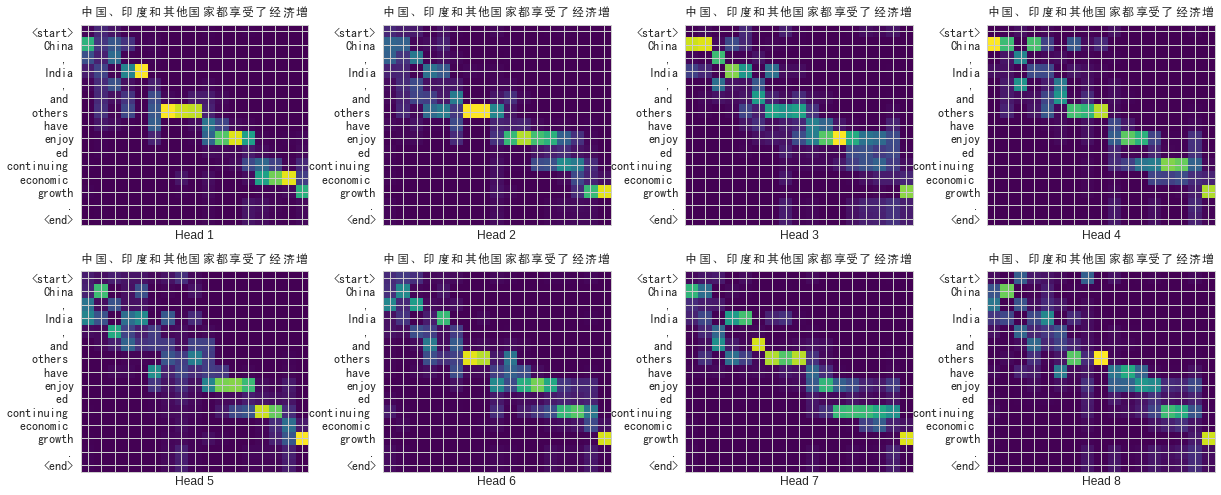

In [105]:
plot_attention_weights(attention_weights, sentence, 
                       predicted_seq, layer_name, max_len_tar=18)

<br/>
<br/>

很美，不是嗎？

如果你還記得，我在本文開頭就曾經秀過這張圖甚至開玩笑地跟你說：



!quote
- 好黑魔法，不學嗎？

我不知道你當初跟現在的感受，但我相信在你閱讀完本文，尤其是對自注意機制以及 Transformer 有了深刻理解之後，這之間的感受肯定是有不少差異的。

儘管其運算機制十分錯綜複雜，閱讀本文後 Transformer 對你來說不再是黑魔法，也不再是遙不可及的存在。如果你現在覺得「Transformer 也不過就這樣嘛！」那就達成我寫這篇文章的目的了。

自注意力機制以及 Transformer 在推出之後就被非常廣泛地使用並改進，但在我自己開始接觸相關知識以後一直沒有發現完整的繁中教學，因此寫了這篇當初的我殷殷期盼的文章，也希望能幫助到更多人學習。

在進入結語之前，讓我們看看文中的 Transformer 是怎麼逐漸學會做好翻譯的：




<video loop autoplay muted playsinline>
  <source src="{static}images/transformer/attention_weights_change_by_time.mp4" type="video/mp4">
    您的瀏覽器不支援影片標籤，請留言通知我：S
</video>
<center>
    Transformer 在訓練過程中逐漸學會關注在對的位置
    <br/>
    <br/>
</center>

## 在你離開之前




!quote
- 這篇是當初在學習 Transformer 的我希望有人分享給自己的文章。


我相信人類之所以強大是因為集體知識：我們能透過書籍、影片以及語言將一個人腦中的知識與思想共享給其他人，讓寶貴的知識能夠「scale」，在更多人的腦袋中發光發熱，創造更多價值。

我希望你有從本文中學到一點東西，並幫助我將本文的這些知識「scale」，把文章分享給更多有興趣的人，並利用所學應用在一些你一直想要完成的任務上面。

!image
- bert/bert-intro.jpg
- 以 Transformer 為基礎的語言代表模型 BERT
- https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html

如果你想要了解更多 Transformer 的相關應用，我推薦接著閱讀[進擊的 BERT：NLP 界的巨人之力與遷移學習](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)，了解現在 NLP 領域裡頭知名的語言代表模型 BERT。

最後一點提醒，就算 Transformer 比古早時代的方法好再多終究也只是個工具，其最大價值不會超過於被你拿來應用的問題之上。就好像現在已有不少超越基本 Transformer 的翻譯方法，但我們仍然持續在追尋更好的機器翻譯系統。

!quote
- 工具會被淘汰，需求一直都在。